# Random noise attenuation using local signal-and-noise orthogonalization<sup>a</sup>

<sup>a</sup>Published in Geophysics, 80, no. 6, WD1-WD9, (2015)

## Yangkang Chen<sup>1</sup> and Sergey Fomel<sup>1</sup>

<sup>1</sup>The University of Texas at Austin, Bureau of Economic Geology, John A. and Katherine G. Jackson School of Geosciences, Austin, Texas, USA

## ABSTRACT

Attenuation of random noise plays an important role in seismic data processing. Many of the conventional random noise attenuation techniques suffer from a problem of compromising between removing noise and preserving useful signal. 
We propose a novel approach to attenuate random noise based on local signal-and-noise orthogonalization. In this approach, we first  %preserve the useful signal 
remove noise using one of the conventional denoising operators, and then apply a weighting operator to the initially denoised section in order to predict the signal-leakage energy and retrieve it from the initial noise section. The weighting operator is obtained by solving a least-squares minimization problem via shaping regularization with a smoothness constraint. Next, the initially denoised section and the retrieved signal are combined to form the final denoised section. The proposed denoising approach corresponds to orthogonalizing the initially denoised signal and noise in a local manner. %The local orthogonalization can orthogonalize signal and noise in the neighborhood of each point instead of across the whole data window. 
We evaluate denoising performance by using local similarity. In order to test the orthogonalization property of the estimated signal and noise, we calculate the local similarity map between the denoised signal section and removed noise section. Low values of local similarity indicate a good orthogonalization and thus a good denoising performance. Synthetic and field data examples demonstrate the effectiveness of the proposed approach in applications to noise attenuation for both conventional and simultaneous-source seismic data.

## INTRODUCTION

Most random noise attenuation techniques necessitate a control of the trade-off between preservation of useful signal and removal of random noise. The *f-x* deconvolution and projection ([Canales, 1984][canales]; [Soubaras, 1995][soubaras1995]), also known as *f-x* predictive filtering ([Bekara and van der Baan, 2009][bekara]; [Chen and Ma, 2014][yangkang2014]), is a common technique for random noise attenuation thanks to its convenient implementation and high efficiency. Commonly a prediction filter length is modified in order to increase or decrease the ability of *f-x* deconvolution to remove random noise, at the expense of decreasing or increasing the preservation of useful signal. When the data character is complex, the filter length should be long enough to capture certain amounts of useful signal, but at the same time to attenuate a limited amount of noise. Otherwise, a portion of useful signal can be lost because of a large number of dip components in the data ([Chen and Ma, 2014][yangkang2014]). For certain specific types of random noise, such as blending noise in simultaneous-source seismic data ([Beasley et al., 1998][beasleycj1998]; [Berkhout, 2008][berkhout2008]; [Abma et al., 2010][abma2010]; [Chen et al., 2014a][yangkang20142]), median filtering (MF) can be particularly effective ([Huo et al., 2012][mediandeblend]; [Chen, 2014][yangkang2014svmf]; [Chen et al., 2014b][yangkang2014nmo]). However, the ability of MF to remove spike-like blending noise strongly depends on the length of the filtering window. A longer filter leads to a more powerful attenuation for blending noise, but at the same time causes a possible loss of useful energy. In contrast, when the length of the filtering window is small, MF may eliminate less useful energy but also will be less able to remove spiky noise. Removing spiky noise without losing too much useful signal becomes a difficult trade-off. 

Suppose that the seismic data $\mathbf{d}$ is composed of signal $\mathbf{s}_{true}$ and noise $\mathbf{n}_{true}$. A successful random noise attenuation will give accurate signal and noise estimation: $\mathbf{s}_0 \approx \mathbf{s}_{true}$ and $\mathbf{n}_0 \approx \mathbf{n}_{true}$, where $\mathbf{s}_0$ and $\mathbf{n}_0$ are the estimated signal and noise. However, the ideal situation may not occur in practice for two main possible reasons: incorrect parameter selection or inadequacy of denoising assumptions. When those assumptions are not met, the conventional denoising approaches may not achieve the optimal performance. For most noise attenuation approaches, the noise section will contain a certain amount of useful signal, which can be called *signal-leakage energy*. Sometimes, the leakage energy is negligible, whereas in other cases, this loss of energy may result in a decrease in resolution.

Local seismic attributes measure seismic signal characteristics neither instantaneously, at each signal point, nor globally, across a data window, but locally in the neighborhood of each point ([Fomel, 2007a][fomel2007localattr]). One of the most useful local attributes is *local similarity*, which has found numerous successful applications in different areas of seismic data processing: multicomponent image registration ([Fomel et al., 2005][fomel20052]; [Fomel, 2007a][fomel2007localattr]), time-lapse registration ([Fomel and Jin, 2009][fomel20094]; [Zhang et al., 2013][zhangrui2013]), time-frequency analysis ([Liu et al., 2011b][guochang20113]), structure-enhancing filtering ([Liu et al., 2010][liuyang2010]), phase estimation ([Fomel and van der Baan, 2014][fomel20142]), etc. Using a weighted stacking of seismic data according to local similarity to the reference trace, a seismic image with an increased signal-to-noise ratio (S/N) can be obtained (Liu et al., [2009][guochang2009], [2011a][guochang20111]). In this paper, we introduce a new local seismic attribute: *local orthogonalization weight* (LOW) in order to perform local orthogonalization. LOW appeared previously in the definition of local similarity and can be obtained by solving a minimization problem using shaping regularization with a smoothness constraint.

To compensate for the loss of useful signal in traditional noise attenuation approaches, because of incorrect parameter selection or inadequacy of denoising assumptions, we employ a weighting operator on the initially denoised section for the retrieval of useful signal from the initial noise section. The new denoising process corresponds to local orthogonalization of signal and noise based on the assumption that final estimated signal and noise should be orthogonal to each other in the time-space domain. The orthogonality assumption is similar as assuming that the signal and noise do not correlate with each other. Thus, the orthogonality assumption is assumed to be valid for all kinds of noise that do not correlate with the useful signal, e.g., random noise. The proposed local-orthogonalization approach can be considered as a specific case of previously proposed nonstationary matching filtering ([Fomel, 2009][fomel20095]) for one-point filter length. The proposed approach is not very sensitive to the parameter selection, and thus is robust in practice. We use two synthetic examples and three field data examples to demonstrate successful performance of the proposed approach in applications to both conventional and simultaneous-source seismic data.

[canales]:https://doi.org/10.1190/1.1894168
[fomel20142]:https://doi.org/10.1190/INT-2013-0080.1
[mediandeblend]:https://doi.org/10.1190/geo2011-0254.1
[yangkang20142]:https://doi.org/10.1190/geo2013-0449.1
[gram]:https://cds.cern.ch/record/1319974
[abma2010]:https://doi.org/10.3997/2214-4609.201400611
[beasleycj1998]:https://doi.org/10.1190/1.1820149
[mada2013]:https://doi.org/10.5334/jors.ag
[berkhout2008]:https://doi.org/10.1190/1.2954035
[yangkang2014svmf]:https://doi.org/10.1071/EG14051
[liuyang2012]:https://doi.org/10.1111/j.1365-2478.2012.01062.x
[liuyang2010]:https://doi.org/10.1111/j.1365-2478.2009.00840.x
[fomel20095]:https://doi.org/10.1190/1.3043447
[zhangrui2013]:https://doi.org/10.1190/geo2012-0386.1
[yangkang20131]:https://doi.org/10.1190/geo2013-0449.1
[yangkang2014nmo]:https://doi.org/10.1088/1742-2132/11/4/045012
[soubaras1995]:https://doi.org/10.1190/1.1887383
[fomel20052]:https://doi.org/10.1190/1.2147852
[fomel2007localattr]:https://doi.org/10.1190/1.2437573
[fomel2007shape]:https://doi.org/10.1190/1.2433716
[fomel20094]:https://doi.org/10.1190/1.3054136
[guochang2009]:https://doi.org/10.1190/1.3085643
[guochang20111]:https://doi.org/10.1111/j.1365-2478.2010.00916.x
[guochang20113]:https://doi.org/10.1190/geo2010-0185.1
[bekara]:https://doi.org/10.1190/1.3157244
[guochang]:https://doi.org/10.1190/1.3085643
[yangkang2014]:https://doi.org/10.1190/geo2013-0080.1
[fomel20132]:https://doi.org/10.1190/geo2013-0221.1
[guochang2012]:https://doi.org/10.1190/geo2011-0117.1
[Fomel07a]:https://doi.org/10.1190/1.2433716
[Fomel07b]:https://doi.org/10.1190/1.2437573
[Fomel05]:https://doi.org/10.1190/1.2147852

## METHOD

### Compensating for the signal-leakage energy by weighting

For many random noise attenuation approaches, the leakage energy is not negligible. We can attempt to retrieve the leaking signal from the noise section by applying a simple nonstationary weighting operator to the initially denoised signal assuming that the leakage energy can be predicted by weighting the useful signal:
<p id="eq:retr1" style="color:navy">(1)</p>
\begin{align}
\label{eq:retr1}
\mathbf{s}_1=\mathbf{w}\circ \mathbf{s}_0.
\end{align}
Here $\mathbf{s}_1$ is the retrieved signal, $\mathbf{w}\circ\mathbf{s}_0=diag(\mathbf{w})\mathbf{s}_0=diag(\mathbf{s}_0)\mathbf{w}$, which denotes Hadamard (or Schur) product, and $diag(\cdot)$ denotes the diagonal matrix composed of an input vector. The weighting vector $\mathbf{w}$ can be estimated by solving the following minimization problem:
<p id="eq:simple" style="color:navy">(2)</p>
\begin{equation}
\label{eq:simple}
\min_{\mathbf{w}} \parallel \overbrace{\mathbf{d} - \mathbf{P}[\mathbf{d}]}^{\mathbf{n}_0} - \mathbf{w}\circ \overbrace{\mathbf{P}[\mathbf{d}]}^{\mathbf{s}_0} \parallel_2^2,
\end{equation}
where $\mathbf{d}$ denotes the observed noisy data, and $\mathbf{P}$ denotes the initial random noise attenuation operator. Equation <a href="#eq:simple" data-reference-type="ref" data-reference="eq:simple">2</a> uses a weighted (scaled) signal $\mathbf{s}_0$ to match the leakage energy in the initial noise section ($\mathbf{n}_0$) in a least-squares sense. In the next section, we will introduce an approach to calculate the weighting vector $\mathbf{w}$ using local orthogonalization.

### Local orthogonalization

Based on the assumption that final estimated signal $\mathbf{s}$ and noise $\mathbf{n}$ should be orthogonal to each other, we can orthogonalize the estimated signal and estimated noise by
<p id="eq:ortho1" style="color:navy">(3)</p>
\begin{align}
\label{eq:ortho1}
\hat{\mathbf{n}} &= \mathbf{n}_0 - w\mathbf{s}_0, \\
\label{eq:ortho2}
\hat{\mathbf{s}} &= \mathbf{s}_0 + w\mathbf{s}_0,
\end{align}
<p id="eq:ortho2" style="color:navy">(4)</p>
where $w$ is the global orthogonalization weight (GOW) defined by
<p id="eq:weight" style="color:navy">(5)</p>
\begin{equation}
\label{eq:weight}
w=\frac{\mathbf{n}_0^T\mathbf{s}_0}{\mathbf{s}_0^T\mathbf{s}_0}.
\end{equation}
Here $[\cdot]^T$ denotes transpose. Appendix <a href="#eq:AppendixA" data-reference-type="ref" data-reference="eq:AppendixA">A</a> provides a demonstration and proof for the global orthogonalization process as denoted by equations <a href="#eq:ortho1" data-reference-type="ref" data-reference="eq:ortho1">3</a>, <a href="#eq:ortho2" data-reference-type="ref" data-reference="eq:ortho2">4</a> and <a href="#eq:weight" data-reference-type="ref" data-reference="eq:weight">5</a>. The orthogonality assumption is similar to assuming that the signal and noise do not correlate with each other, which implies the kinds of noise that do not correlate with the useful signal, e.g., random noise. The orthogonality assumption is assumed to be valid in the original time-space domain but also has the possibility of being applied in other transformed domains.

Instead of using GOW, we propose to use nonstationary local orthogonalization weight (LOW). One possible definition of LOW is:
<p id="eq:eq2" style="color:navy">(6)</p>
\begin{equation}
w_m(t) = \frac{\displaystyle\sum_{i=t-m/2}^{t+m/2} s_0(i) n_0(i)}{\displaystyle\sum_{i=t-m/2}^{t+m/2} s_0^2(i)},
\label{eq:eq2}
\end{equation}
where $w_m(t)$ denotes the LOW for each temporal point $t$ with a local window length $m$. $s_0(t)$ and $n_0(t)$ here denote the initially estimated signal and noise for each point $t$.

### Solving local orthogonalization weight by shaping regularization

In order to better control the locality and smoothness of LOW, we follow the local-attribute scheme introduced by [Fomel (2007a)][fomel2007localattr]. Simplifying equation <a href="#eq:simple" data-reference-type="ref" data-reference="eq:simple">2</a>, and adding a local-smooth constraint to the optimization problem, we obtain:
<p id="eq:localortho" style="color:navy">(7)</p>
\begin{equation}
\label{eq:localortho}
\mathbf{w} = \arg\min_{\mathbf{w}} \parallel \mathbf{n}_0 - \mathbf{S}_0\mathbf{w}\parallel_2^2 + \mathbf{R}(\mathbf{w}).
\end{equation}

where $\mathbf{w}$ is the LOW, $\mathbf{S}_0$ is a diagonal matrix composed of the initial estimated signal $\mathbf{s}_0$, and $\mathbf{S}_0=diag(\mathbf{s}_0)$. $\mathbf{R}$ denotes a smoothing regularization operator. Then, we solve the least-squares problem (equation <a href="#eq:localortho" data-reference-type="ref" data-reference="eq:localortho">7</a>) with the help of shaping regularization ([Fomel, 2007b][fomel2007shape]) using a local-smoothness constraint:
<p id="eq:shape" style="color:navy">(8)</p>
\begin{equation}
\label{eq:shape}
\mathbf{w} = [\lambda^2\mathbf{I} + \mathcal{T}(\mathbf{S}_0^T\mathbf{S}_0-\lambda^2\mathbf{I})]^{-1}\mathcal{T}\mathbf{S}_0^T\mathbf{n}_0,
\end{equation}

where $\mathcal{T}$ is a triangle smoothing operator and $\lambda$ is a scaling parameter set as $\lambda  = \Arrowvert\mathbf{S}_0^T\mathbf{S}_0\Arrowvert_2$. Inserting $\mathbf{w}$ into equation <a href="#eq:retr1" data-reference-type="ref" data-reference="eq:retr1">1</a>, we can obtain a new denoising approach:
<p id="eq:news" style="color:navy">(9)</p>
\begin{align}
\label{eq:news}
\mathbf{s} &= \mathbf{s}_0+\mathbf{s}_1=\mathbf{P}[\mathbf{d}]+\mathbf{w}\circ\mathbf{P}[\mathbf{d}]=(\mathbf{I}+diag(\mathbf{w}))\mathbf{P}[\mathbf{d}],\\
\label{eq:newn}
\mathbf{n} &= \mathbf{n}_0-\mathbf{s}_1=\mathbf{d}-\mathbf{P}[\mathbf{d}]-\mathbf{w}\circ\mathbf{P}[\mathbf{d}]=\mathbf{d}-(\mathbf{I}+diag(\mathbf{w}))\mathbf{P}[\mathbf{d}].
\end{align}
<p id="eq:newn" style="color:navy">(10)</p>

Here, $\mathbf{s}$ and $\mathbf{n}$ are the final estimated signal and noise.The controlling parameter for calculating LOW is the width of the triangle smoother, or the smoothing radius (SR). Figure <a href="#fig:low1,low2,low3,low4" data-reference-type="ref" data-reference="fig:low1,low2,low3,low4">1</a> shows the calculated LOWs that correspond to the second synthetic example with different smoothing radii. The LOW are calculated by solving equation <a href="#eq:localortho" data-reference-type="ref" data-reference="eq:localortho">7</a> with the initial denoised signal and initial removed noise set using the approach shown in equation <a href="#eq:shape" data-reference-type="ref" data-reference="eq:shape">8</a>. As we can see from the comparison, LOW is robust with respect to the choice of the smoothing radius (e.g., from 25 samples to 20 samples, or from 10 samples to 5 samples), but may differ a lot for significantly different smoothing radii (e.g., from 25 samples to 5 samples). We can also conclude from the comparison that as the smoothing radius increases, the temporal and spatial resolutions decrease, but the anti-noise ability increases.
Note that the orthogonalization equations <a href="#eq:simple" data-reference-type="ref" data-reference="eq:simple">2</a> and <a href="#eq:localortho" data-reference-type="ref" data-reference="eq:localortho">7</a> can also be understood as one-point nonstationary matching filtering ([Fomel, 2009][fomel20095]).

[fomel2007localattr]:https://doi.org/10.1190/1.2437573
[fomel20095]:https://doi.org/10.1190/1.3043447
[fomel2007shape]:https://doi.org/10.1190/1.2433716

In [1]:
from m8r import view

In [2]:
%%file 1_comp1.scons 

from rsf.proj import*
from rsf.recipes.beg import server as private

def Grey(data,other): 
	Result(data,'grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wheretitle=t color=b %s scalebar=y labelsz=10'%other)

def Wiggle(data,other): 
	Result(data,'''
				window j2=8 | wiggle transp=y yreverse=y 
				label2=Trace unit2="" label1=Time unit1="s" 
				title="" wherexlabel=b wheretitle=t poly=y 
				wheretitle=t wherexlabel=b clip=0.15 labelsz=10 %s '''%other)


###########################################################################
## complex event 
###########################################################################
Flow('c',None,
     '''
     spike n1=512 n2=256 d2=1 o2=0 label2=Trace unit2=
     nsp=4 k1=64,100,160,200 p2=1.5,-0.3,0,0.5 mag=1,1,1,1 |
     ricker1 frequency=20 |
     noise seed=2008 var=0
     ''')

Flow('cn','c',
     '''
     noise seed=2008 var=0.00125
     ''')

Flow('n','cn c','add scale=1,-1 ${SOURCES[1]}')
Flow('cn-zero','n','math output=0')
## fx decon
Flow('cfx','cn','fxdecon lenf=10 verb=1 n2w=256 fmin=5 fmax=125')

## Difference section
Flow('cdifffx','cn cfx','add scale=1,-1 ${SOURCES[1]}')

## fxdecon + simi
Flow('csimi-fx','cn cfx','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')
#Flow('csim-fx','cfx csimi-fx','simidenoise similarity=${SOURCES[1]} thr=0.15')
Flow('csim-fx','cfx csimi-fx','sfsimidenoise1 similarity=${SOURCES[1]} s1=0.25 s2=0.5')

# Orthogonolize
Flow('cdifffx2 cfx2','cdifffx cfx','ortho rect1=25 rect2=25 sig=${SOURCES[1]} sig2=${TARGETS[1]}')

Flow('low1','cdifffx cfx','low rect1=25 rect2=25 sig=${SOURCES[1]} sig2=${TARGETS[1]}')
Flow('low2','cdifffx cfx','low rect1=20 rect2=20 sig=${SOURCES[1]} sig2=${TARGETS[1]}')
Flow('low3','cdifffx cfx','low rect1=10 rect2=10 sig=${SOURCES[1]} sig2=${TARGETS[1]}')
Flow('low4','cdifffx cfx','low rect1=5 rect2=5 sig=${SOURCES[1]} sig2=${TARGETS[1]}')
Grey('low1','scalebar=y color=j clip=0.4 maxval=0.4 minval=-0.4 title="SR=25"')
Grey('low2','scalebar=y color=j clip=0.4 maxval=0.4 minval=-0.4 title="SR=20"')
Grey('low3','scalebar=y color=j clip=0.4 maxval=0.4 minval=-0.4 title="SR=10"')
Grey('low4','scalebar=y color=j clip=0.4 maxval=0.4 minval=-0.4 title="SR=5"')

Writing 1_comp1.scons


<p id="fig:low1" style="color:navy">(a)</p>

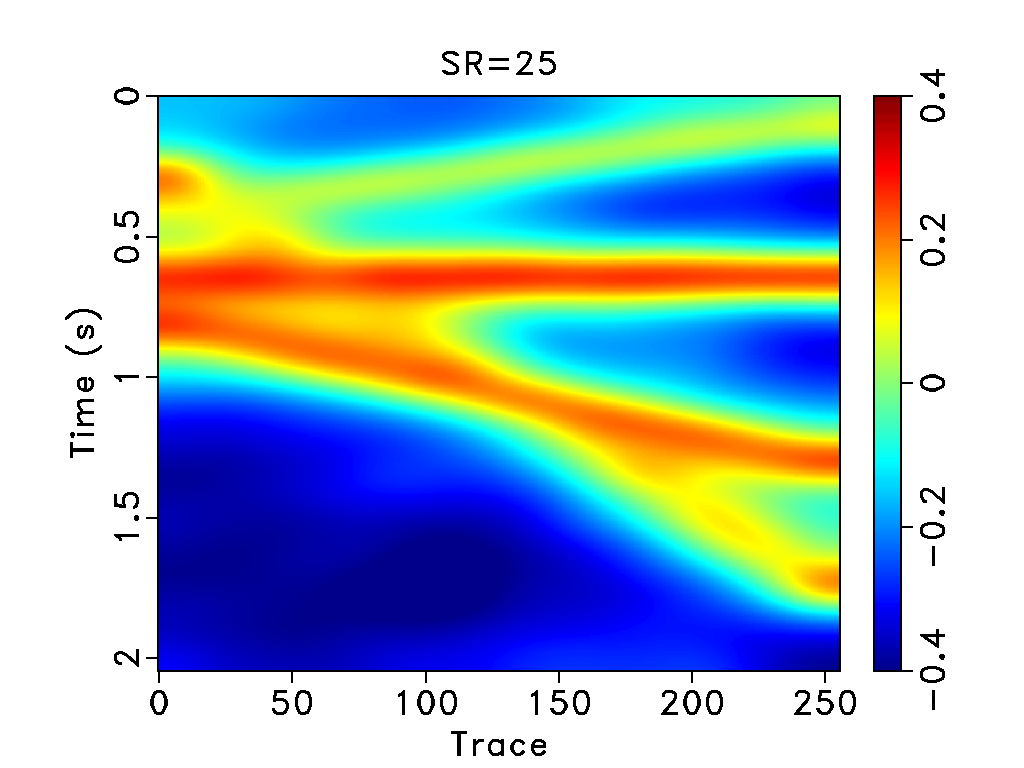

In [3]:
view("low1")

<p id="fig:low2" style="color:navy">(b)</p>

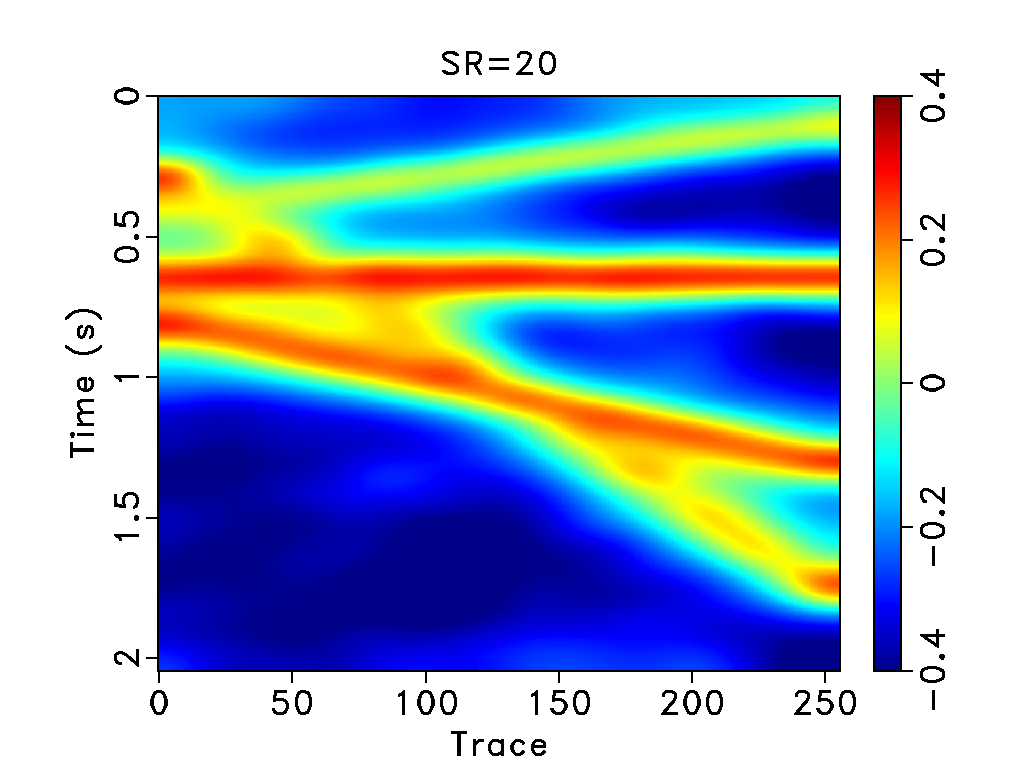

In [4]:
view("low2")

<p id="fig:low3" style="color:navy">(c)</p>

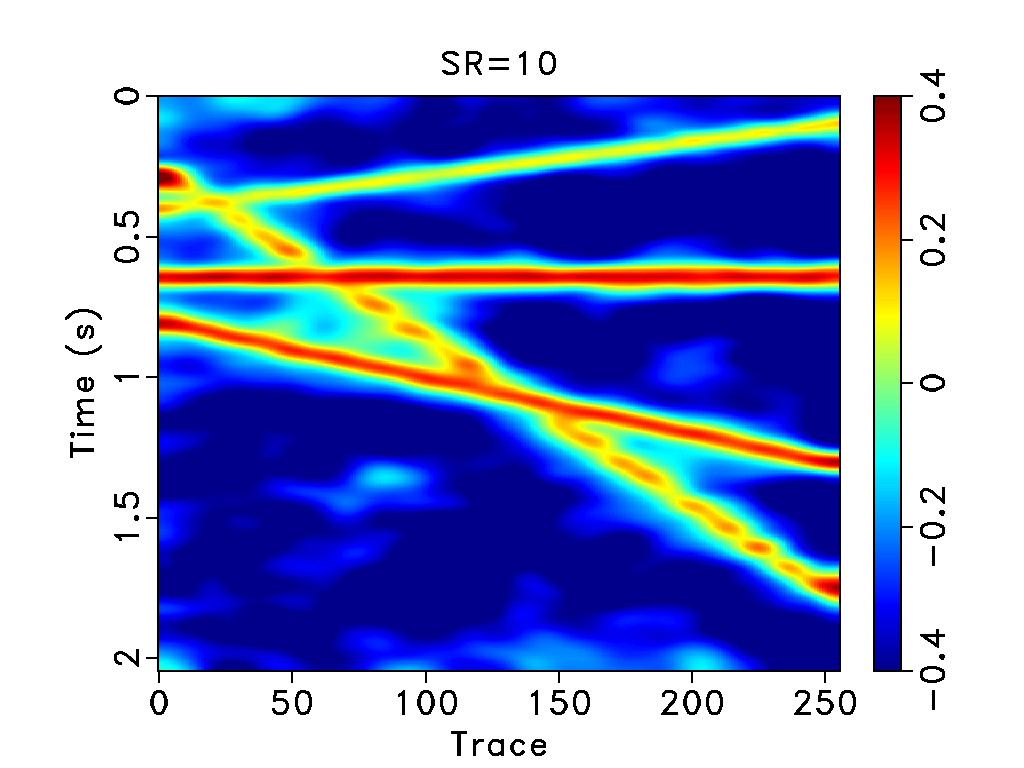

In [5]:
view("low3")

<p id="fig:low4" style="color:navy">(d)</p>

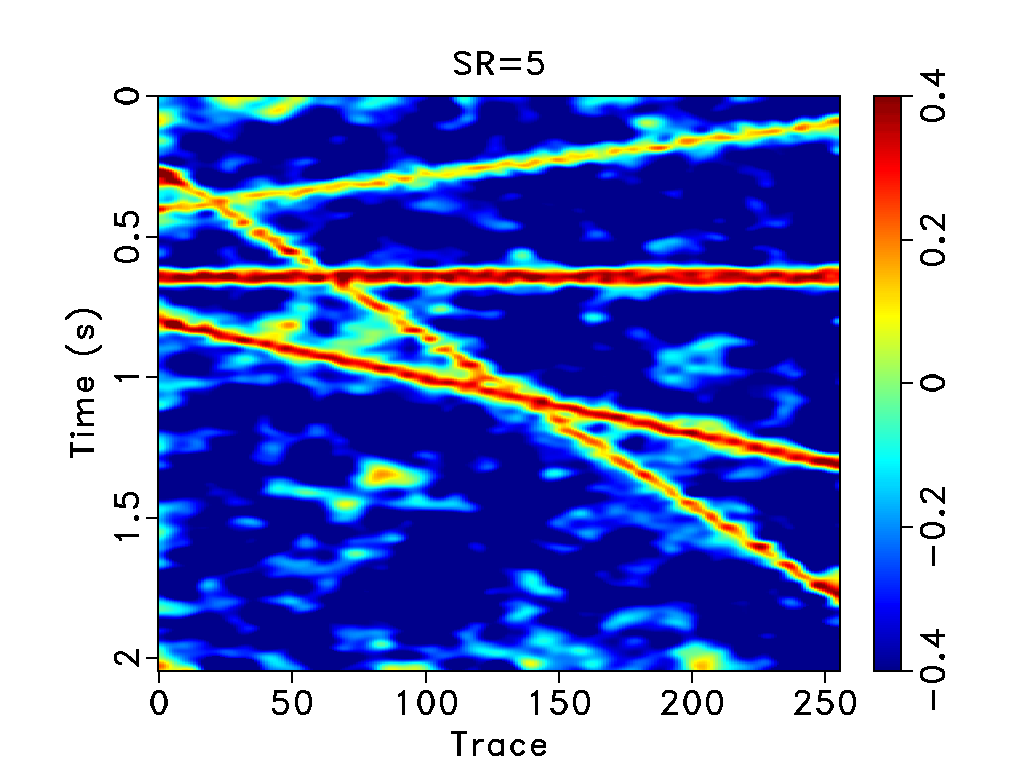

In [6]:
view("low4")

<p id="fig:low1,low2,low3,low4" style="color:navy">Figure 1. The LOWs using different smoothing radii for the example as shown in Figure <a href="#fig:c,n,cn,cfx,cdifffx,csimi-difffx,cfx2,cdifffx2,csimi-difffx2" data-reference-type="ref" data-reference="fig:c,n,cn,cfx,cdifffx,csimi-difffx,cfx2,cdifffx2,csimi-difffx2">3</a>: (a) vertical and lateral smoothing radii are 25 samples, (b) vertical and lateral
smoothing radii are 20 samples, (c) vertical and lateral smoothing radii are 10 samples,
and (d) vertical and lateral smoothing radii are 5 samples.</p>

## SYNTHETIC EXAMPLES

We use two synthetic examples to test the performance of the proposed denoising algorithm. For consistency, we use *denoising* to denote random noise attenuation for regular seismic data, and *deblending* to denote blending noise attenuation for simultaneous-source seismic data. The first example is a deblending test, similar to the one used by [Huo et al. (2012)][mediandeblend]. The second example is a denoising test that contains four crossing linear events. In order to test the improvement in the S/N of these two synthetic examples, we utilize the following measurement:
<p id="eq:diff" style="color:navy">(11)</p>
\begin{equation}
\label{eq:diff}
S/N=10\log_{10}\frac{\Arrowvert \mathbf{s}_{true} \Arrowvert_2^2}{\Arrowvert \mathbf{s}_{true} -\mathbf{s}\Arrowvert_2^2}.
\end{equation}

In addition to SNR, we also propose to use local similarity ([Fomel, 2007a][fomel2007localattr]) as a convenient measure to evaluate denoising performance. Appendix <a href="#eq:AppendixB" data-reference-type="ref" data-reference="eq:AppendixB">B</a> gives a brief review of local similarity. After the local similarity map between the denoised data and removed noise is calculated, we can judge from the local similarity if there is leakage energy in the noise. When the clean data is unknown for field data denoising tests, the SNR-based evaluation becomes unavailable. Besides, the SNR is not always the best measurement for denoising performance because it does not measure the signal leakage. However, the local similarity map can always be used to evaluate the denoising performance.

Figure <a href="#fig:huo,huo-noise,huos,huos-mf,huosdiff-mf,huos-simi,huos-ortho,huosdiff-ortho,huos-simi-ortho" data-reference-type="ref" data-reference="fig:huo,huo-noise,huos,huos-mf,huosdiff-mf,huos-simi,huos-ortho,huosdiff-ortho,huos-simi-ortho">2</a> shows the deblending performance using a conventional MF and the proposed denoising approach. The original clean, unblended data are shown in Figure <a href="#fig:huo" data-reference-type="ref" data-reference="fig:huo">2a</a>. After blending using a simple random-dithering method ([Chen et al., 2014a][yangkang20142]), we obtained the noisy data containing spike-like blending noise (<a href="#fig:huos" data-reference-type="ref" data-reference="fig:huos">2c</a>). Figure <a href="#fig:huos-mf" data-reference-type="ref" data-reference="fig:huos-mf">2d</a> demonstrates a denoised section after using MF. The noise section corresponding to MF is shown in Figure <a href="#fig:huosdiff-mf" data-reference-type="ref" data-reference="fig:huosdiff-mf">2e</a> and contains a certain amount of signal leakage in the form of linear events. Using the proposed denoising approach, we obtained a denoised section with stronger-amplitude linear events. In the corresponding noise section, any coherent linear events are barely noticeable, suggesting a nearly perfect deblending. In this example, because the noise is spike-like blending noise, we did not smooth too much during shaping regularization. In this example, the vertical and lateral smoothing radii are both 2 samples. Figures <a href="#fig:huos-simi" data-reference-type="ref" data-reference="fig:huos-simi">2f</a> and <a href="#fig:huos-simi-ortho" data-reference-type="ref" data-reference="fig:huos-simi-ortho">2i</a> show local similarity of the noise section to the denoised section before and after using the proposed approach. After applying the proposed method, the noise section exhibits low similarity with the denoised section. Although structure-oriented median filtering can handle the dipping reflector, it can only work well for relatively simpler structures where the dip estimation can be precisely obtained, in which case there will be no need to use the proposed approach. However, when the dip estimation is not accurate, or there are conflicting dips in a processing window, the structure-oriented median filtering may not work well, in which case we can use the proposed approach for retrieving the leaked useful energy.

[mediandeblend]:https://doi.org/10.1190/geo2011-0254.1
[fomel2007localattr]:https://doi.org/10.1190/1.2437573
[yangkang20142]:https://doi.org/10.1190/geo2013-0449.1

In [7]:
from m8r import view

In [8]:
%%file 1_whatever.scons 

from rsf.proj import* 

pc=99 #display percentage
nfw=11

def Grey(data,other): 
	Result(data,'grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wheretitle=t color=b labelsz=10 %s scalebar=y'%other)

def Wig(data,other): 
	Result(data,'''
				window j2=8 | window f2=1| wiggle transp=y yreverse=y 
				label2=Trace unit2="" label1=Time unit1="s" 
				title="" wherexlabel=b wheretitle=t poly=y 
				wheretitle=t wherexlabel=b clip=0.1 labelsz=10 %s'''%other)

##########################################
#    Make synthetic data
##########################################
Flow('huo',None,
     '''
     spike n1=600 n2=256 d2=1 o2=0 label2=Trace unit2=
     nsp=4 k1=40,90,200,250 p2=0,0,0.9,0.9 mag=1,1,0.9,0.9 |
     ricker1 frequency=20 |
     noise seed=2008 var=0
     ''')

## Apply dithering
Flow('dither','huo',
     '''
     window n1=1 |
     noise rep=y seed=122011 var=0.5 | math output="1000*input"
     ''')
Flow('shottime1','huo','window n1=1 | math output=3*1000*x1')
Flow('shottime2','shottime1 dither','add scale=1,1 ${SOURCES[1]}')


## Blend 
Flow('huos','huo huo shottime1 shottime2','blend shot_time_in=${SOURCES[3]} shot_time_out=${SOURCES[2]} |add scale=1,1 ${SOURCES[1]}' )
Flow('huo-noise','huos huo','add scale=1,-1 ${SOURCES[1]}')
Flow('huos-zero','huos','math output=0')

Flow('huos-mf','huos','transp  | tsmf nfw=%d | transp'%nfw)
Flow('huosdiff-mf','huos huos-mf','add scale=1,-1 ${SOURCES[1]}')

# similarity
Flow('huos-simi','huosdiff-mf huos-mf','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')
Flow('huossim-mf','huosdiff-mf huos-simi huos-mf','simidenoise1 similarity=${SOURCES[1]} s1=0.2 s2=0.3 | add scale=1,1 ${SOURCES[2]}')
Flow('huosdiffsim-mf','huos huossim-mf','add scale=1,-1 ${SOURCES[1]}')
Flow('huos-simi2','huosdiffsim-mf huossim-mf','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')

# projection
Flow('huos-proj','huosdiff-mf huos-mf','divn den=${SOURCES[1]} niter=20 rect1=5 rect2=5')
Flow('huosproj-mf','huos-mf huos-proj huosdiff-mf','mul ${SOURCES[1]} | add scale=-1,1 ${SOURCES[2]}')

Wig('huosproj-mf','')

# Orthogonolize
Flow('huosdiff-ortho huos-ortho','huosdiff-mf huos-mf','ortho rect1=2 rect2=2 eps=0.1 sig=${SOURCES[1]} sig2=${TARGETS[1]}')
Flow('huos-simi-ortho','huosdiff-ortho huos-ortho','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')


Flow('huos-noise-simi','huo huo-noise','similarity other=${SOURCES[1]} niter=20 rect1=20 rect2=20')

Wig('huossim-mf','')
Flow('test','huos-proj huos-simi','cat ${SOURCES[1]}')
Grey('test','color=j')

Wig('huo','')
Wig('huos','')
Wig('huos-zero','')
Wig('huo-noise','')
Wig('huos-mf','')
Wig('huosdiff-mf','')
Wig('huosdiff-ortho','')
Wig('huos-ortho','')

Grey('huos-simi','scalebar=y color=j clip=0.7 minval=0 maxval=0.7' )
Grey('huos-simi-ortho','scalebar=y color=j clip=0.7 minval=0 maxval=0.7' )
Grey('huos-noise-simi','scalebar=y color=j clip=0.7 minval=0 maxval=0.7' )

#Wig('huossim-mf','')
Wig('huosdiffsim-mf','')
Grey('huos-simi2','scalebar=y color=j clip=0.7 minval=0 maxval=0.7' )

## compute SNR (may differ in different computers)
Flow('huo-diff1','huo huos','add scale=1,-1 ${SOURCES[1]} ')
Flow('huo-snr1','huo huo-diff1','snr2 noise=${SOURCES[1]}')

Flow('huo-diff2','huo huos-mf','add scale=1,-1 ${SOURCES[1]} ')
Flow('huo-snr2','huo huo-diff2','snr2 noise=${SOURCES[1]}')

Flow('huo-diff3','huo huossim-mf','add scale=1,-1 ${SOURCES[1]} ')
Flow('huo-snr3','huo huo-diff3','snr2 noise=${SOURCES[1]}')


Flow('huo-diff4','huo huos-ortho','add scale=1,-1 ${SOURCES[1]} ')
Flow('huo-snr4','huo huo-diff4','snr2 noise=${SOURCES[1]}')

Writing 1_whatever.scons


<p id="fig:huo" style="color:navy">(a)</p>

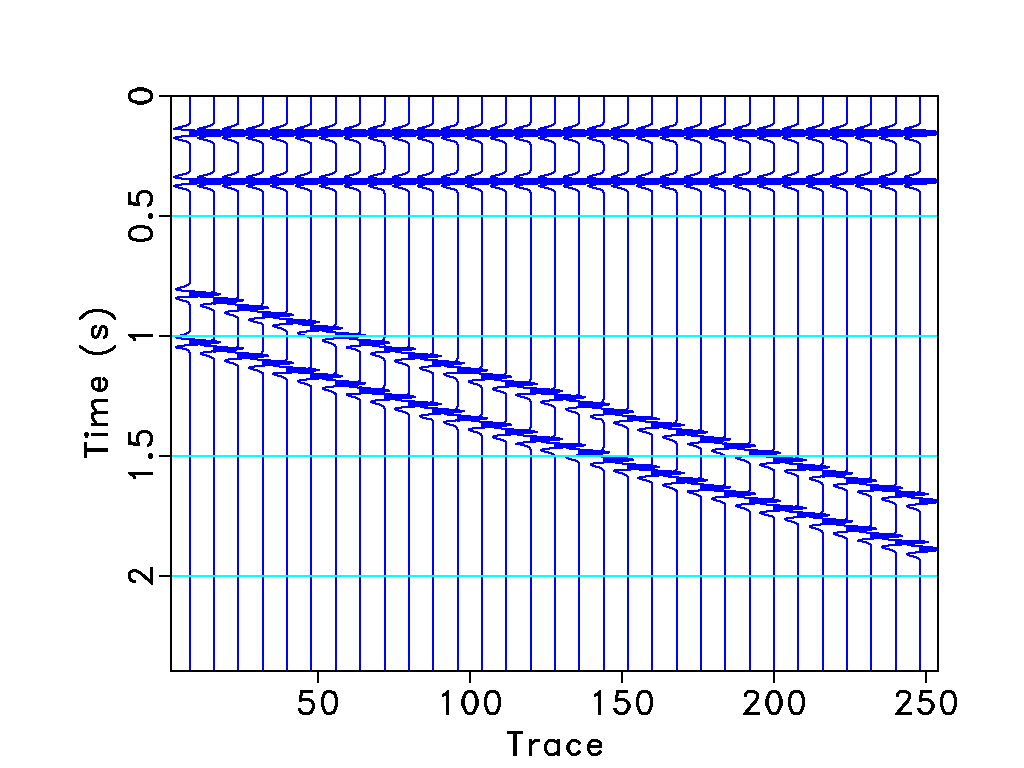

In [9]:
view("huo")

<p id="fig:huo-noise" style="color:navy">(b)</p>

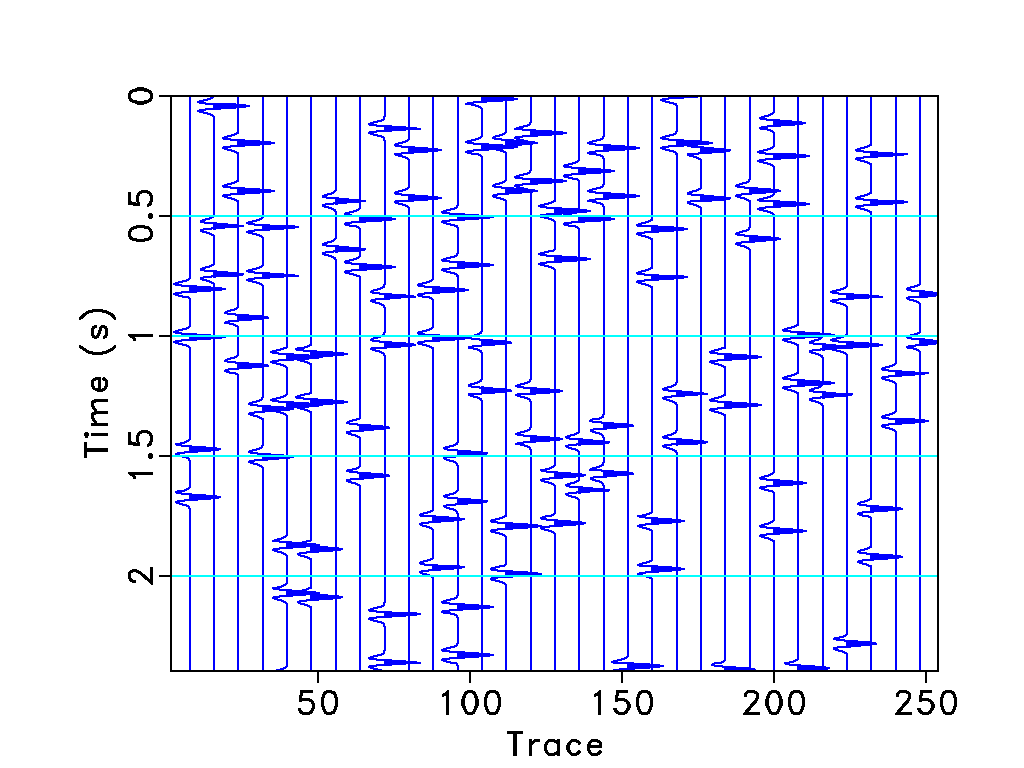

In [10]:
view("huo-noise")

<p id="fig:huos" style="color:navy">(c)</p>

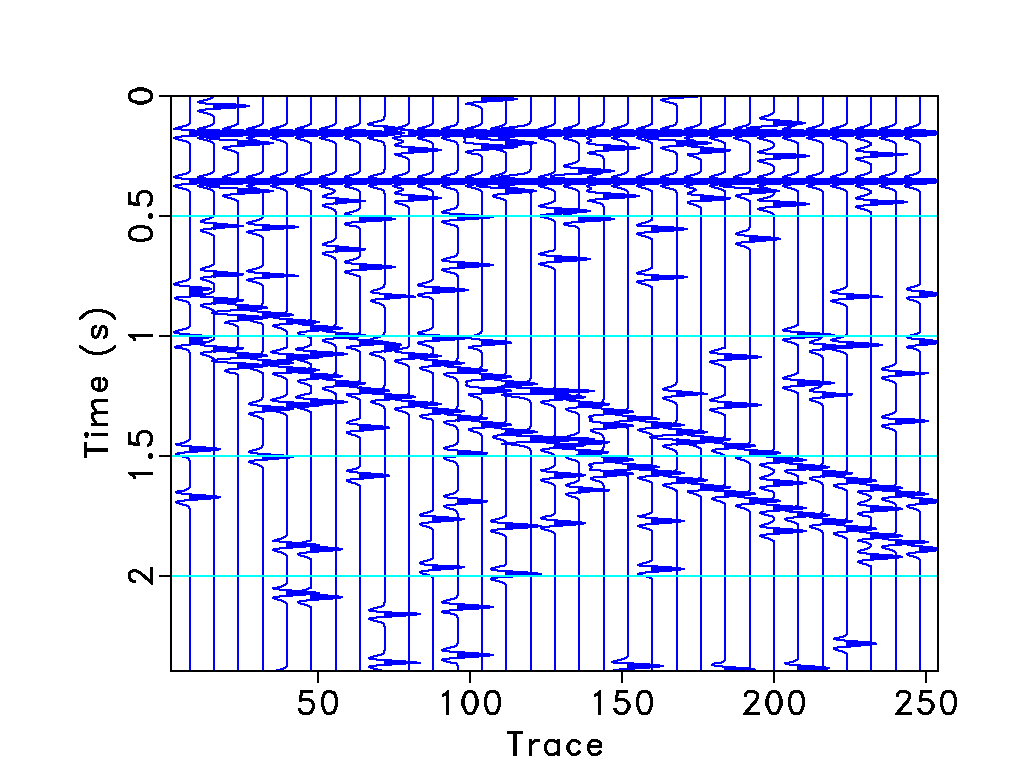

In [11]:
view("huos")

<p id="fig:huos-mf" style="color:navy">(d)</p>

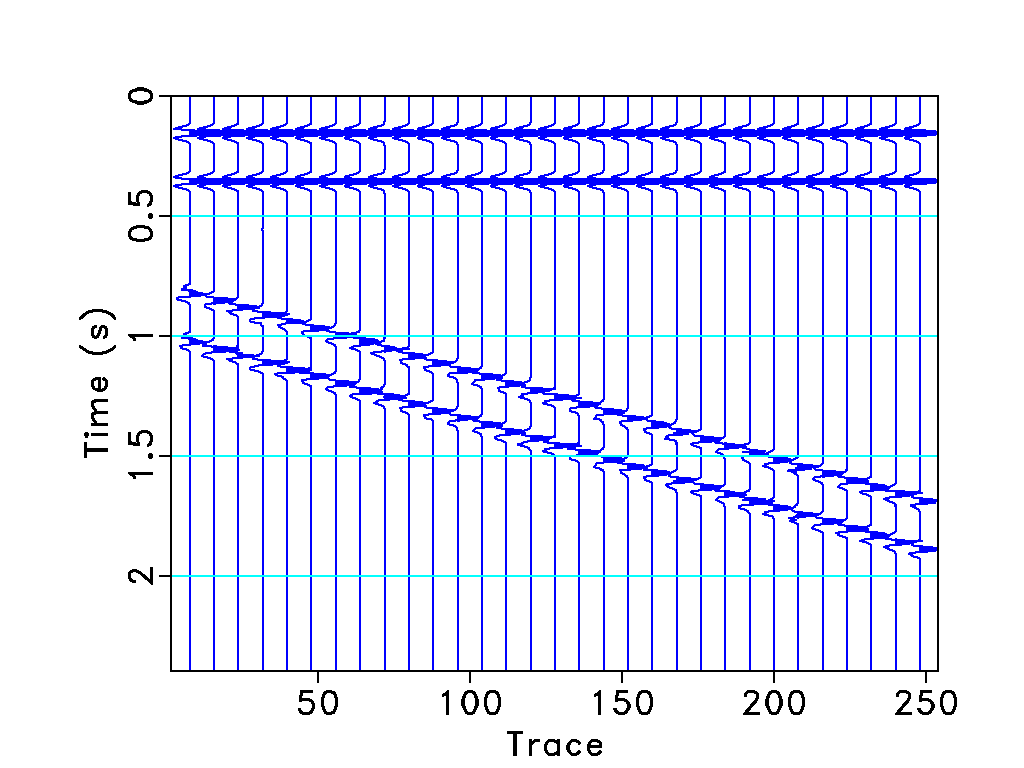

In [12]:
view("huos-mf")

<p id="fig:huosdiff-mf" style="color:navy">(e)</p>

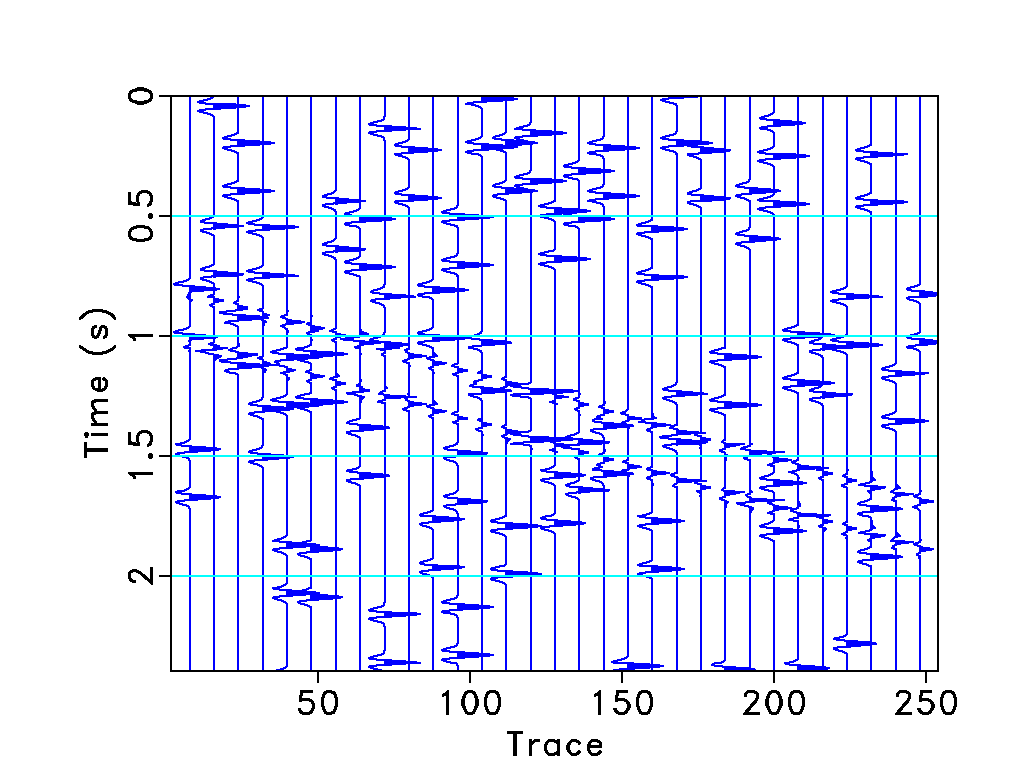

In [13]:
view("huosdiff-mf")

<p id="fig:huos-simi" style="color:navy">(f)</p>

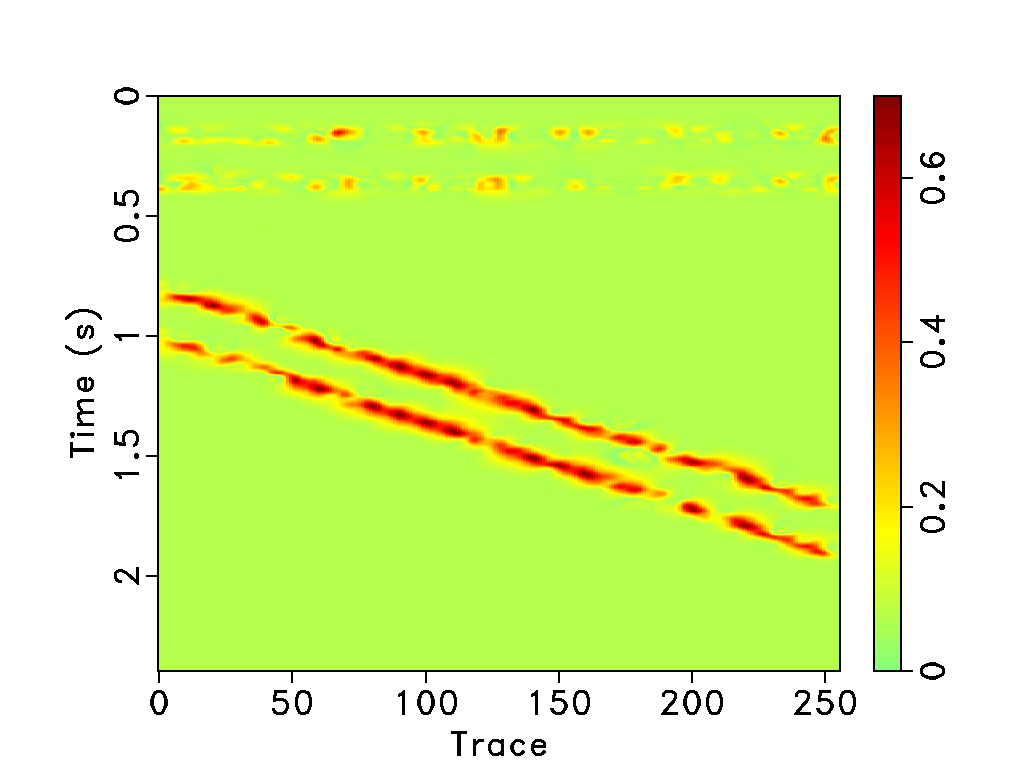

In [14]:
view("huos-simi")

<p id="fig:huos-ortho" style="color:navy">(g)</p>

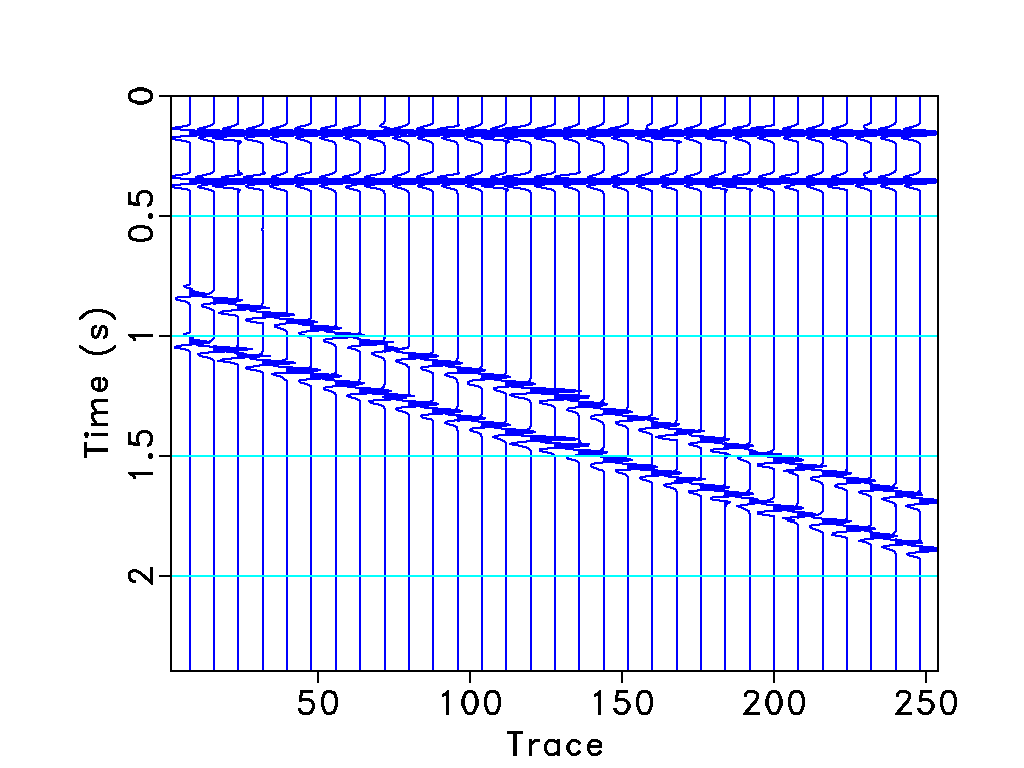

In [15]:
view("huos-ortho")

<p id="fig:huosdiff-ortho" style="color:navy">(h)</p>

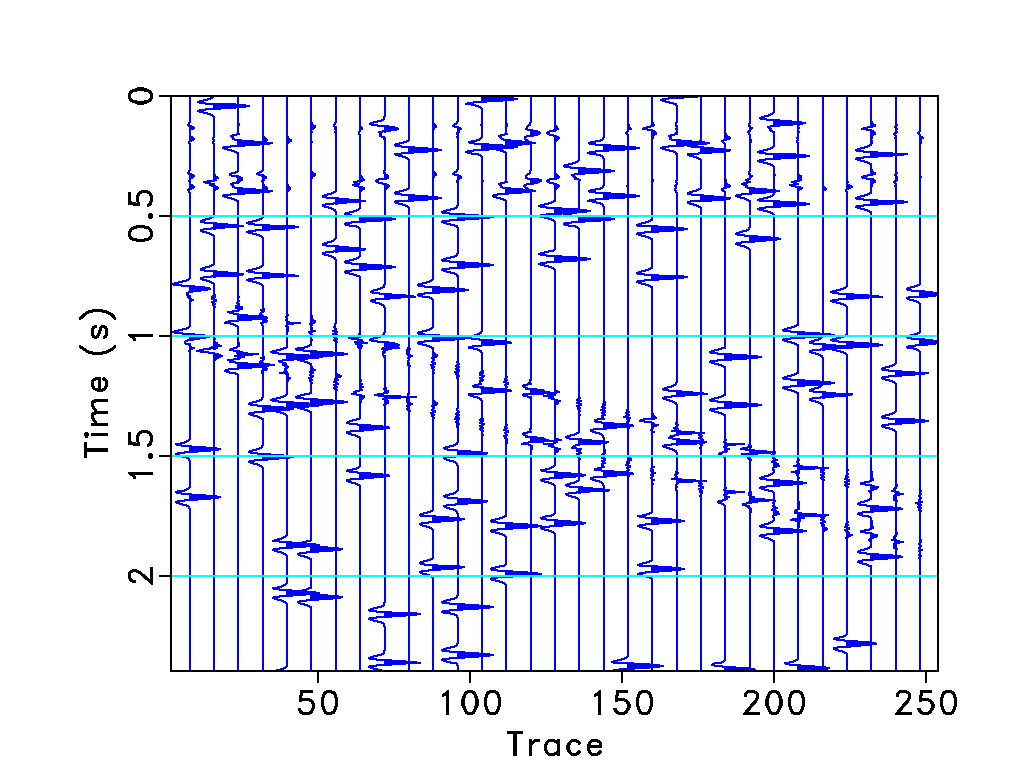

In [16]:
view("huosdiff-ortho")

<p id="fig:huos-simi-ortho" style="color:navy">(i)</p>

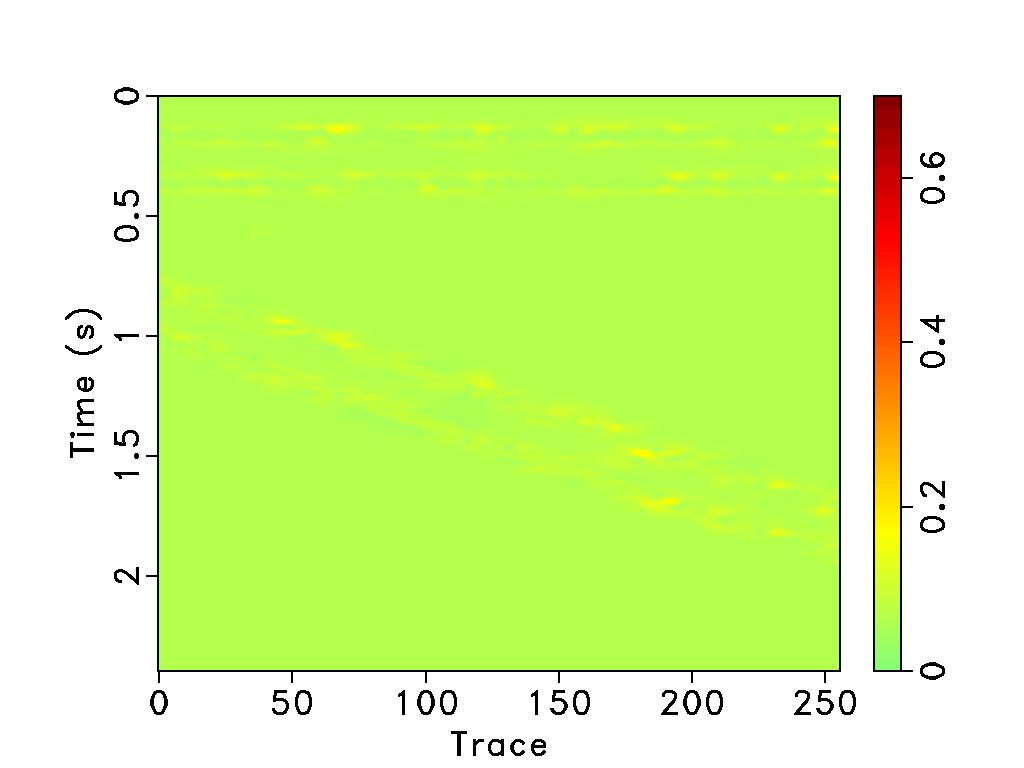

In [17]:
view("huos-simi-ortho")

<p id="fig:huo,huo-noise,huos,huos-mf,huosdiff-mf,huos-simi,huos-ortho,huosdiff-ortho,huos-simi-ortho" style="color:navy">Figure 2. Comparison of using the local-orthogonalization-based random noise attenuation approach for deblending test  before and after. (a) Unblended section. (b) Blending noise section. (c) Blended section. (d) Deblended result using MF. (e) Noise section using MF. (f) Local similarity map between (d) and (e). (g) Deblended result using the proposed method. (h) Noise section using the proposed method. (i) Local similarity map between (g) and (h).</p>

Figure <a href="#fig:c,n,cn,cfx,cdifffx,csimi-difffx,cfx2,cdifffx2,csimi-difffx2" data-reference-type="ref" data-reference="fig:c,n,cn,cfx,cdifffx,csimi-difffx,cfx2,cdifffx2,csimi-difffx2">3</a> shows the denoising performance based on the conventional $f$-$x$ deconvolution ([Canales, 1984][canales]). The clean data is shown in Figure <a href="#fig:c" data-reference-type="ref" data-reference="fig:c">3a</a> and the noise section, corresponding to $f$-$x$ deconvolution, is shown in Figure <a href="#fig:csimi-difffx" data-reference-type="ref" data-reference="fig:csimi-difffx">3f</a>; it contains some horizontal and low-dip-angle signals. The coherent leakage energy is also visible in the local similarity map (Figure <a href="#fig:csimi-difffx" data-reference-type="ref" data-reference="fig:csimi-difffx">3f</a>). Applying the proposed denoising approach, we obtained a denoised section with stronger-amplitude horizontal events. The corresponding noise section does not contain any coherent signal. In this example, the vertical and lateral smoothing radii are both 25 samples. Figures <a href="#fig:csimi-difffx" data-reference-type="ref" data-reference="fig:csimi-difffx">3f</a> and <a href="#fig:csimi-difffx2" data-reference-type="ref" data-reference="fig:csimi-difffx2">3i</a> denote local similarity of the noise section to the denoised section before and after using the proposed approach. The similarity decreases significantly after applying local orthogonalization.

[canales]:https://doi.org/10.1190/1.1894168

In [18]:
%%file 2_comp1.scons 

from rsf.proj import*
from rsf.recipes.beg import server as private

def Grey(data,other): 
	Result(data,'grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wheretitle=t color=b %s scalebar=y labelsz=10'%other)

def Wiggle(data,other): 
	Result(data,'''
				window j2=8 | wiggle transp=y yreverse=y 
				label2=Trace unit2="" label1=Time unit1="s" 
				title="" wherexlabel=b wheretitle=t poly=y 
				wheretitle=t wherexlabel=b clip=0.15 labelsz=10 %s '''%other)

## seislet thresholding
Flow('cdip','cn','bandpass fhi=60 | dip rect1=10 rect2=10')
Flow('cslet','cn cdip','seislet adj=y inv=y dip=${SOURCES[1]}')
Flow('csletthr','cslet','threshold1 thr=40')
Flow('cseis','csletthr cdip','seislet dip=${SOURCES[1]} adj=n inv=y |cut n1=25 |cut f1=475')

## seislet + simi
Flow('csimi-seis','cn cseis','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')
Flow('csim-seis','cseis csimi-seis','simidenoise similarity=${SOURCES[1]} thr=0.8')
#Flow('csim-seis','cfx csimi-seis','simidenoise1 similarity=${SOURCES[1]} s1=0.1 s2=0.15')

Flow('csimi-difffx','cdifffx cfx','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')
Flow('csim2-fx','cdifffx csimi-difffx cfx','simidenoise1 similarity=${SOURCES[1]} s1=0.1 s2=0.3 | add scale=1,1 ${SOURCES[2]}')

Flow('cdiffsim2-fx','cn csim2-fx','add scale=1,-1 ${SOURCES[1]}')
Flow('csimi-difffx2','cfx2 cdifffx2','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')

#Flow('cdiffseis','cn cseis','add scale=1,-1 ${SOURCES[1]}')
#Flow('cdiffsim-seis','cn csim-seis','add scale=1,-1 ${SOURCES[1]}')

Wiggle('c','')
Wiggle('cn','')
Wiggle('cn-zero','')
Wiggle('n','')
Wiggle('cfx','')
Wiggle('cfx2','')

Wiggle('csim-fx','')
Wiggle('csim2-fx','')


Wiggle('cdifffx','')
#Wiggle('cdiffsim-fx','')
Wiggle('cdiffsim2-fx','')
Wiggle('cdifffx2','')

Grey('csimi-difffx','color=j scalebar=y clip=0.7 minval=0 maxval=0.7')
Grey('csimi-difffx2','color=j scalebar=y clip=0.7 minval=0 maxval=0.7')

## The following aims to display together
#Wiggle('c','title="(a)"')
#Wiggle('cn','title="(b)"')

#Wiggle('cfx','title="(a)"')
#Wiggle('csim-fx','title="(b)"')
#Wiggle('cseis','title="(c)"')
#Wiggle('csim-seis','title="(d)"')

#Wiggle('cdifffx','title="(e)"')
#Wiggle('cdiffsim-fx','title="(f)"')
#Wiggle('cdiffseis','title="(g)"')
#Wiggle('cdiffsim-seis','title="(h)"')

#Grey('cdifffx','title="(e)"')
#Grey('cdiffsim-fx','title="(f)"')
#Grey('cdiffseis','title="(g)"')
#Grey('cdiffsim-seis','title="(h)"')

#Result('comp1','./Fig/cfx.vpl ./Fig/csim-fx.vpl ./Fig/cseis.vpl ./Fig/csim-seis.vpl','SideBySideAniso')

Writing 2_comp1.scons


In [19]:
%%file 5_whatever.scons 


# compute SNR (may differ in different computers)
Flow('c-diff1','c cn','add scale=1,-1 ${SOURCES[1]} ')
Flow('c-snr1','c c-diff1','snr2 noise=${SOURCES[1]}')

Flow('c-diff2','c cfx','add scale=1,-1 ${SOURCES[1]} ')
Flow('c-snr2','c c-diff2','snr2 noise=${SOURCES[1]}')

Flow('c-diff3','c csim-fx','add scale=1,-1 ${SOURCES[1]} ')
Flow('c-snr3','c c-diff3','snr2 noise=${SOURCES[1]}')

Flow('c-diff4','c cfx2','add scale=1,-1 ${SOURCES[1]} ')
Flow('c-snr4','c c-diff4','snr2 noise=${SOURCES[1]}')

Writing 5_whatever.scons


<p id="fig:c" style="color:navy">(a)</p>

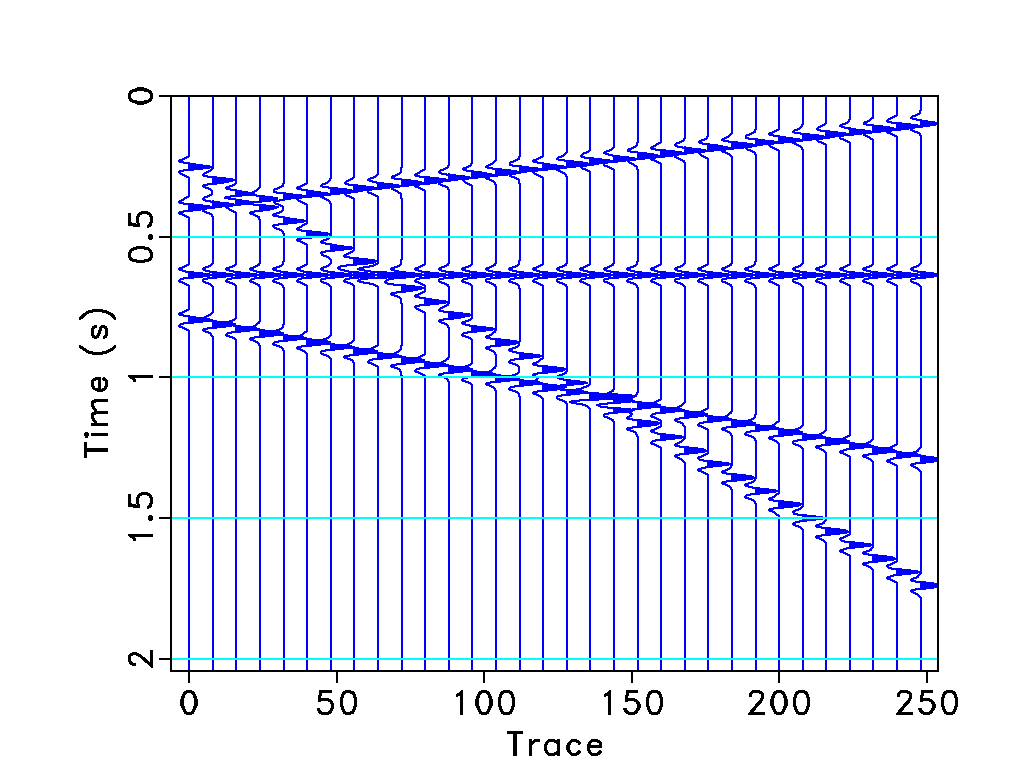

In [20]:
view("c")

<p id="fig:n" style="color:navy">(b)</p>

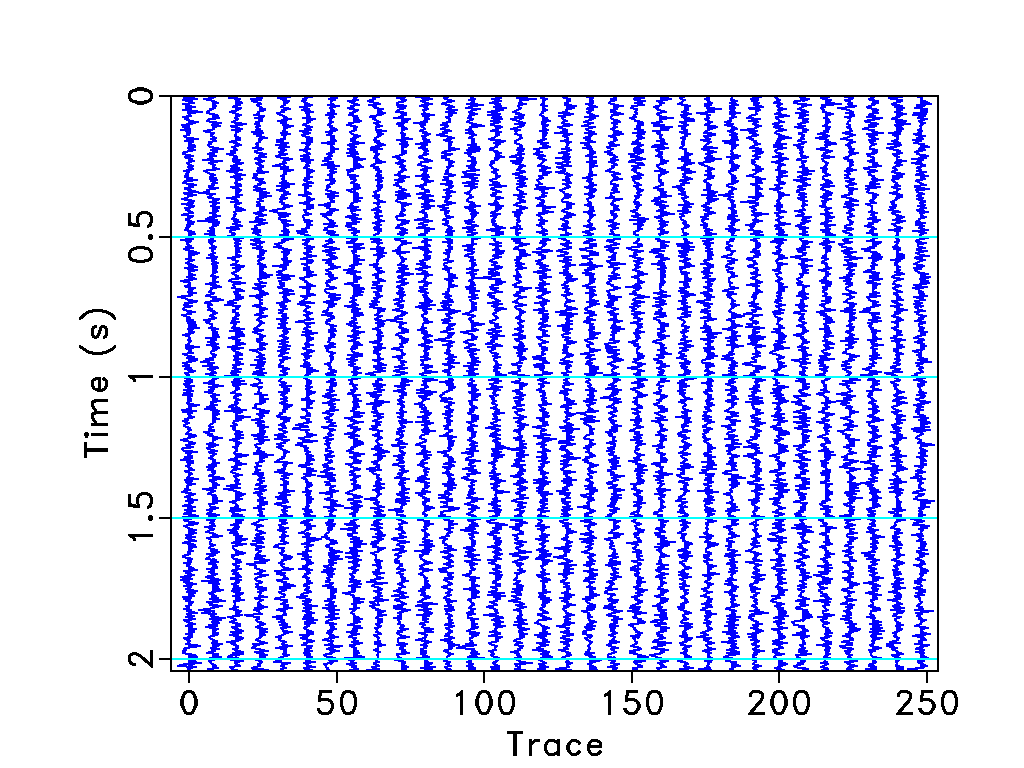

In [21]:
view("n")

<p id="fig:cn" style="color:navy">(c)</p>

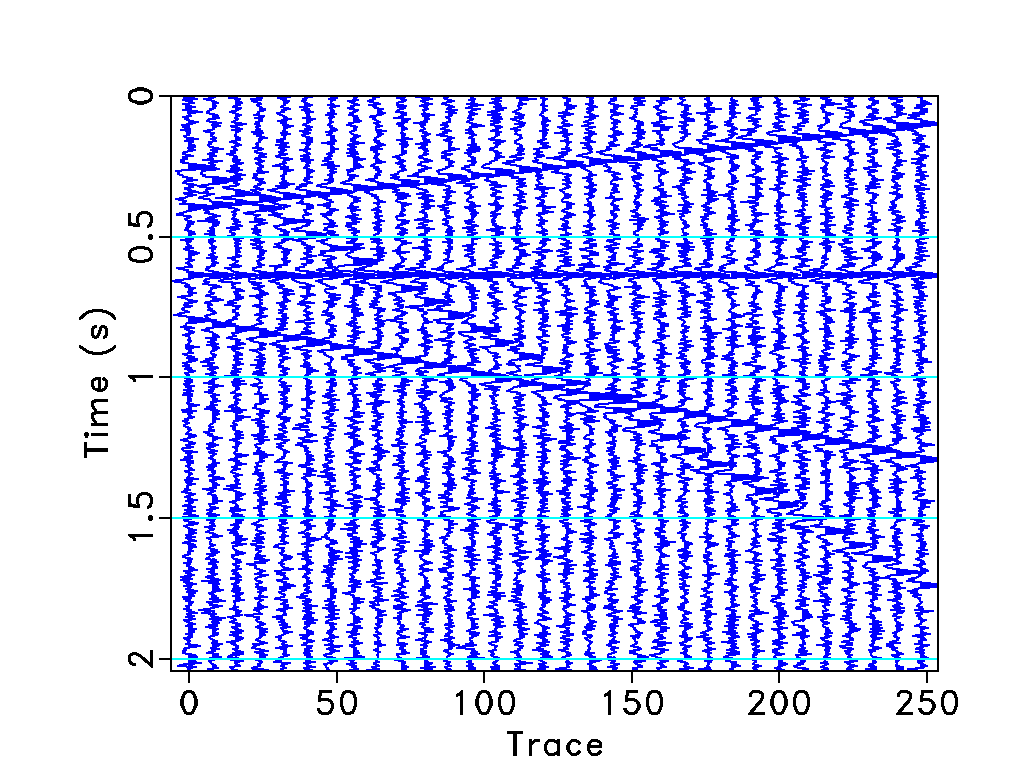

In [22]:
view("cn")

<p id="fig:cfx" style="color:navy">(d)</p>

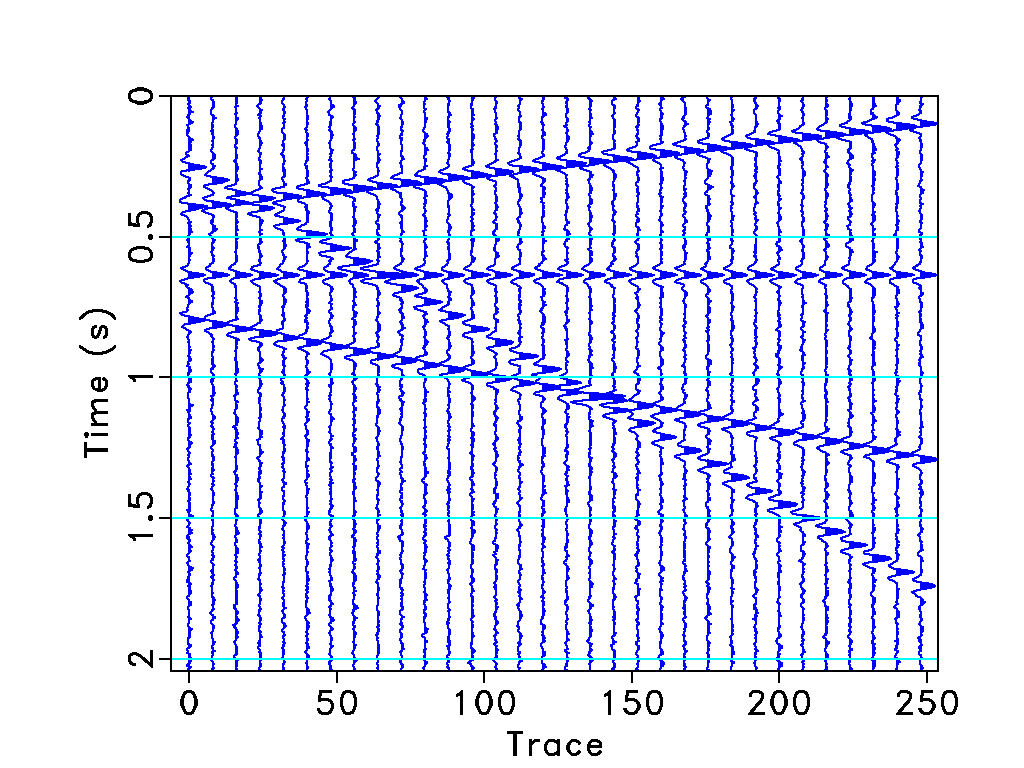

In [23]:
view("cfx")

<p id="fig:cdifffx" style="color:navy">(e)</p>

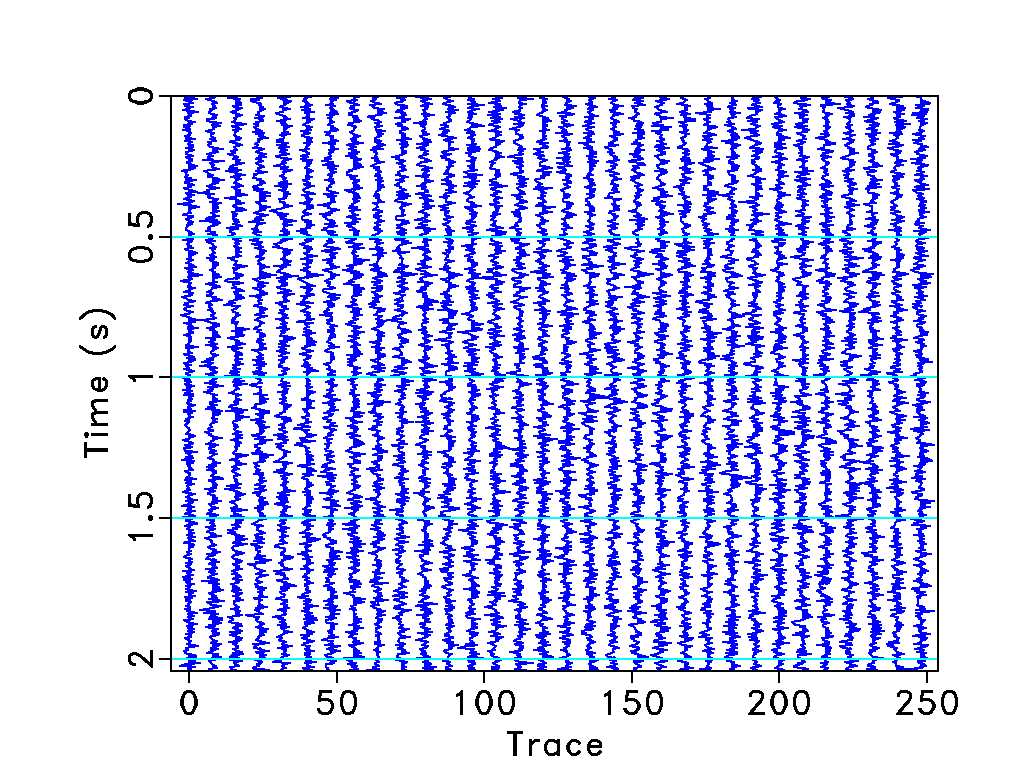

In [24]:
view("cdifffx")

<p id="fig:csimi-difffx" style="color:navy">(f)</p>

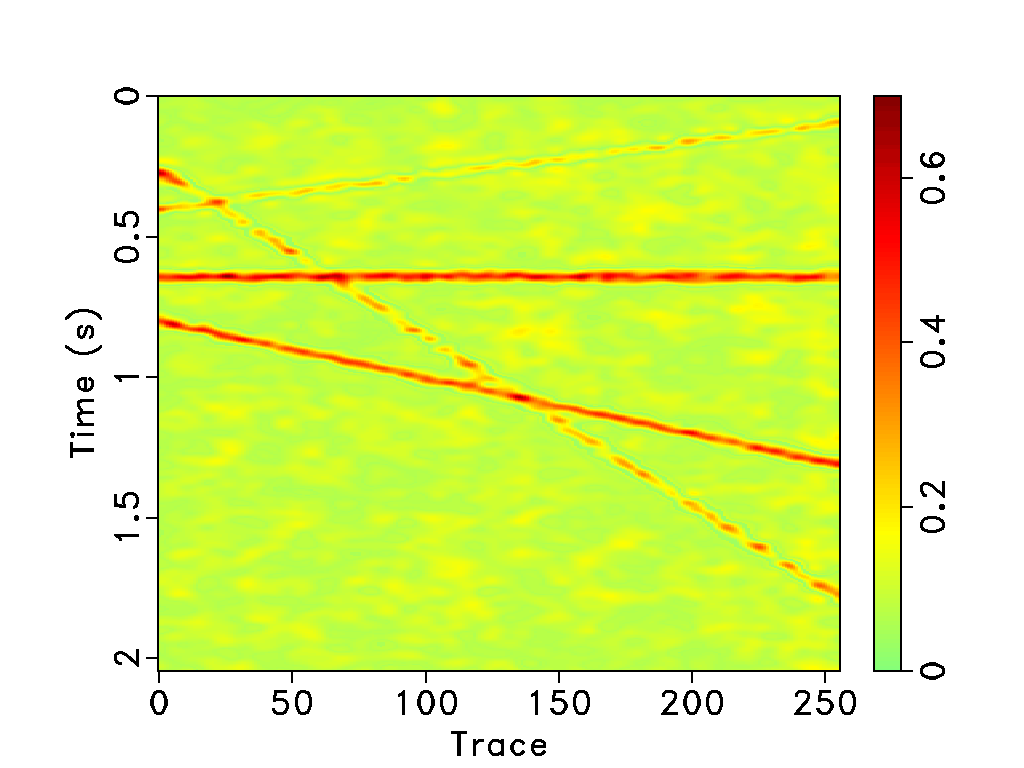

In [25]:
view("csimi-difffx")

<p id="fig:cfx2" style="color:navy">(g)</p>

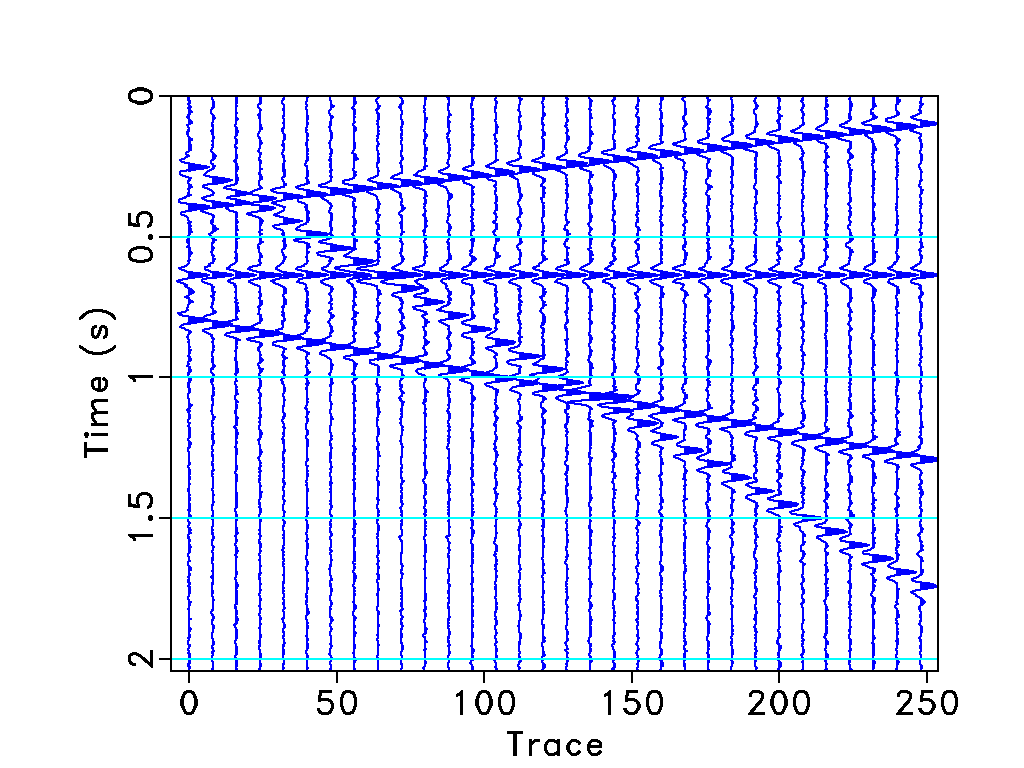

In [26]:
view("cfx2")

<p id="fig:cdifffx2" style="color:navy">(h)</p>

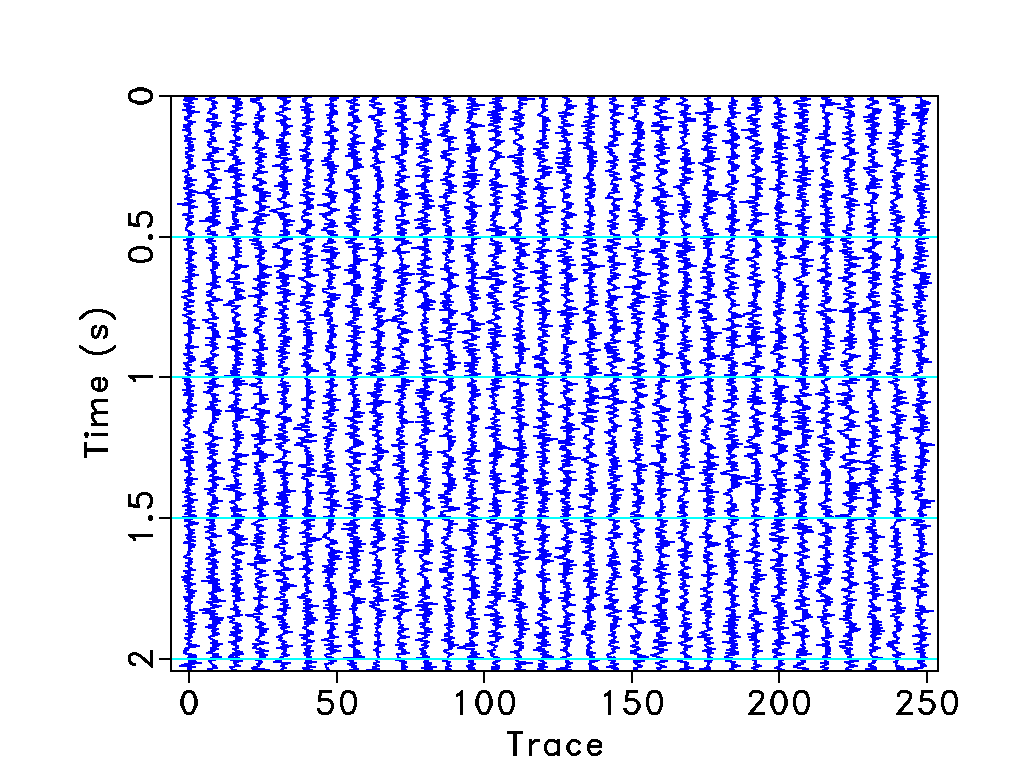

In [27]:
view("cdifffx2")

<p id="fig:csimi-difffx2" style="color:navy">(i)</p>

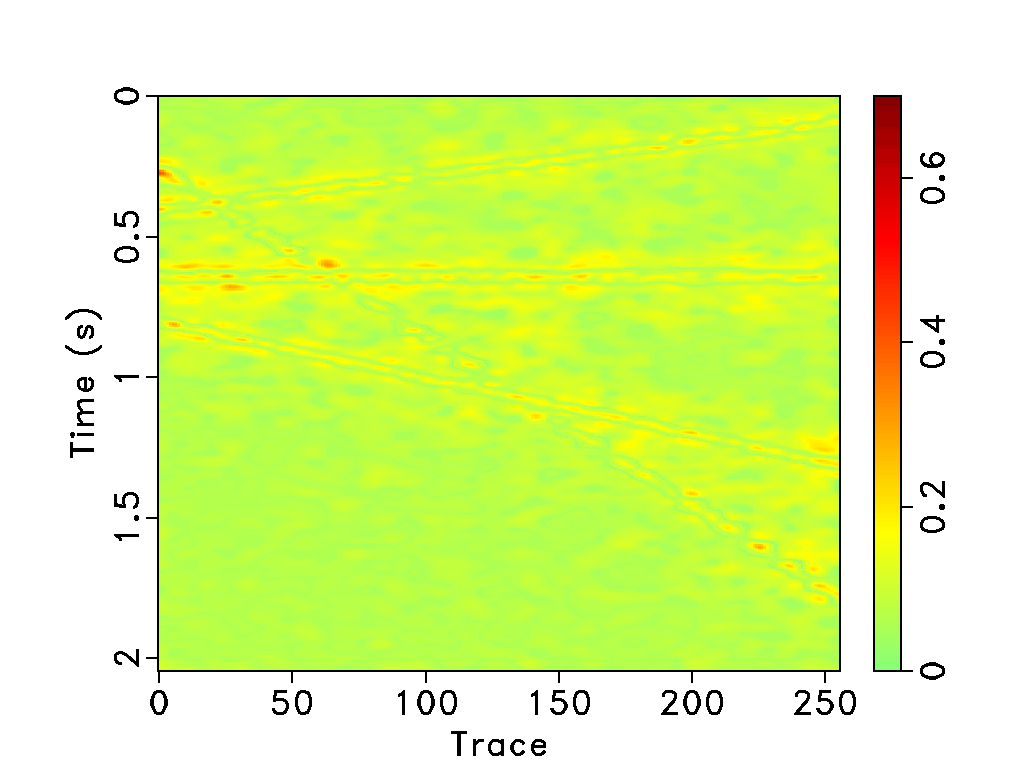

In [28]:
view("csimi-difffx2")

<p id="fig:c,n,cn,cfx,cdifffx,csimi-difffx,cfx2,cdifffx2,csimi-difffx2" style="color:navy">Figure 3. Comparison of using the local-orthogonalization-based random noise attenuation approach for denoising test before and after. (a) Clean section. (b) Random noise section. (c) Noisy section. (d) Denoised result using $f$-$x$ deconvolution. (e) Noise section using $f$-$x$ deconvolution. (f) Local similarity map between (d) and (e). (g) Denoised result using the proposed method. (h) Noise section using the proposed method. (i) Local similarity map between (g) and (h).</p>

The S/N comparison before and after using local-orthogonalization approach is summarized in Table <a href="#tbl:snrcomp" data-reference-type="ref" data-reference="tbl:snrcomp">1</a>.

<p id="tbl:snrcomp" style="color:navy">Table 1. Comparison of S/N before and after using the proposed approach.</p>

| Test                     | Deblending | Denoising |
|--------------------------|-----------------|-----------------|
| Original (dB) | 1.173           | -1.72           |
| Initially denoised (dB) | 17.65           | 21.21           |
| Orthogonalized (dB) | 20.95           | 25.30           |


## FIELD EXAMPLES

In this section, we use three field data sets to evaluate the proposed method. The first example is a simulated deblending test and the latter two examples are common denoising tests.

 Figure <a href="#fig:fairunblended2" data-reference-type="ref" data-reference="fig:fairunblended2">4a</a> shows the unblended data for the first test, which is a deep-water common receiver section containing events that are nearly flat. After numerical blending using the same blending approach as in the first synthetic example, the blended data (shown in Figure <a href="#fig:fairblended2" data-reference-type="ref" data-reference="fig:fairblended2">4c</a>) demonstrate strong interference. Figure <a href="#fig:fairdeblended2fx2" data-reference-type="ref" data-reference="fig:fairdeblended2fx2">4d</a> shows the deblended data after the use of $f$-$x$ deconvolution. When checking the noise section in Figure <a href="#fig:fairdeblended2dif-fx2" data-reference-type="ref" data-reference="fig:fairdeblended2dif-fx2">4e</a>, we found many coherent signals,  suggesting a significant leakage of useful signal energy. The denoised section after using the proposed approach is shown in Figure <a href="#fig:fairdeblended-ortho" data-reference-type="ref" data-reference="fig:fairdeblended-ortho">4g</a>. The noise section no longer contains coherent useful signals while the removed blending noise appears nearly unchanged. In this example, we set the vertical and lateral smoothing radii to 25 samples. The similarity maps before and after application of the proposed method are shown in Figure <a href="#fig:fairdif-simi" data-reference-type="ref" data-reference="fig:fairdif-simi">4f</a> and <a href="#fig:fairdeblendeddif-ortho" data-reference-type="ref" data-reference="fig:fairdeblendeddif-ortho">4h</a>. The SNR using the previous criteria of the blended data is 0.04. After the initial deblending using $f$-$x$ deconvolution, SNR improves to 7.44. Further, after the proposed retrieving-signal process, SNR improves to 10.08. It is worth to be mentioned that the preservation of useful signal is of significant importance in deblending, and thus the proposed approach is particularly attractive in its application to deblending.

In [29]:
from m8r import view

In [38]:
%%file 1_fairdeblended2dif-fx20.scons 

from rsf.proj import*
from rsf.recipes.beg import server

#######################################################################
## parameters definition
#######################################################################

clip=1 #display percentage
nfw=9

#######################################################################
## module definition
#######################################################################
def Grey(data,other): 
	Result(data,'window f1=1000 n1=1500 | grey transp=y yreverse=y  %s label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wanttitle=n labelsz=10 '%other)

def Grey1(data,other): 
	Result(data,'grey transp=y yreverse=y  %s label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wanttitle=n labelsz=10 '%other)
	
def plot (other): 
	return'''	
	grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b   %s'
	'''%other

#######################################################################
## data format conversion # segy->rsf
#######################################################################
for file in [
         '2-SOURCE-simulated_receiver_gather_SEGY','1-SOURCE-simulated_receiver_gather_SEGY']:
	 if file == '2-SOURCE-simulated_receiver_gather_SEGY':
	 	file1='fairblended'
	 elif file == '1-SOURCE-simulated_receiver_gather_SEGY':
	 	file1='fairunblended'

	 Fetch(file+'.sgy','fairfield',server)
	 Flow([file1,'t'+file1,file1+'.asc',file1+'.bin'],file+'.sgy',
	 '''
	 segyread
	 tfile=${TARGETS[1]}
	 hfile=${TARGETS[2]}
	 bfile=${TARGETS[3]}
	 ''')
	 #Result(file1,file1,'grey clip=%g'%(clip))

Flow('fairblended1','fairblended','window n2=201 | put o2=0 ')
Flow('fairblended22','fairblended','window f2=201 | put o2=0 ') # This is what we want to use.
Flow('fairunblended1','fairunblended','window n2=201 | put o2=0 ')
Flow('fairunblended2','fairunblended','window f2=201 | put o2=0 ') # This is what we want to use.

Flow('fair-noise','fairblended fairunblended','add scale=1,-1 ${SOURCES[1]}')
Flow('fair-zero','fair-noise','math output=0')
#######################################################################
## read shottime 
#######################################################################
Flow('shottime1n1','tfairblended',
	'''
        dd type=float
      	| headermath output="cdpx" | window n2=201 |transp
	''')

Flow('shottime2n1','tfairblended',
	'''
        dd type=float
      	| headermath output="cdpx" | window f2=201 |transp
	''')

#######################################################################
## mute data 1 
#######################################################################
## 
Flow('fairblended1mutedown','fairblended1','mutter half=n t0=1 slope0=0.0224')
Flow('fairblended1muteup','fairblended1','mutter half=n t0=0.4 slope0=0.016 | add scale=-1,1 ${SOURCES[0]}')
Flow('fairblended1mutedir','fairblended1mutedown fairblended1muteup fairblended1','add scale=-1,-1,1 ${SOURCES[1:3]}')

Flow('fairblended1mutedisp','fairblended1mutedown fairblended1mutedir fairblended1muteup','cat axis=2 ${SOURCES[1:3]}')
Flow('fairblended1mute','fairblended1 fairblended1mutedir','add scale=1,-1 ${SOURCES[1]}')
Flow('fairblended1mute-dir','fairblended1mute fairblended1mutedir','cat axis=2 ${SOURCES[1]}')

#######################################################################
## filtering using median filter and space-varying median filter
#######################################################################
## using median filter
#Flow('fairdeblended2mf','fairblended2','transp | mf nfw=%d | transp'%nfw)
#Flow('fairdeblended1mf','fairblended1mute fairblended1mutedir','transp | mf nfw=%d | transp | add scale=1,1 ${SOURCES[1]}'%nfw)
#Flow('fairdeblended1mf','fairblended1','transp | mf nfw=%d | transp '%nfw)


Flow('fairblended2','fairunblended2 fairunblended2 shottime1n1 shottime2n1','blend shot_time_in=${SOURCES[3]} shot_time_out=${SOURCES[2]} |add scale=1,1 ${SOURCES[1]}' )


#######################################################################
## filtering using fxdecon
#######################################################################
##
#Flow('fairdeblended1fx','fairblended1','fxdecon n2w=201 lenf=100')
#Flow('fairdeblended2fx','fairblended2','fxdecon n2w=201 lenf=201')
Flow('fairdeblended2fx2','fairblended2','fxdecon n2w=201 lenf=20')

## diff
#Flow('fairdeblended2dif-fx','fairblended2 fairdeblended2fx','add scale=1,-1 ${SOURCES[1]}')
Flow('fairdeblended2dif-fx2','fairblended2 fairdeblended2fx2','add scale=1,-1 ${SOURCES[1]}')

#######################################################################
## Similarity
#######################################################################
#Flow('fairsimi-fx','fairblended2 fairdeblended2fx','similarity other=${SOURCES[1]} niter=20 rect1=2 rect2=2')
#Flow('fairdeblended2sim','fairdeblended2fx fairsimi-fx','sfsimidenoise1 similarity=${SOURCES[1]} s1=0.2 s2=0.2')
#Flow('fairdeblended2dif-sim','fairblended2 fairdeblended2sim','add scale=1,-1 ${SOURCES[1]}')

#######################################################################
## Another approach using similarity
Flow('fairdif-simi','fairdeblended2fx2 fairdeblended2dif-fx2','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')
Flow('fairdifsim','fairdeblended2dif-fx2 fairdif-simi','sfsimidenoise1 similarity=${SOURCES[1]} s1=0.1 s2=0.2 | cut max1=7.5')
Flow('fairdeblended2sim2','fairdifsim fairdeblended2fx2','add scale=1,1 ${SOURCES[1]}')
Flow('fairdeblended2dif-sim2','fairblended2 fairdeblended2sim2','add scale=1,-1 ${SOURCES[1]}')
Flow('fairdif-simi2','fairdeblended2sim2 fairdeblended2dif-sim2','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')

# ortho
Flow('fairdeblendeddif-ortho fairdeblended-ortho','fairdeblended2dif-fx2 fairdeblended2fx2','ortho rect1=25 rect2=25 sig=${SOURCES[1]} sig2=${TARGETS[1]}')
Flow('fair-simi-ortho','fairdeblendeddif-ortho fairdeblended-ortho','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')

#######################################################################
## Ploting
#######################################################################
Grey('fairblended','scalebar=n clip=%f'%clip)
Grey('fairunblended','scalebar=n clip=%f'%clip)
Grey('fair-noise','scalebar=n clip=%f'%clip)
Grey('fair-zero','scalebar=n clip=%f'%clip)  # used by presentation
Grey('fairblended1','scalebar=n clip=%f'%clip)
Grey('fairblended2','scalebar=n clip=%f'%clip)
Grey('fairunblended1','scalebar=n clip=%f'%clip)
Grey('fairunblended2','scalebar=n clip=%f'%clip)
Grey('fairdeblendeddif-ortho','scalebar=n clip=%f'%clip)
Grey('fairdeblended-ortho','scalebar=n clip=%f'%clip)


#Grey('fairdeblended1fx','scalebar=n clip=%f'%clip)
#Grey('fairdeblended2fx','scalebar=n clip=%f'%clip)
Grey('fairdeblended2fx2','scalebar=n clip=%f'%clip)
#Grey('fairdeblended2sim','scalebar=n clip=%f'%clip)
Grey('fairdeblended2sim2','scalebar=n clip=%f'%clip)
#Grey('fairdeblended2dif-fx','scalebar=n clip=%f'%clip)
Grey('fairdeblended2dif-fx2','scalebar=n clip=%f'%clip)
#Grey('fairdeblended2dif-sim','scalebar=n clip=%f'%clip)
Grey('fairdeblended2dif-sim2','scalebar=n clip=%f'%clip)
Grey('fairdif-simi','color=j scalebar=y clip=0.9 minval=0 maxval=0.9')
Grey('fairdif-simi2','color=j scalebar=y clip=0.9 minval=0 maxval=0.9')
Grey('fair-simi-ortho','color=j scalebar=y clip=0.9 minval=0 maxval=0.9')

## Creating framebox
x2=0
y2=11.0
w=200
w2=4.7


## frame2
Flow('frame2.asc',None,'echo %s n1=10 data_format=ascii_float in=$TARGET'% \
	" ".join(map(str,(x2,y2,x2+w,y2,x2+w,y2+w2,x2,y2+w2,x2,y2))))
Plot('frame2','frame2.asc',
	'''
	dd type=complex form=native |
	graph min1=0 max1=200 min2=0 max2=16 pad=n plotfat=12 plotcol=3 
	wantaxis=n wanttitle=n yreverse=y
	''')

Result('fairdeblended2dif-fx20','Fig/fairdeblended2dif-fx2.vpl frame2','Overlay')

Overwriting 1_fairdeblended2dif-fx20.scons


In [39]:
%%file 2_fairdeblendeddif-ortho0.scons 

Result('fairdeblendeddif-ortho0','Fig/fairdeblendeddif-ortho.vpl frame2','Overlay')

Overwriting 2_fairdeblendeddif-ortho0.scons


In [40]:
%%file 9_whatever.scons 


## compute SNR (may differ in different computers)
Flow('fair-diff1','fairunblended2 fairblended2','add scale=1,-1 ${SOURCES[1]} ')
Flow('fair-snr1','fairunblended2 fair-diff1','snr2 noise=${SOURCES[1]}')

Flow('fair-diff2','fairunblended2 fairdeblended2fx2','add scale=1,-1 ${SOURCES[1]} ')
Flow('fair-snr2','fairunblended2 fair-diff2','snr2 noise=${SOURCES[1]}')

Flow('fair-diff3','fairunblended2 fairdeblended2sim2','add scale=1,-1 ${SOURCES[1]} ')
Flow('fair-snr3','fairunblended2 fair-diff3','snr2 noise=${SOURCES[1]}')

Flow('fair-diff4','fairunblended2 fairdeblended-ortho','add scale=1,-1 ${SOURCES[1]} ')
Flow('fair-snr4','fairunblended2 fair-diff4','snr2 noise=${SOURCES[1]}')

## zoom
Flow('fairdeblended2dif-fx2-zoom','fairdeblended2dif-fx2','window f1=2000 n1=500')
Flow('fairdeblendeddif-ortho-zoom','fairdeblendeddif-ortho','window f1=2000 n1=500')
Grey1('fairdeblended2dif-fx2-zoom','')
Grey1('fairdeblendeddif-ortho-zoom','')

Overwriting 9_whatever.scons


<p id="fig:fairunblended2" style="color:navy">(a)</p>

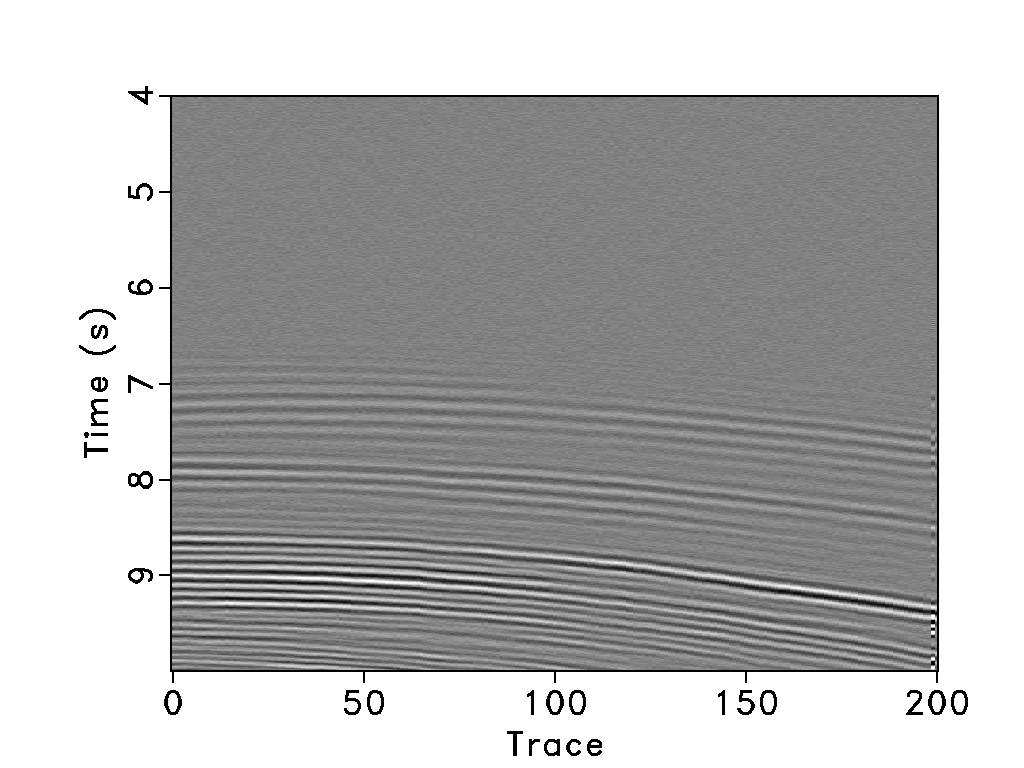

In [41]:
view("fairunblended2")

<p id="fig:fair-noise" style="color:navy">(b)</p>

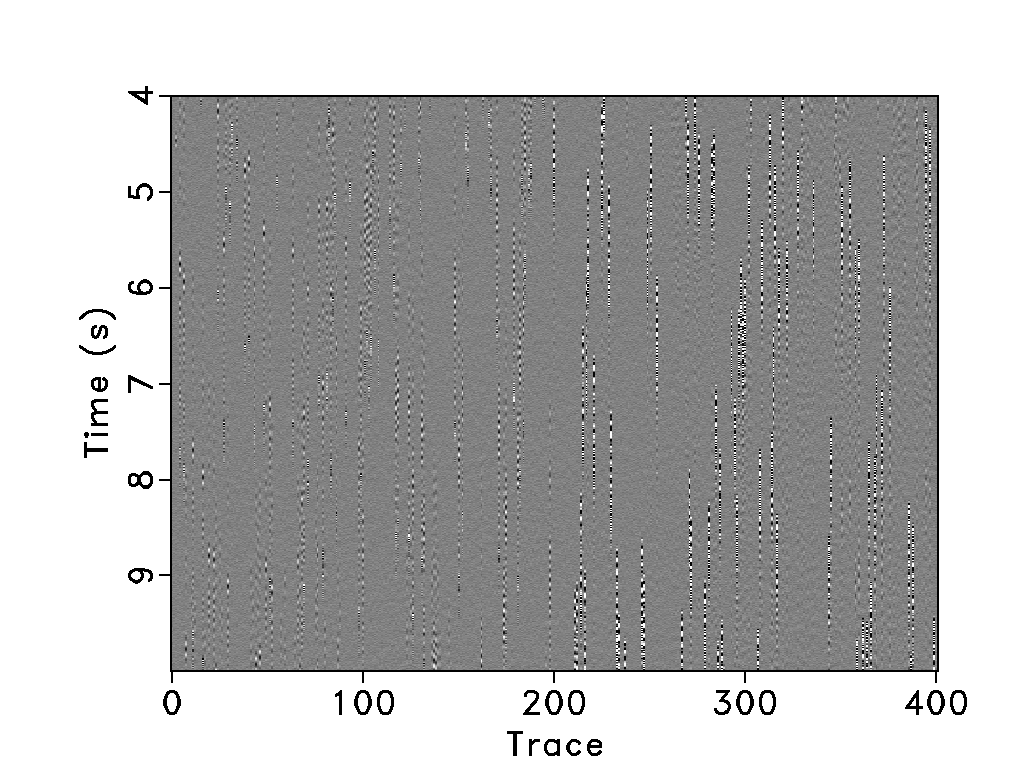

In [42]:
view("fair-noise")

<p id="fig:fairblended2" style="color:navy">(c)</p>

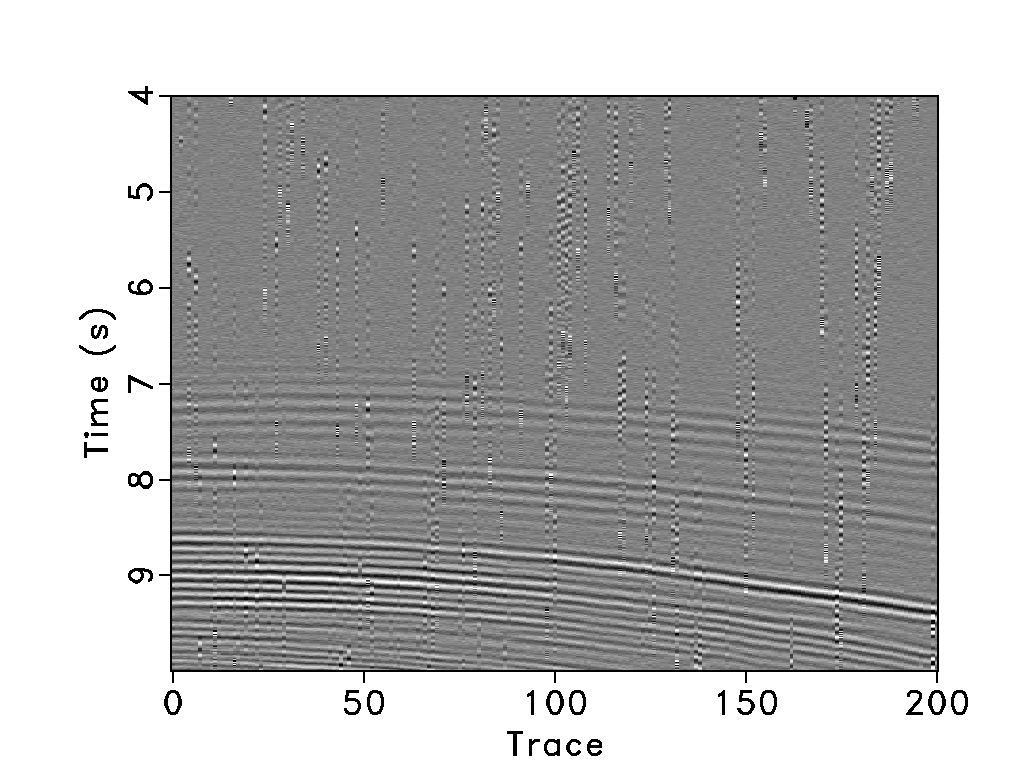

In [43]:
view("fairblended2")

<p id="fig:fairdeblended2fx2" style="color:navy">(d)</p>

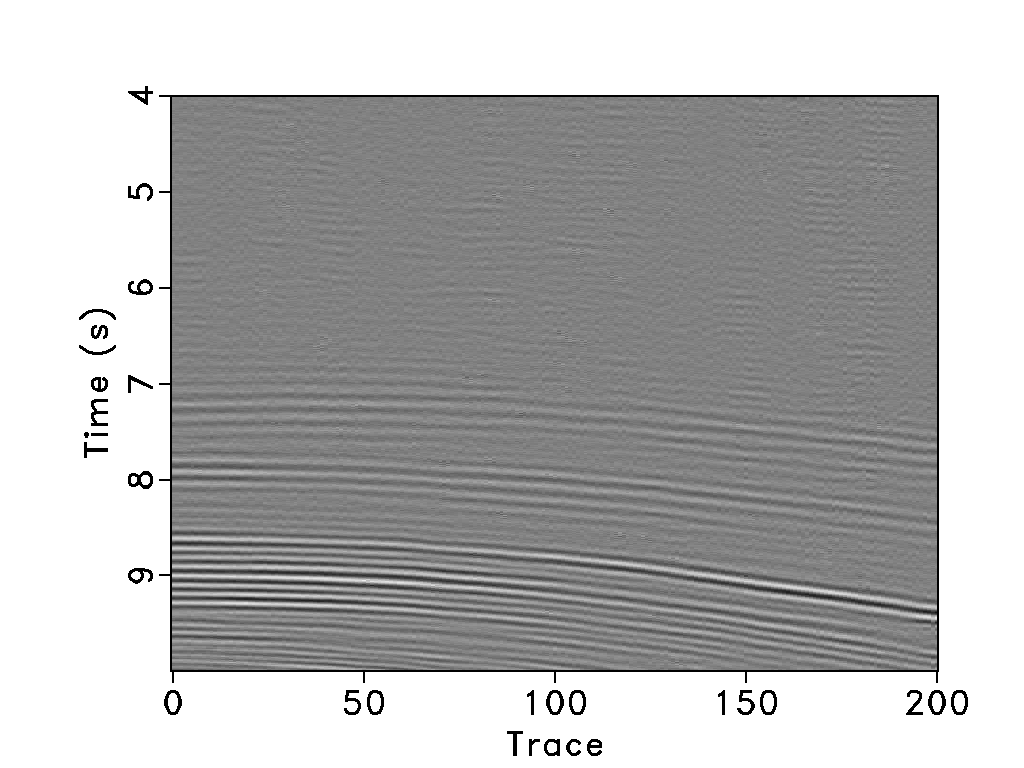

In [44]:
view("fairdeblended2fx2")

<p id="fig:fairdeblended2dif-fx2" style="color:navy">(e)</p>

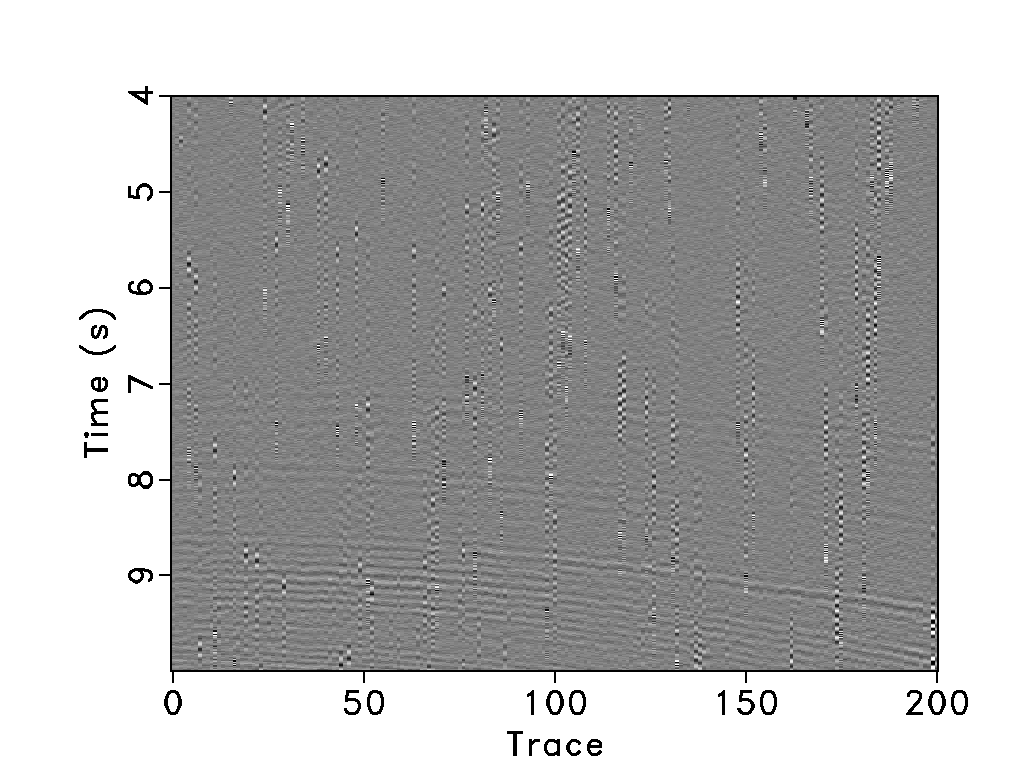

In [45]:
view("fairdeblended2dif-fx2")

<p id="fig:fairdif-simi" style="color:navy">(f)</p>

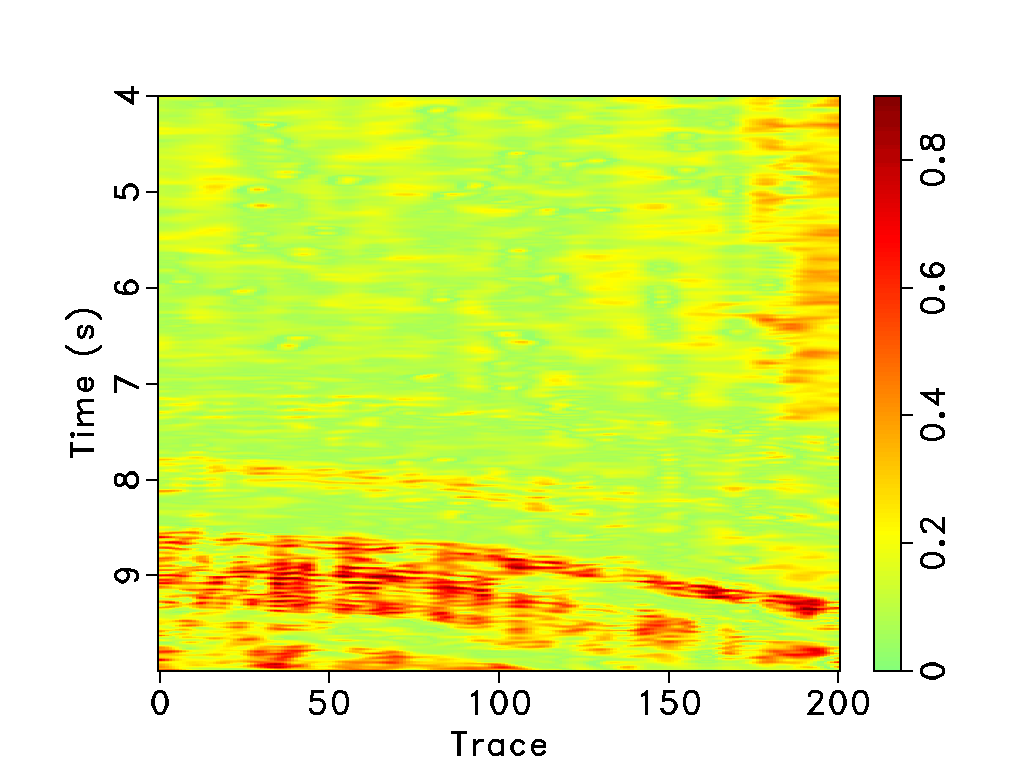

In [46]:
view("fairdif-simi")

<p id="fig:fairdeblended-ortho" style="color:navy">(g)</p>

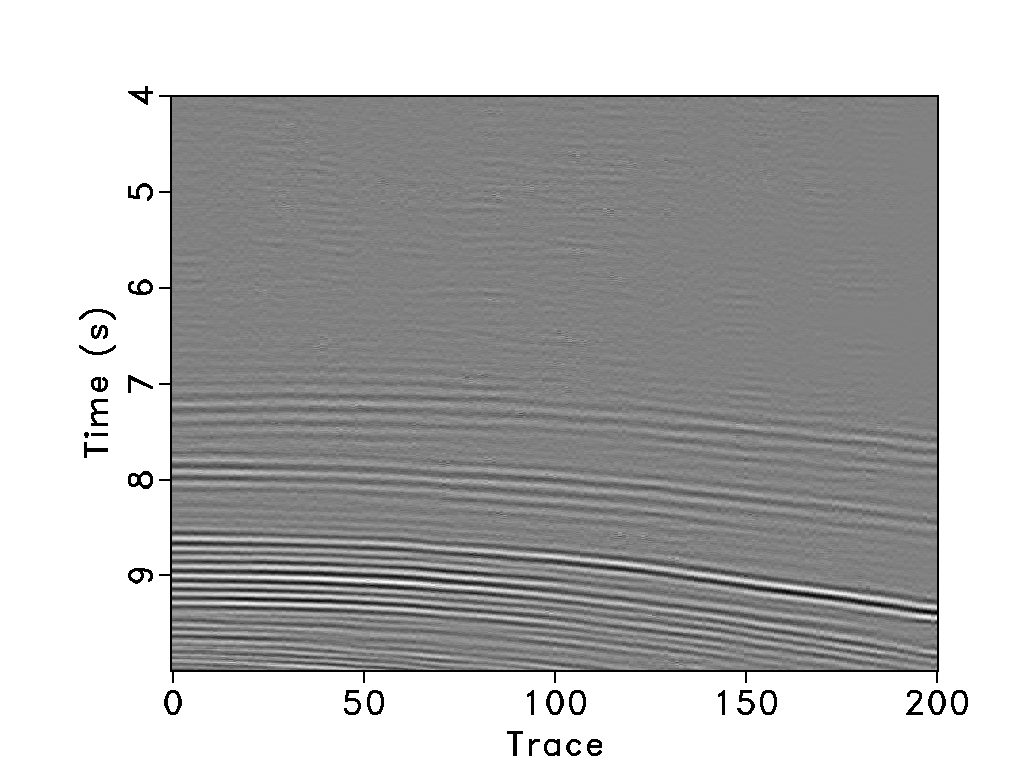

In [47]:
view("fairdeblended-ortho")

<p id="fig:fairdeblendeddif-ortho" style="color:navy">(h)</p>

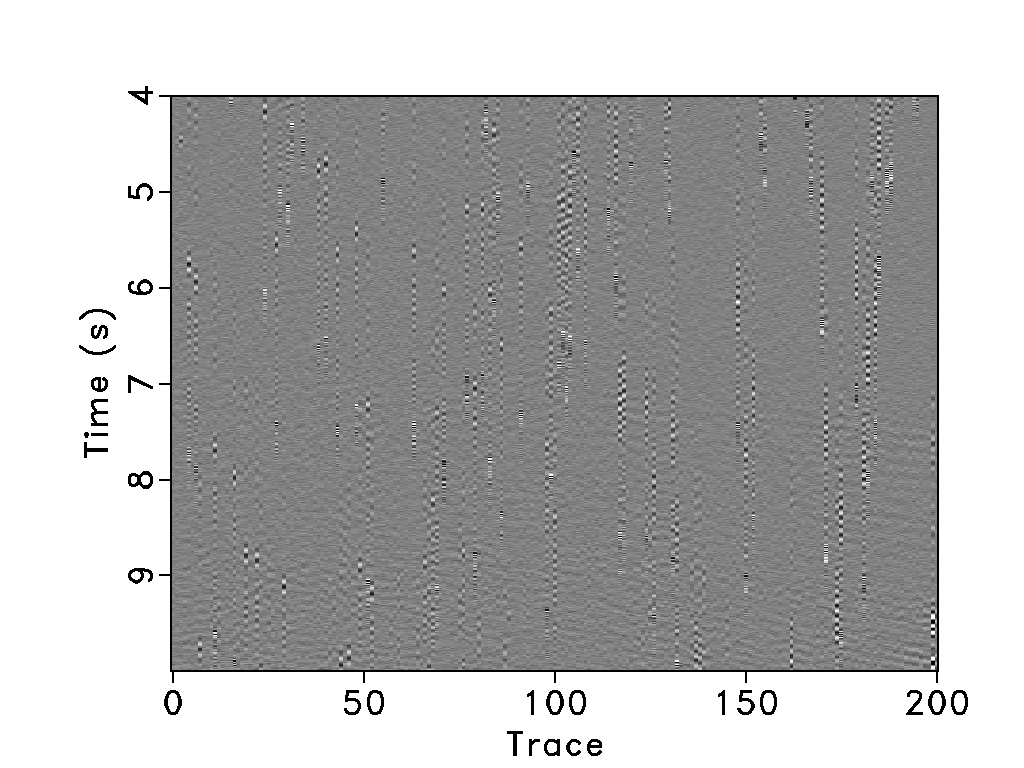

In [48]:
view("fairdeblendeddif-ortho")

<p id="fig:fair-simi-ortho" style="color:navy">(i)</p>

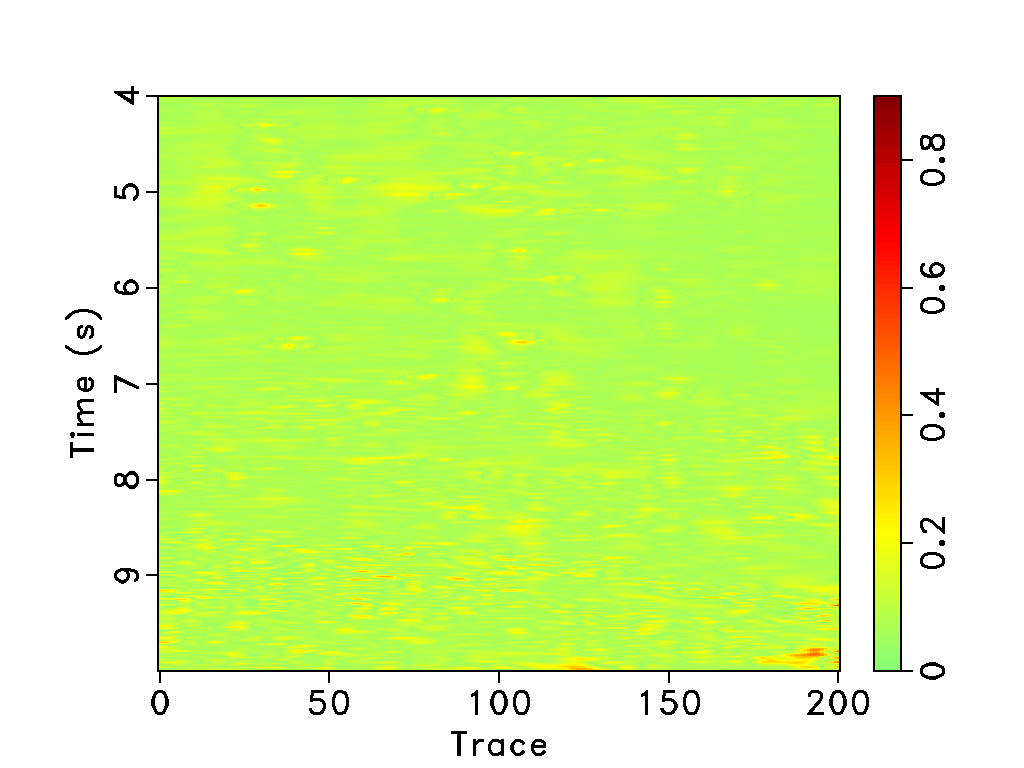

In [49]:
view("fair-simi-ortho")

<p id="fig:fairunblended2,fair-noise,fairblended2,fairdeblended2fx2,fairdeblended2dif-fx2,fairdif-simi,fairdeblended-ortho,fairdeblendeddif-ortho,fair-simi-ortho" style="color:navy">Figure 4. Comparison of using the local-orthogonalization-based random noise attenuation approach for deblending test before and after. (a) Unblended section (not clean, also containing random noise). (b) Blending noise section. (c) Blended section. (d) Deblended result using $f-x$ deconvolution. (e) Noise section using $f-x$ deconvolution. (f) Local similarity map between (d) and (e). (g) Deblended result using the proposed method. (h) Noise section using the proposed method. (i) Local similarity map between (g) and (h).</p>

The second field data test is for a land seismic section, which was used previously by [Fomel (2007a)][fomel2007localattr] and [Liu and Fomel (2012)][liuyang2012]. The input image is shown in Figure <a href="#fig:pp" data-reference-type="ref" data-reference="fig:pp">5</a>. The shallow part of the section is noisy, which may make interpretation difficult.  After a conventional $f$-$x$ deconvolution, a much cleaner section is obtained (Figure <a href="#fig:pp-fx" data-reference-type="ref" data-reference="fig:pp-fx">6a</a>). Some coherent signal is left in the noise section shown in Figure <a href="#fig:ppdiff-ortho0" data-reference-type="ref" data-reference="fig:ppdiff-ortho0">6d</a>, especially around 0.75s and the 350th trace. After local signal-and-noise orthogonalization, we obtained a clean denoised section but with strong amplitude in some regions and almost no loss of useful component in the noise section (Figure <a href="#fig:ppdiff-ortho0" data-reference-type="ref" data-reference="fig:ppdiff-ortho0">6d</a>). In this example, the vertical and lateral smoothing radii are both 2 samples. Unlike the synthetic data test and the previous field data test, for this field data test, the clean signal is unknown, so the SNR measurement cannot be applied. The two corresponding similarity maps are shown in Figure <a href="#fig:pp-simi,pp-simi-ortho" data-reference-type="ref" data-reference="fig:pp-simi,pp-simi-ortho">7</a>. The local similarity after applying the proposed approach is nearly zero along the whole seismic section.

[fomel2007localattr]:https://doi.org/10.1190/1.2437573
[liuyang2012]:https://doi.org/10.1111/j.1365-2478.2012.01062.x

In [50]:
from m8r import view

In [51]:
%%file 1_ppdiff-fx0.scons 

from rsf.recipes.beg import server as private


def Wiggle(data,other): 
	Result(data,'''
				window j2=2 | wiggle transp=y yreverse=y 
				label2=Trace unit2="" label1=Time unit1="s" 
				title="" wherexlabel=b wheretitle=t poly=y 
				wheretitle=b wherexlabel=b %s clip=0.38 '''%other)

def Grey(data,other): 
	Result(data,'''
				grey transp=y yreverse=y 
				label2=Trace unit2="" label1=Time unit1="s" 
				title="" wherexlabel=b wheretitle=t poly=y color=g
				wheretitle=b wanttitle=n wherexlabel=b %s clip=0.38 '''%other)

Fetch('bend_l1_pmig_enhanc.sgy','vecta',private)
Fetch('bend_l1_smig_enhanc.sgy','vecta',private)

Flow('pp','bend_l1_pmig_enhanc.sgy',
         'segyread tape=$SOURCE read=data | window n2=471 | scale axis=2 | put label2=Trace',
         stdin=0)

## ploting
Grey('pp','')

Writing 1_ppdiff-fx0.scons


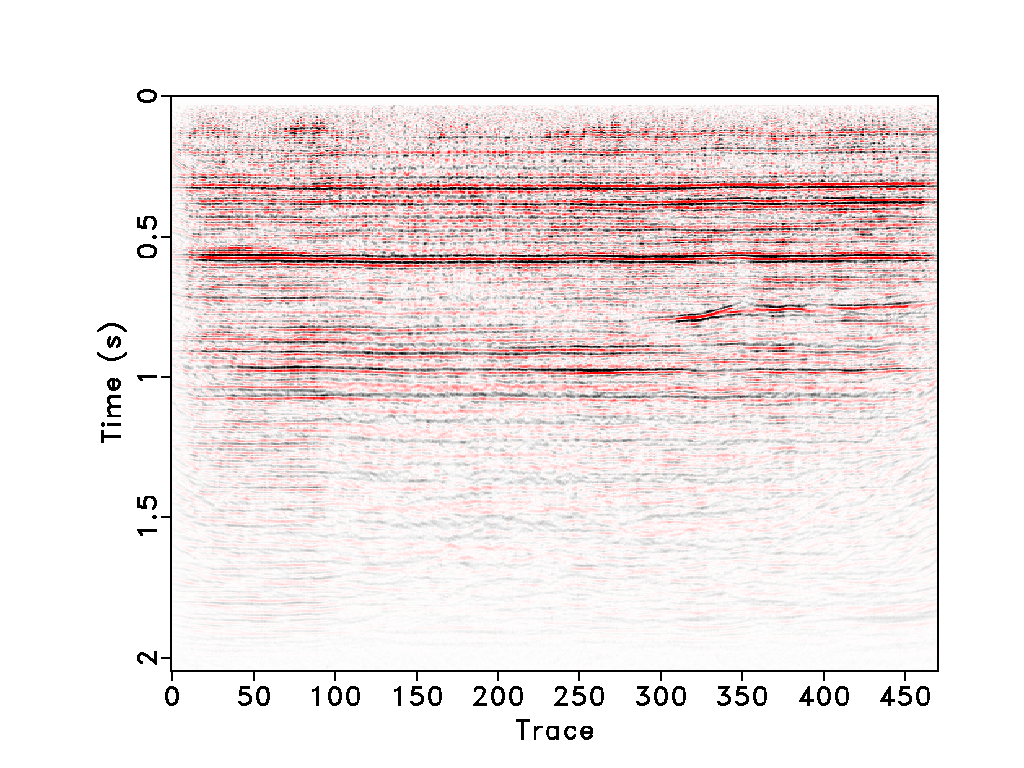

In [52]:
view("pp")

<p id="fig:pp" style="color:navy">
Figure 5. Noisy post-stack land field data.</p>

([Fomel, 2013][fomel20132])

[fomel20132]:https://doi.org/10.1190/geo2013-0221.1

In [59]:
%%file 2_ppdiff-fx0.scons 

def Wiggle(data,other): 
	Result(data,'''
				window j2=2 | wiggle transp=y yreverse=y 
				label2=Trace unit2="" label1=Time unit1="s" 
				title="" wherexlabel=b wheretitle=t poly=y 
				wheretitle=b wherexlabel=b %s clip=0.38 '''%other)

def Grey(data,other): 
	Result(data,'''
				grey transp=y yreverse=y 
				label2=Trace unit2="" label1=Time unit1="s" 
				title="" wherexlabel=b wheretitle=t poly=y color=g
				wheretitle=b wanttitle=n wherexlabel=b %s clip=0.38 '''%other)

Flow('ss','bend_l1_smig_enhanc.sgy',
         'segyread tape=$SOURCE read=data | window n2=471 | scale axis=2 | put label2=Trace',
         stdin=0)

## fxdecon
Flow('pp-fx','pp','fxdecon n2w=471')
Flow('ppdiff-fx','pp-fx pp','add scale=-1,1 ${SOURCES[1]}')

## Similarity
Flow('pp-simi','ppdiff-fx pp-fx','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')
Flow('ppsim-fx','ppdiff-fx pp-simi pp-fx','simidenoise1 similarity=${SOURCES[1]} s1=0.15 s2=0.2 | add scale=1,1 ${SOURCES[2]}')
Flow('ppdiffsim-fx','ppsim-fx pp','add scale=-1,1 ${SOURCES[1]}')
Flow('pp-simi2','ppdiffsim-fx ppsim-fx','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')

# ortho
Flow('ppdiff-ortho pp-ortho','ppdiff-fx pp-fx','ortho rect1=2 rect2=2 sig=${SOURCES[1]} sig2=${TARGETS[1]}')

## ploting
Grey('pp-fx','')
Grey('pp-ortho','')
Grey('ppdiff-fx','')
Grey('ppdiff-ortho','')
Grey('ppsim-fx','')
Grey('ppdiffsim-fx','')
Grey('pp-simi2','color=j scalebar=y clip=0.8 minval=0 maxval=0.8')


## Creating framebox
x=1300
y=1.7
w=250
w1=0.5

Flow('frame1.asc',None,'echo %s n1=10 data_format=ascii_float in=$TARGET'% \
	" ".join(map(str,(x,y,x+w,y,x+w,y+w1,x,y+w1,x,y))))
Plot('frame1','frame1.asc',
	'''
	dd type=complex form=native |
	graph min1=0 max1=2000 min2=0 max2=5 pad=n plotfat=15 plotcol=4 
	wantaxis=n wanttitle=n yreverse=y scalebar=n
	''')

Result('ppdiff-fx0','Fig/ppdiff-fx.vpl frame1','Overlay')

Overwriting 2_ppdiff-fx0.scons


In [54]:
%%file 2_ppdiff-ortho0.scons 

Result('ppdiff-ortho0','Fig/ppdiff-ortho.vpl frame1','Overlay')

Writing 2_ppdiff-ortho0.scons


<p id="fig:pp-fx" style="color:navy">(a)</p>

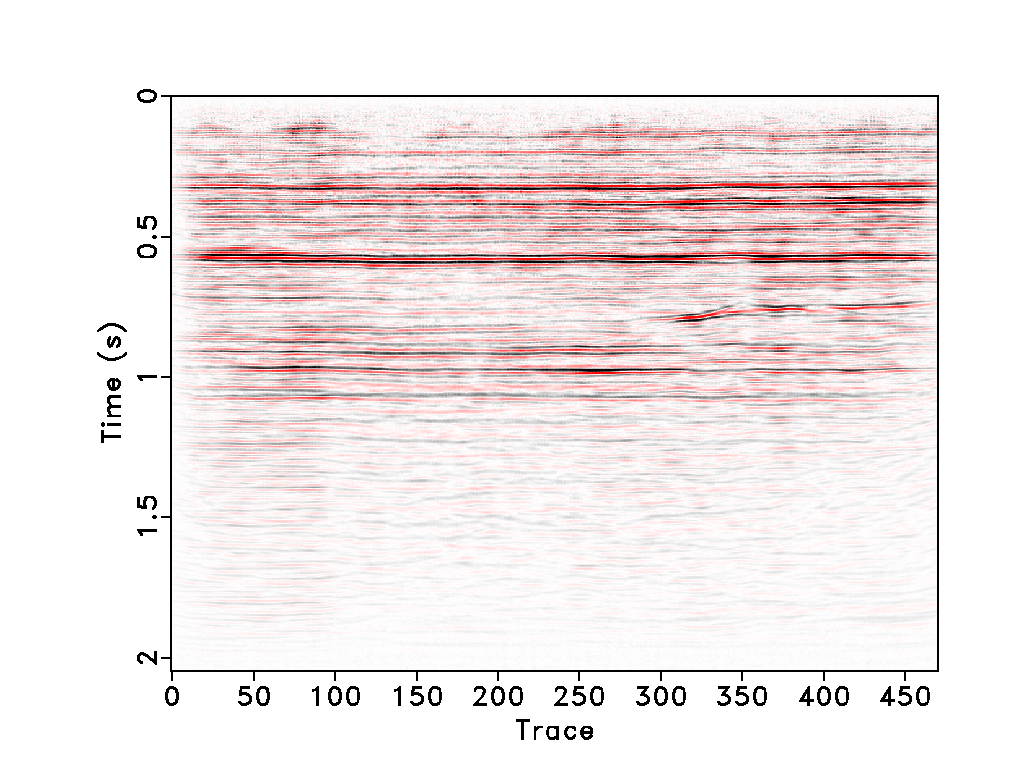

In [60]:
view("pp-fx")

<p id="fig:pp-ortho" style="color:navy">(b)</p>

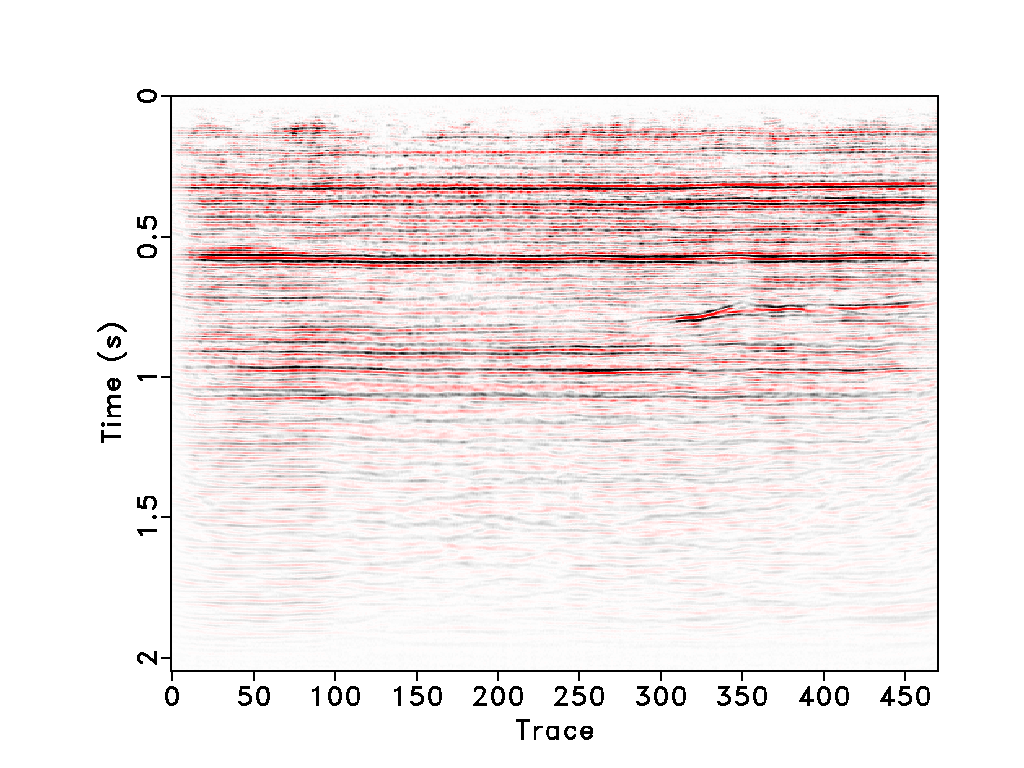

In [61]:
view("pp-ortho")

<p id="fig:ppdiff-fx0" style="color:navy">(c)</p>

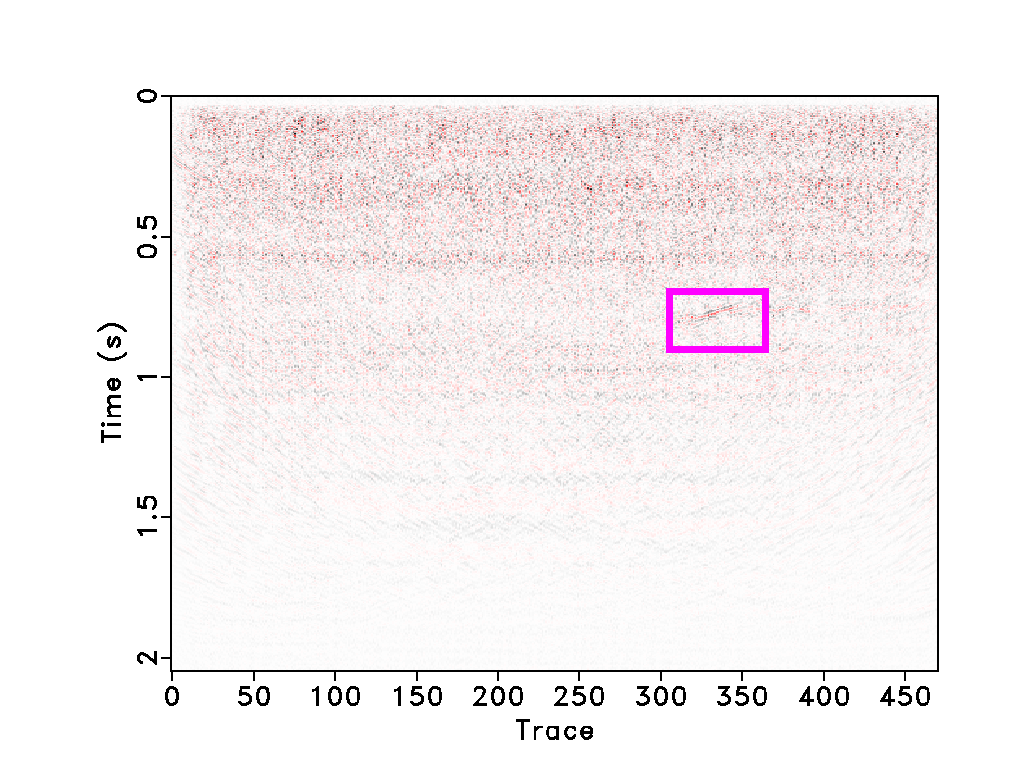

In [62]:
view("ppdiff-fx0")

<p id="fig:ppdiff-ortho0" style="color:navy">(d)</p>

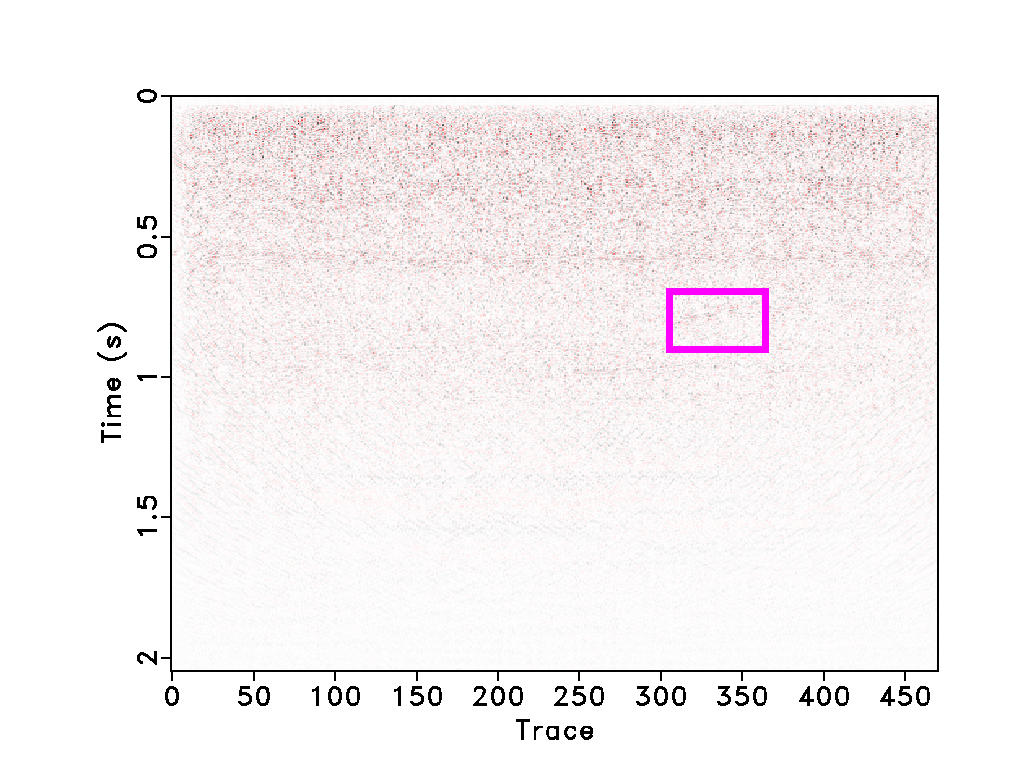

In [63]:
view("ppdiff-ortho0")

<p id="fig:pp-fx,pp-ortho,ppdiff-fx0,ppdiff-ortho0" style="color:navy">Figure 6. (a) Denoised section using $f-x$ deconvolution. (b) Denoised section using the proposed approach. (c) Noise section using $f-x$ deconvolution.  (d) Noise section using the proposed approach.</p>

In [64]:
%%file 3_ppdiff-fx0.scons 

def Wiggle(data,other): 
	Result(data,'''
				window j2=2 | wiggle transp=y yreverse=y 
				label2=Trace unit2="" label1=Time unit1="s" 
				title="" wherexlabel=b wheretitle=t poly=y 
				wheretitle=b wherexlabel=b %s clip=0.38 '''%other)

def Grey(data,other): 
	Result(data,'''
				grey transp=y yreverse=y 
				label2=Trace unit2="" label1=Time unit1="s" 
				title="" wherexlabel=b wheretitle=t poly=y color=g
				wheretitle=b wanttitle=n wherexlabel=b %s clip=0.38 '''%other)

# ortho
Flow('pp-simi-ortho','ppdiff-ortho pp-ortho','similarity other=${SOURCES[1]} niter=20 rect1=5 rect2=5')

## ploting
Grey('pp-simi','color=j scalebar=y clip=0.8 minval=0 maxval=0.8')
Grey('pp-simi-ortho','color=j scalebar=y clip=0.8 minval=0 maxval=0.8')

Writing 3_ppdiff-fx0.scons


<p id="fig:pp-simi" style="color:navy">(a)</p>

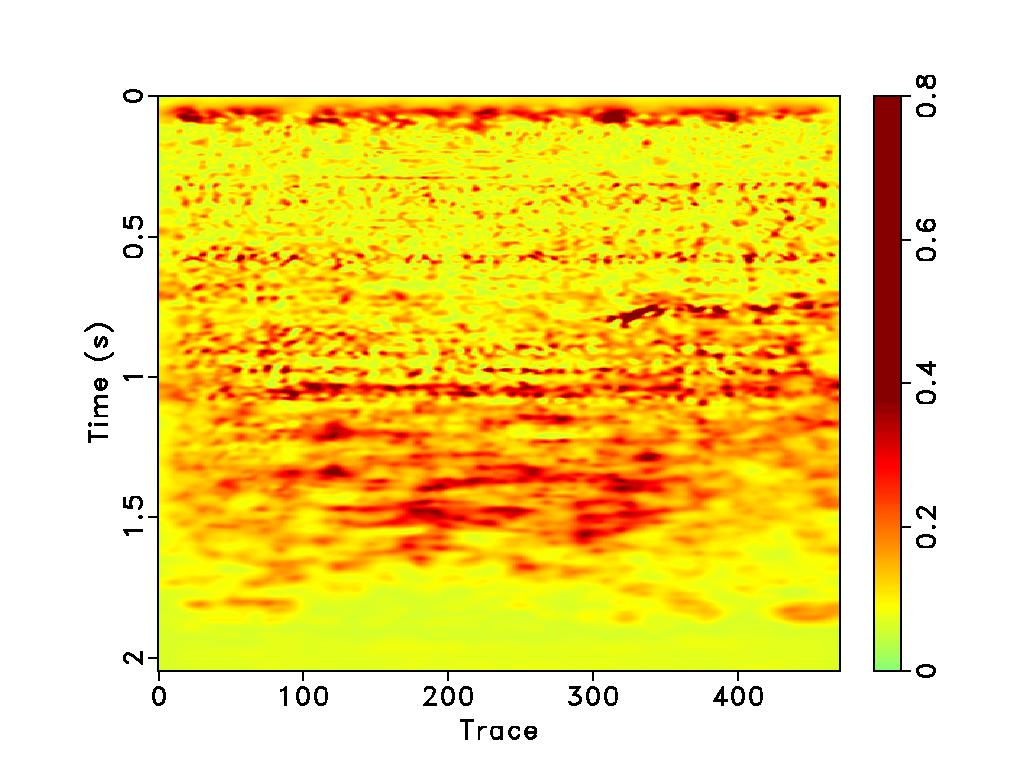

In [65]:
view("pp-simi")

<p id="fig:pp-simi-ortho" style="color:navy">(b)</p>

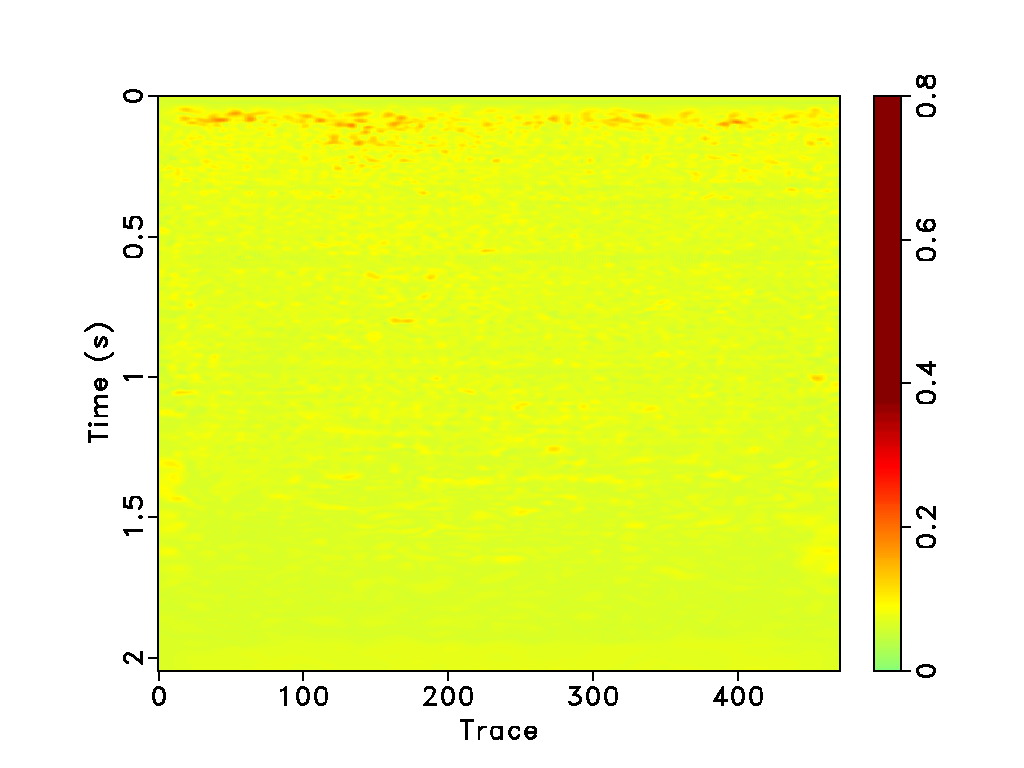

In [66]:
view("pp-simi-ortho")

<p id="fig:pp-simi,pp-simi-ortho" style="color:navy">Figure 7. Comparison of similarity between noise section and denoised section with and without using the proposed random noise attenuation approach. (a) Similarity map using $f-x$ deconvolution. (b) Similarity map using the proposed method.</p>

The third field data example is borrowed from [Liu et al. (2012)][guochang2012]. The noisy data is shown in Figure <a href="#fig:data" data-reference-type="ref" data-reference="fig:data">8</a>. The initial signal and noise models are prepared using $f-x$ regularized nonstationary autoregression (RNAR). Following the approach of [Liu et al. (2012)][guochang2012], the initially denoised data are shown in Figure <a href="#fig:npre" data-reference-type="ref" data-reference="fig:npre">9a</a>. The corresponding noise section is shown in Figure <a href="#fig:nprediff0" data-reference-type="ref" data-reference="fig:nprediff0">9c</a>. The general denoising approach shows good performance considering the clean denoised image and random removed noise. However, we can find small useful signals from the noise section, as indicated by the frame boxes in Figure <a href="#fig:nprediff0" data-reference-type="ref" data-reference="fig:nprediff0">9c</a>. The denosied image using the proposed approach is shown in Figure <a href="#fig:rna-ortho" data-reference-type="ref" data-reference="fig:rna-ortho">9b</a>. After using local orthogonalization to retrieve useful signal, the coherent signal disappears in the final noise section (Figure <a href="#fig:rnadiff-ortho0" data-reference-type="ref" data-reference="fig:rnadiff-ortho0">9d</a>), as indicated by the frame boxes. The zoomed sections corresponding to frame boxes A and B in Figure <a href="#fig:npre,rna-ortho,nprediff0,rnadiff-ortho0" data-reference-type="ref" data-reference="fig:npre,rna-ortho,nprediff0,rnadiff-ortho0">9</a> are shown in Figure <a href="#fig:zoom-rnadif-a,zoom-orthodif-a,zoom-rnadif-b,zoom-orthodif-b" data-reference-type="ref" data-reference="fig:zoom-rnadif-a,zoom-orthodif-a,zoom-rnadif-b,zoom-orthodif-b">10</a>. In this example, we chose the vertical and lateral smoothing radius as 5 samples. Before using the proposed approach, the local similarity map between the denoised data and removed noise (Figure <a href="#fig:rna-simi" data-reference-type="ref" data-reference="fig:rna-simi">11a</a>) showed  some high-similarity anomalies. After applying the proposed approach, the similarity map is nearly zero everywhere across the whole section.

[guochang2012]:https://doi.org/10.1190/geo2011-0117.1

In [67]:
from m8r import view

In [68]:
%%file 1_zdata.scons 

from rsf.recipes.beg import server
from math import *
def Grey(data,other): 
	Result(data,'put d2=1 |grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wheretitle=t scalebar=n  clip=2  %s  '%other)

def Greydemo(datao,datai,other): 
	Plot(datao,datai,'put d2=1 |grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=t wheretitle=b scalebar=n  clip=2  %s  '%other)

def Greynoise(data,other): 
	Result(data,'put d2=1 |grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wheretitle=t scalebar=n color=j  minval=-0.4 maxval=0.4 clip=0.2 %s  '%other)

#----------------------------------------------dat

Fetch('image2d.rsf','cup',server)
Flow('data','image2d','dd form=native')

Flow('mask','data','envelope | causint | math output="input*input" | mask min=40 | dd type=float')

Result('zdata','data','window min1=3 max1=4 min2=4000 max2=6000 | grey title="Zoom Data" color=e screenratio=1.5')

Grey('data','')

Writing 1_zdata.scons


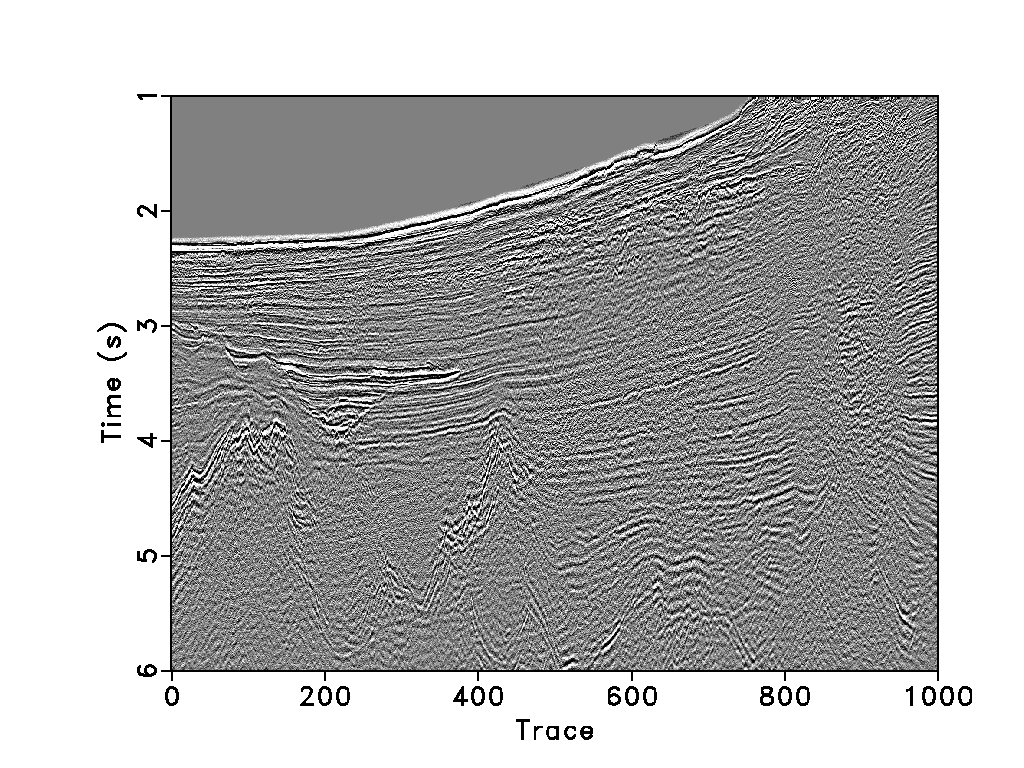

In [69]:
view("data")

<p id="fig:data" style="color:navy">Figure 8. Noisy post-stack field data.</p>

([Liu et al., 2012][guochang2012])

[guochang2012]:https://doi.org/10.1190/geo2011-0117.1

In [70]:
%%file 2_patch.scons 


########## Patch
Flow('patch','data','patch w=256,1001 p=20,1')
Flow('patch0','patch','patch inv=y weight=y dim=2')

#Result('patch','patch','grey title="Patch Data"')

Writing 2_patch.scons


In [71]:
%%file 4_rnadiff-ortho0.scons 

def Grey(data,other): 
	Result(data,'put d2=1 |grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wheretitle=t scalebar=n  clip=2  %s  '%other)

def Greydemo(datao,datai,other): 
	Plot(datao,datai,'put d2=1 |grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=t wheretitle=b scalebar=n  clip=2  %s  '%other)

def Greynoise(data,other): 
	Result(data,'put d2=1 |grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wheretitle=t scalebar=n color=j  minval=-0.4 maxval=0.4 clip=0.2 %s  '%other)

nx=1001
nshifts = []
for s in range(1,5):

    nshift = 'nshift-%d' % s
    Flow(nshift,'patch','window f2=%d | pad end2=%d' % (s,s))
    nshifts.append(nshift)

    nshift = 'nshift+%d' % s
    Flow(nshift,'patch','window n2=%d | pad beg2=%d ' % (nx-s,s)) 
    nshifts.append(nshift)


Flow('nshifts',nshifts,'cat ${SOURCES[1:%d]} axis=4 | put o2=0 ' % len(nshifts))

wflts = []
wpres = []
for nwt in range(0,20):
    wdata  = 'wdata%d'  % nwt
    wshift = 'wshift%d' % nwt
    wflt   = 'wfl%d'    % nwt
    wpre   = 'wpre%d'    % nwt
    Flow(wdata,'patch','window n3=1 f3=%d | fft1 ' % nwt) 
    Flow(wshift,'nshifts','window n3=1 f3=%d | window | fft1' % nwt)   
    Flow([wflt, wpre],[wshift, wdata],
         'clpf match=${SOURCES[1]} pred=${TARGETS[1]} rect2=20 rect1=3 niter=10 verb=n')
    wpres.append(wpre)

Flow('pre',wpres,'cat ${SOURCES[1:%d]} axis=4 | fft1 inv=y  ' % len(wpres))
Flow('npre','pre','transp plane=34 memsize=1000 | patch inv=y weight=y dim=2 --out=stdout')
Flow('nprediff','data npre','add scale=1,-1 ${SOURCES[1]} --out=stdout')

# ortho
Flow('rnadiff-ortho rna-ortho','nprediff npre','ortho rect1=5 rect2=5 sig=${SOURCES[1]} sig2=${TARGETS[1]}')

Grey('npre',' ')
Grey('nprediff',' ')
Grey('rna-ortho',' ')
Grey('rnadiff-ortho','')

Writing 4_rnadiff-ortho0.scons


In [72]:
%%file 5_rnadiff-ortho0.scons 

## Creating framebox
x=440
y=2.0
w=360
w1=0.8

Flow('frame1.asc',None,'echo %s n1=10 data_format=ascii_float in=$TARGET'% \
	" ".join(map(str,(x,y,x+w,y,x+w,y+w1,x,y+w1,x,y))))
Plot('frame1','frame1.asc',
	'''
	dd type=complex form=native |
	graph min1=0 max1=2000 min2=0 max2=5 pad=n plotfat=15 plotcol=4 
	wantaxis=n wanttitle=n yreverse=y scalebar=n
	''')

## Creating framebox
x=900
y=2.3
w=400
w1=0.8

Flow('frame2.asc',None,'echo %s n1=10 data_format=ascii_float in=$TARGET'% \
	" ".join(map(str,(x,y,x+w,y,x+w,y+w1,x,y+w1,x,y))))
Plot('frame2','frame2.asc',
	'''
	dd type=complex form=native |
	graph min1=0 max1=2000 min2=0 max2=5 pad=n plotfat=15 plotcol=4 
	wantaxis=n wanttitle=n yreverse=y scalebar=n
	''')

## Create label A
Plot('labela',None,
	'''
	box x0=5.5 y0=5.9 label="A" xt=0.5 yt=0.5 length=0.75 
	''')

## Create label B
Plot('labelb',None,
	'''
	box x0=8.9 y0=5.3 label="B" xt=0.5 yt=0.5 length=0.75 
	''')

Result('rnadiff-ortho0','Fig/rnadiff-ortho.vpl frame1 frame2 labela labelb','Overlay')

Writing 5_rnadiff-ortho0.scons


In [73]:
%%file 5_nprediff0.scons 

Result('nprediff0','Fig/nprediff.vpl frame1 frame2 labela labelb','Overlay')

Writing 5_nprediff0.scons


<p id="fig:npre" style="color:navy">(a)</p>

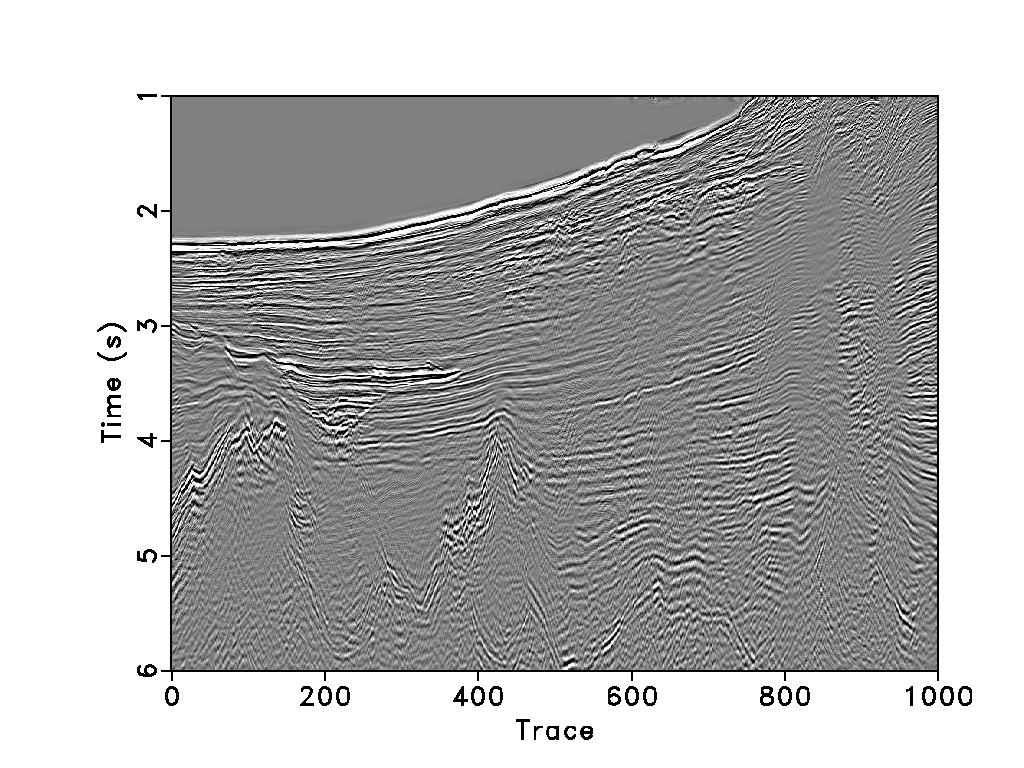

In [74]:
view("npre")

<p id="fig:rna-ortho" style="color:navy">(b)</p>

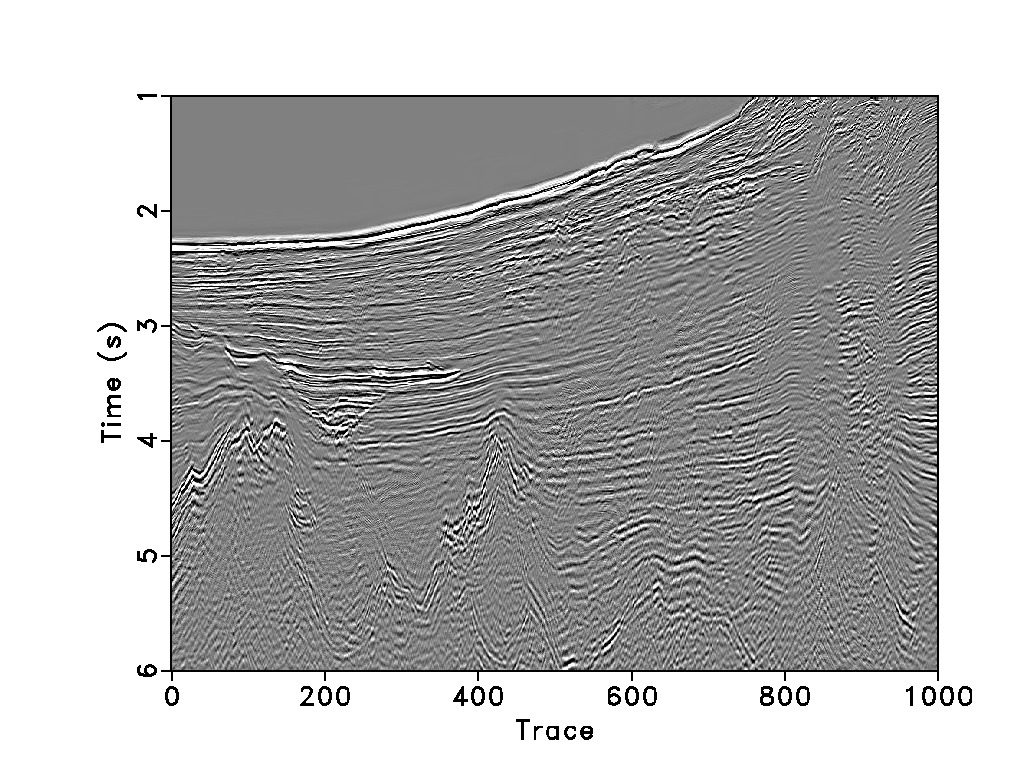

In [75]:
view("rna-ortho")

<p id="fig:nprediff0" style="color:navy">(c)</p>

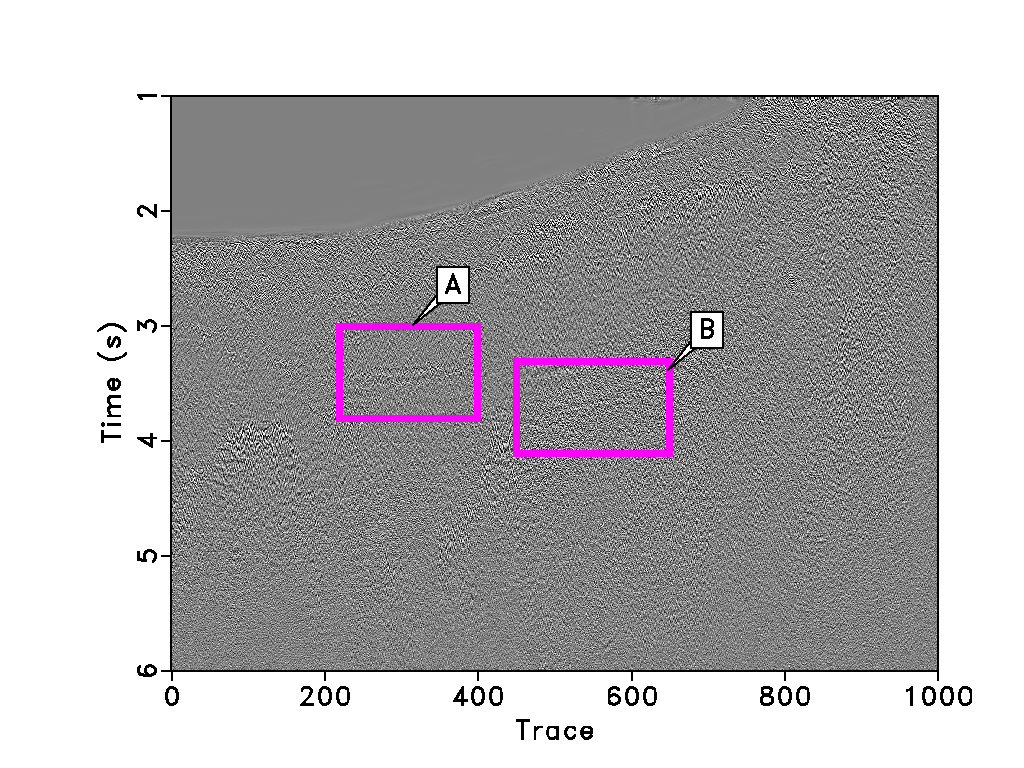

In [76]:
view("nprediff0")

<p id="fig:rnadiff-ortho0" style="color:navy">(d)</p>

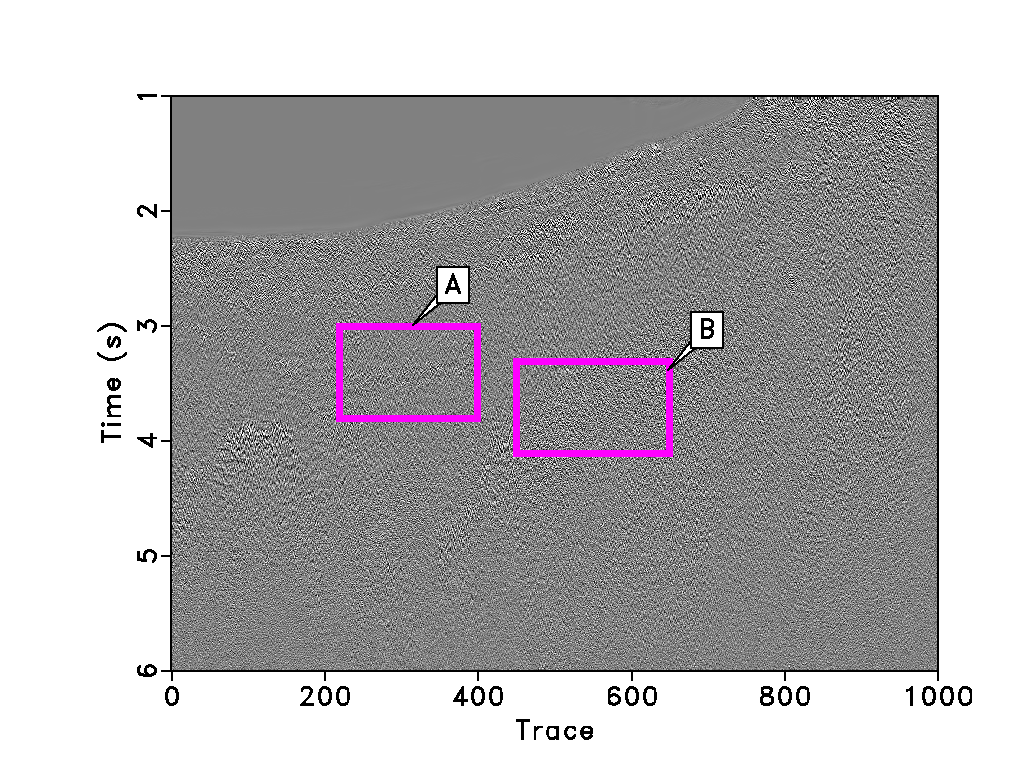

In [77]:
view("rnadiff-ortho0")

<p id="fig:npre,rna-ortho,nprediff0,rnadiff-ortho0" style="color:navy">Figure 9. (a) Denoised section using $f-x$ RNAR. (b) Denoised section using the proposed approach. (c) Noise section using $f-x$ RNAR.  (d) Noise section using the proposed approach.</p>

In [78]:
%%file 6_demon.scons 

def Grey(data,other): 
	Result(data,'put d2=1 |grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wheretitle=t scalebar=n  clip=2  %s  '%other)

def Greydemo(datao,datai,other): 
	Plot(datao,datai,'put d2=1 |grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=t wheretitle=b scalebar=n  clip=2  %s  '%other)

def Greynoise(data,other): 
	Result(data,'put d2=1 |grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wheretitle=t scalebar=n color=j  minval=-0.4 maxval=0.4 clip=0.2 %s  '%other)

Flow('zoom-rnadif-a','nprediff','put d2=1 | window n1=400 f1=1000 n2=175 f2=225')
Flow('zoom-rnadif-b','nprediff','put d2=1 | window n1=400 f1=1200 n2=200 f2=450 ')
Flow('zoom-orthodif-a','rnadiff-ortho','put d2=1 | window n1=400 f1=1000 n2=175 f2=225')
Flow('zoom-orthodif-b','rnadiff-ortho','put d2=1 | window n1=400 f1=1200 n2=200 f2=450')

Grey('zoom-rnadif-a','')
Grey('zoom-rnadif-b','')
Grey('zoom-orthodif-a','')
Grey('zoom-orthodif-b','')

Greydemo('a','data','title="Noisy data" labelsz=10 labelfat=4')
Greydemo('b','rna-ortho','title="Denoised data" labelsz=10 labelfat=4')
Greydemo('c','rnadiff-ortho','title="Removed noise" labelsz=10 labelfat=4' )
Greydemo('d','rna-simi-ortho','color=j clip=0.5 scalebar=y minval=0 maxval=0.5 title="Local similarity between denoised data and removed noise" labelsz=10 labelfat=4')

Plot('data1','a b','SideBySideAniso')
Plot('data2','c d','SideBySideAniso')
Result('demon','data1 data2','OverUnderAniso')

Writing 6_demon.scons


<p id="fig:zoom-rnadif-a" style="color:navy">(a)</p>

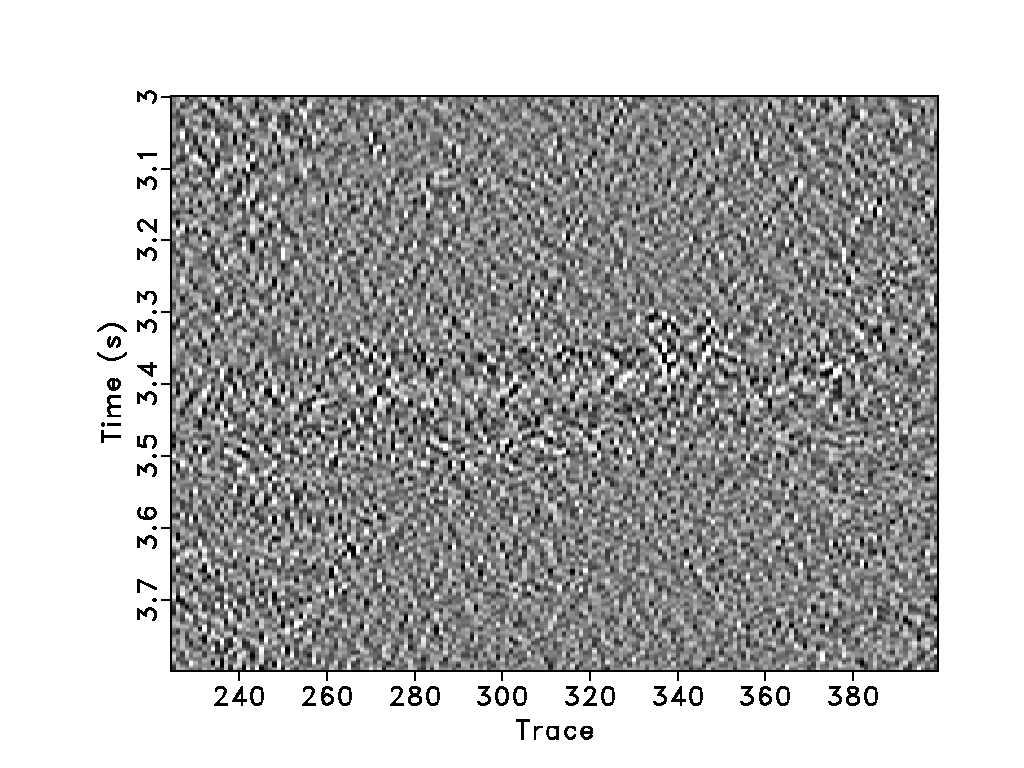

In [79]:
view("zoom-rnadif-a")

<p id="fig:zoom-orthodif-a" style="color:navy">(b)</p>

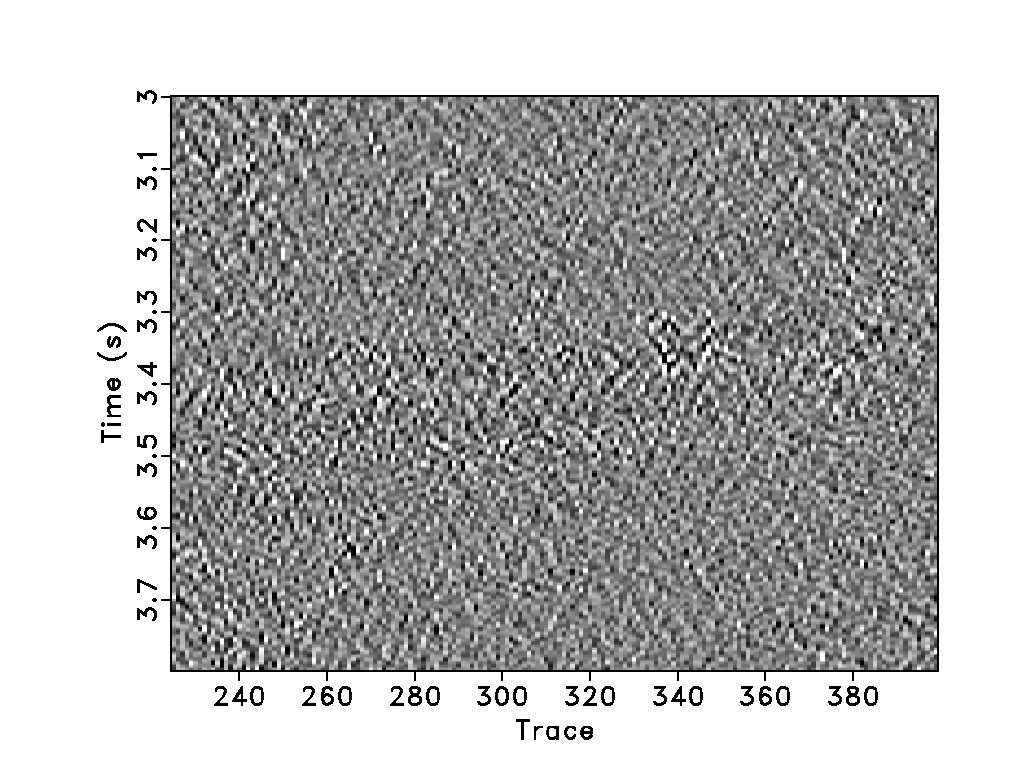

In [80]:
view("zoom-orthodif-a")

<p id="fig:zoom-rnadif-b" style="color:navy">(c)</p>

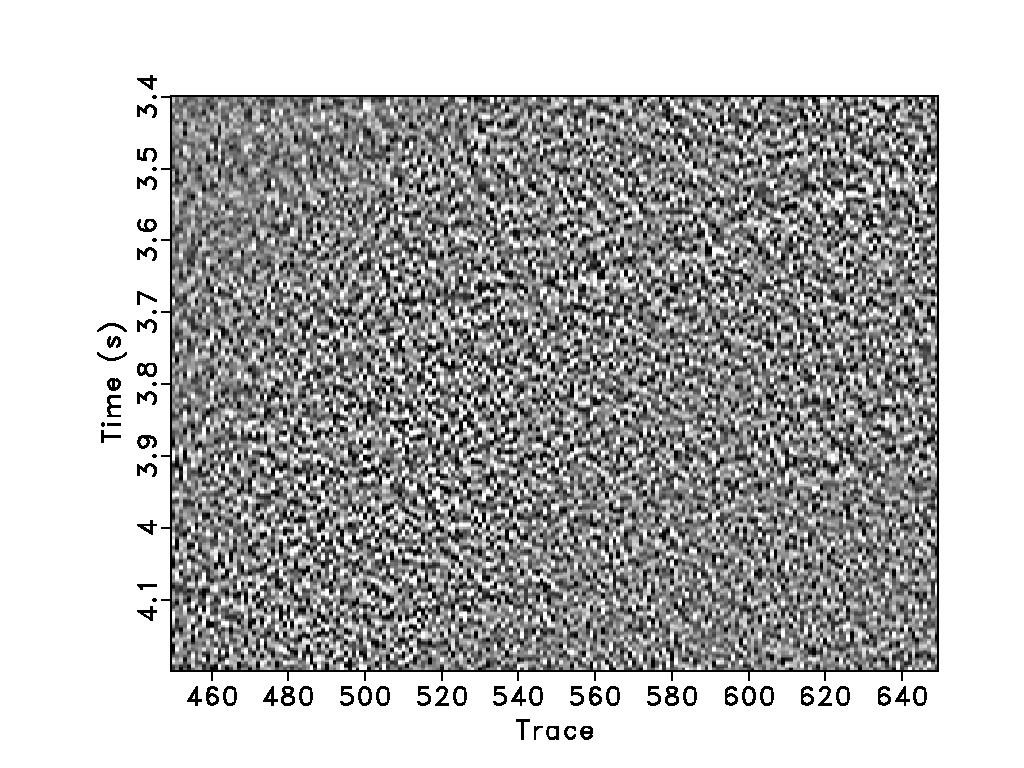

In [81]:
view("zoom-rnadif-b")

<p id="fig:zoom-orthodif-b" style="color:navy">(d)</p>

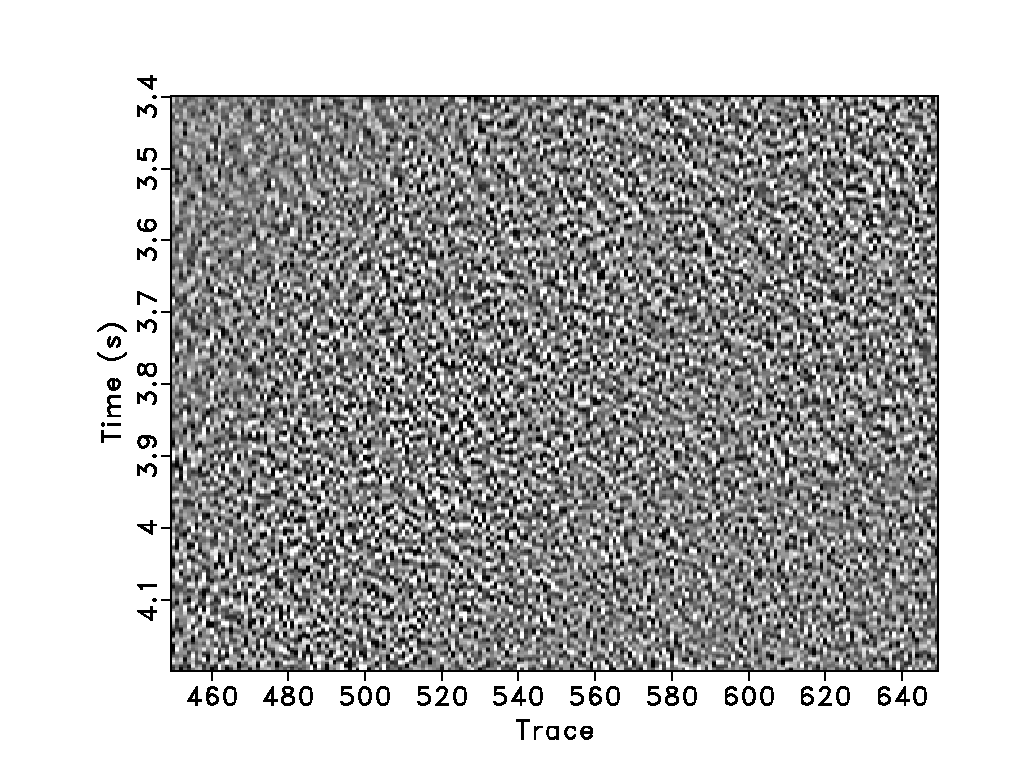

In [82]:
view("zoom-orthodif-b")

<p id="fig:zoom-rnadif-a,zoom-orthodif-a,zoom-rnadif-b,zoom-orthodif-b" style="color:navy">Figure 10. (a) Zoomed section using $f$-$x$ RNAR (frame box A shown in Figure <a href="#fig:npre,rna-ortho,nprediff0,rnadiff-ortho0" data-reference-type="ref" data-reference="fig:npre,rna-ortho,nprediff0,rnadiff-ortho0">9</a>). (b) Zoomed section using the proposed approach (frame box A shown in Figure <a href="#fig:npre,rna-ortho,nprediff0,rnadiff-ortho0" data-reference-type="ref" data-reference="fig:npre,rna-ortho,nprediff0,rnadiff-ortho0">9</a>). (c) Zoomed section using $f$-$x$ RNAR (frame box B shown in Figure <a href="#fig:npre,rna-ortho,nprediff0,rnadiff-ortho0" data-reference-type="ref" data-reference="fig:npre,rna-ortho,nprediff0,rnadiff-ortho0">9</a>). (d) Zoomed section using the proposed approach (frame box B shown in Figure <a href="#fig:npre,rna-ortho,nprediff0,rnadiff-ortho0" data-reference-type="ref" data-reference="fig:npre,rna-ortho,nprediff0,rnadiff-ortho0">9</a>).</p>

In [83]:
%%file 7_demon.scons 

def Grey(data,other): 
	Result(data,'put d2=1 |grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wheretitle=t scalebar=n  clip=2  %s  '%other)

def Greydemo(datao,datai,other): 
	Plot(datao,datai,'put d2=1 |grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=t wheretitle=b scalebar=n  clip=2  %s  '%other)

def Greynoise(data,other): 
	Result(data,'put d2=1 |grey label2=Trace unit2="" label1=Time unit1="s" title="" wherexlabel=b wheretitle=t scalebar=n color=j  minval=-0.4 maxval=0.4 clip=0.2 %s  '%other)
# ortho
Flow('rna-simi','npre nprediff','similarity other=${SOURCES[1]} niter=40 rect1=5 rect2=5')
Flow('rna-simi-ortho','rna-ortho rnadiff-ortho','similarity other=${SOURCES[1]} niter=40 rect1=5 rect2=5')

Grey('rna-simi','color=j clip=0.4 scalebar=y minval=0 maxval=0.5')
Grey('rna-simi-ortho','color=j clip=0.4 scalebar=y minval=0 maxval=0.5')

Writing 7_demon.scons


<p id="fig:rna-simi" style="color:navy">(a)</p>

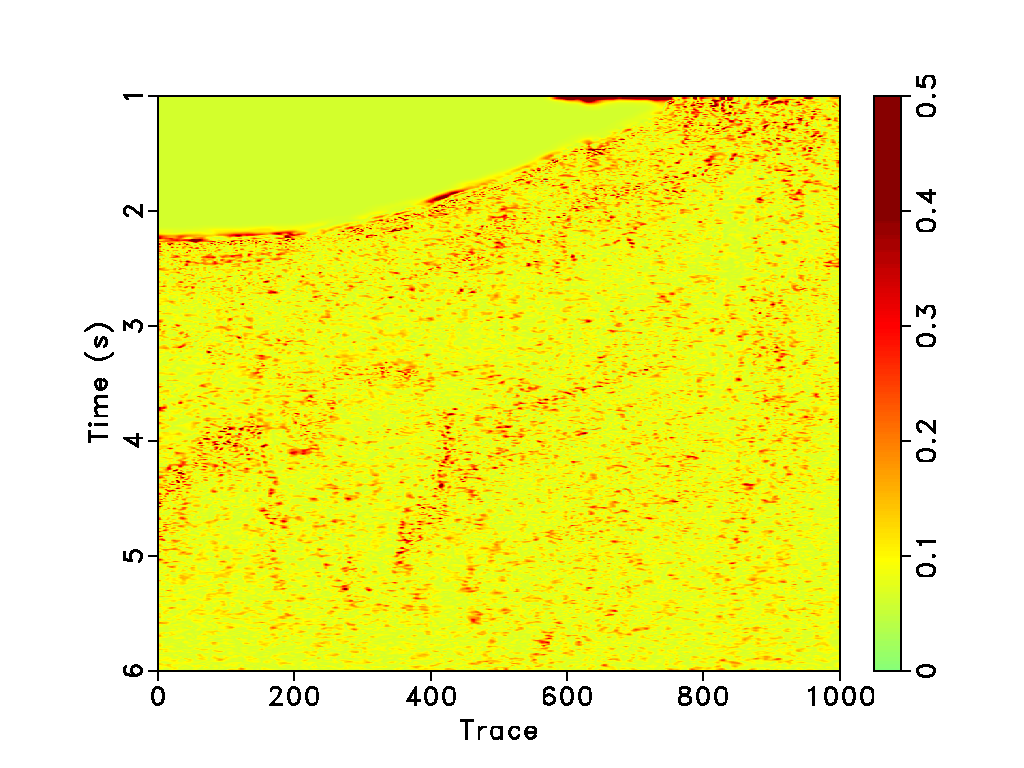

In [84]:
view("rna-simi")

<p id="fig:rna-simi-ortho" style="color:navy">(b)</p>

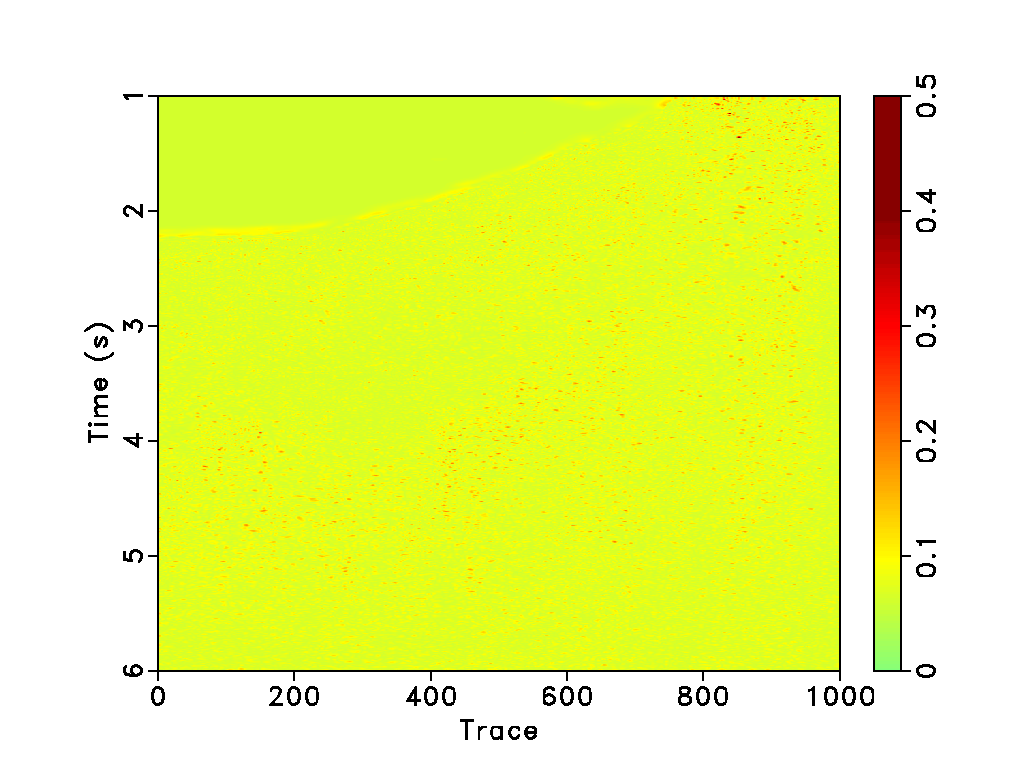

In [85]:
view("rna-simi-ortho")

<p id="fig:rna-simi,rna-simi-ortho" style="color:navy">Figure 11. Comparison of similarity between noise section and denoised section with and without using the proposed random noise attenuation approach. (a) Similarity map using $f-x$ RNAR. (b) Similarity map using the proposed method.</p>

## CONCLUSIONS

Conventional methods for noise attenuation may cause some leakage of signal energy in the noise section as a result of incorrect parameter selection or inadequacy of denoising assumptions. %By employing local similarity between the noise section and denoised section, we can successfully detect the useful signal smeared in the noise section. 
We have shown that it is possible to retrieve the leakage energy by applying a weighting operator to the initial signal and adding the retrieved signal energy to the initially denoised data to obtain the final denoised data. In order to design an optimized weighting operator, we introduce a new local attribute, called local orthogonalization weight (LOW). LOW can be obtained by solving a least-square minimization problem using shaping regularization with a smoothness constraint. The proposed denoising approach corresponds to locally orthogonalizing signal and noise. Once the initial signal and noise models are given, the proposed approach can help retrieve the residual signal in the noise section. The local orthogonalization approach to random noise attenuation is applicable to processing of blended simultaneous-source seismic data, in which the preservation of useful signal is particularly important. Although the examples were 2-D, the method applies equally well in 3-D and in any other number of dimensions.

## ACKNOWLEDGMENTS

We thank FairfieldNodal for the data used in the first field data example. We also thank Luke Decker for helpful discussions, Bill Harlan and two anonymous reviewers for constructive suggestions that made the manuscript better. The paper was prepared in the Madagascar open-source software environment ([Fomel et al., 2013][mada2013]).

[mada2013]:https://doi.org/10.5334/jors.ag

## <p id="eq:AppendixA" style="color:navy">APPENDIX A: SIGNAL-AND-NOISE ORTHOGONALIZATION</p>

As shown schematically in Figure <a href="#fig:demo" data-reference-type="ref" data-reference="fig:demo">A-1</a>, the initially estimated signal and noise are denoted by $\mathbf{s}_0$ and $\mathbf{n}_0$, respectively. By projecting $\mathbf{n}_0$ to the direction of $\mathbf{s}_0$, we can get the projection $w\mathbf{s}_0$. The other component of $\mathbf{n}_0$ is the final estimated noise, as shown in equation <a href="#eq:ortho1" data-reference-type="ref" data-reference="eq:ortho1">3</a>. The final estimated signal is thus the summation of the initially estimated signal $\mathbf{s}_0$ and the projection component $w\mathbf{s}_0$. 

When $w=\frac{\mathbf{n}_0^T\mathbf{s}_0}{\mathbf{s}_0^T\mathbf{s}_0}$, the following equation holds:
<p id="eq:append-ortho" style="color:navy">(A-1)</p>
\begin{equation}
\label{eq:append-ortho}
\begin{split}
\hat{\mathbf{n}}^T\hat{\mathbf{s}} &=(\mathbf{n}_0-w\mathbf{s}_0)^T(\mathbf{s}_0+w\mathbf{s}_0) \\
&=\mathbf{n}_0^T\mathbf{s}_0-w\mathbf{s}_0^T\mathbf{s}_0+w\mathbf{n}_0^T\mathbf{s}_0-w^2\mathbf{s}_0^T\mathbf{s}_0\\
&=\mathbf{n}_0^T\mathbf{s}_0-\frac{\mathbf{n}_0^T\mathbf{s}_0}{\mathbf{s}_0^T\mathbf{s}_0}\mathbf{s}_0^T\mathbf{s}_0+\frac{\mathbf{n}_0^T\mathbf{s}_0}{\mathbf{s}_0^T\mathbf{s}_0}\mathbf{n}_0^T\mathbf{s}_0-\left(\frac{\mathbf{n}_0^T\mathbf{s}_0}{\mathbf{s}_0^T\mathbf{s}_0}\right)^2\mathbf{s}_0^T\mathbf{s}_0 \\
&=0
\end{split}
\end{equation}

Here, $\hat{\mathbf{s}}$ and $\hat{\mathbf{n}}$ denote the final estimated signal and noise, respectively, and appear orthogonal to each other. This orthogonalization approach is also known as *Gram-Schmidt orthogonalization* ([Hazewinkel, 2001][gram]). Note that $w$ defined above can be obtained by solving the least-squares optimization problem: 
<p id="eq:a2" style="color:navy">(A-2)</p>
\begin{equation}
\label{eq:a2}
\min_{w} \Arrowvert w\mathbf{s}_0-\mathbf{n}_0\Arrowvert^2_2,
\end{equation}

which we extend to equation <a href="#eq:localortho" data-reference-type="ref" data-reference="eq:localortho">7</a> in the main text.

[gram]:https://cds.cern.ch/record/1319974

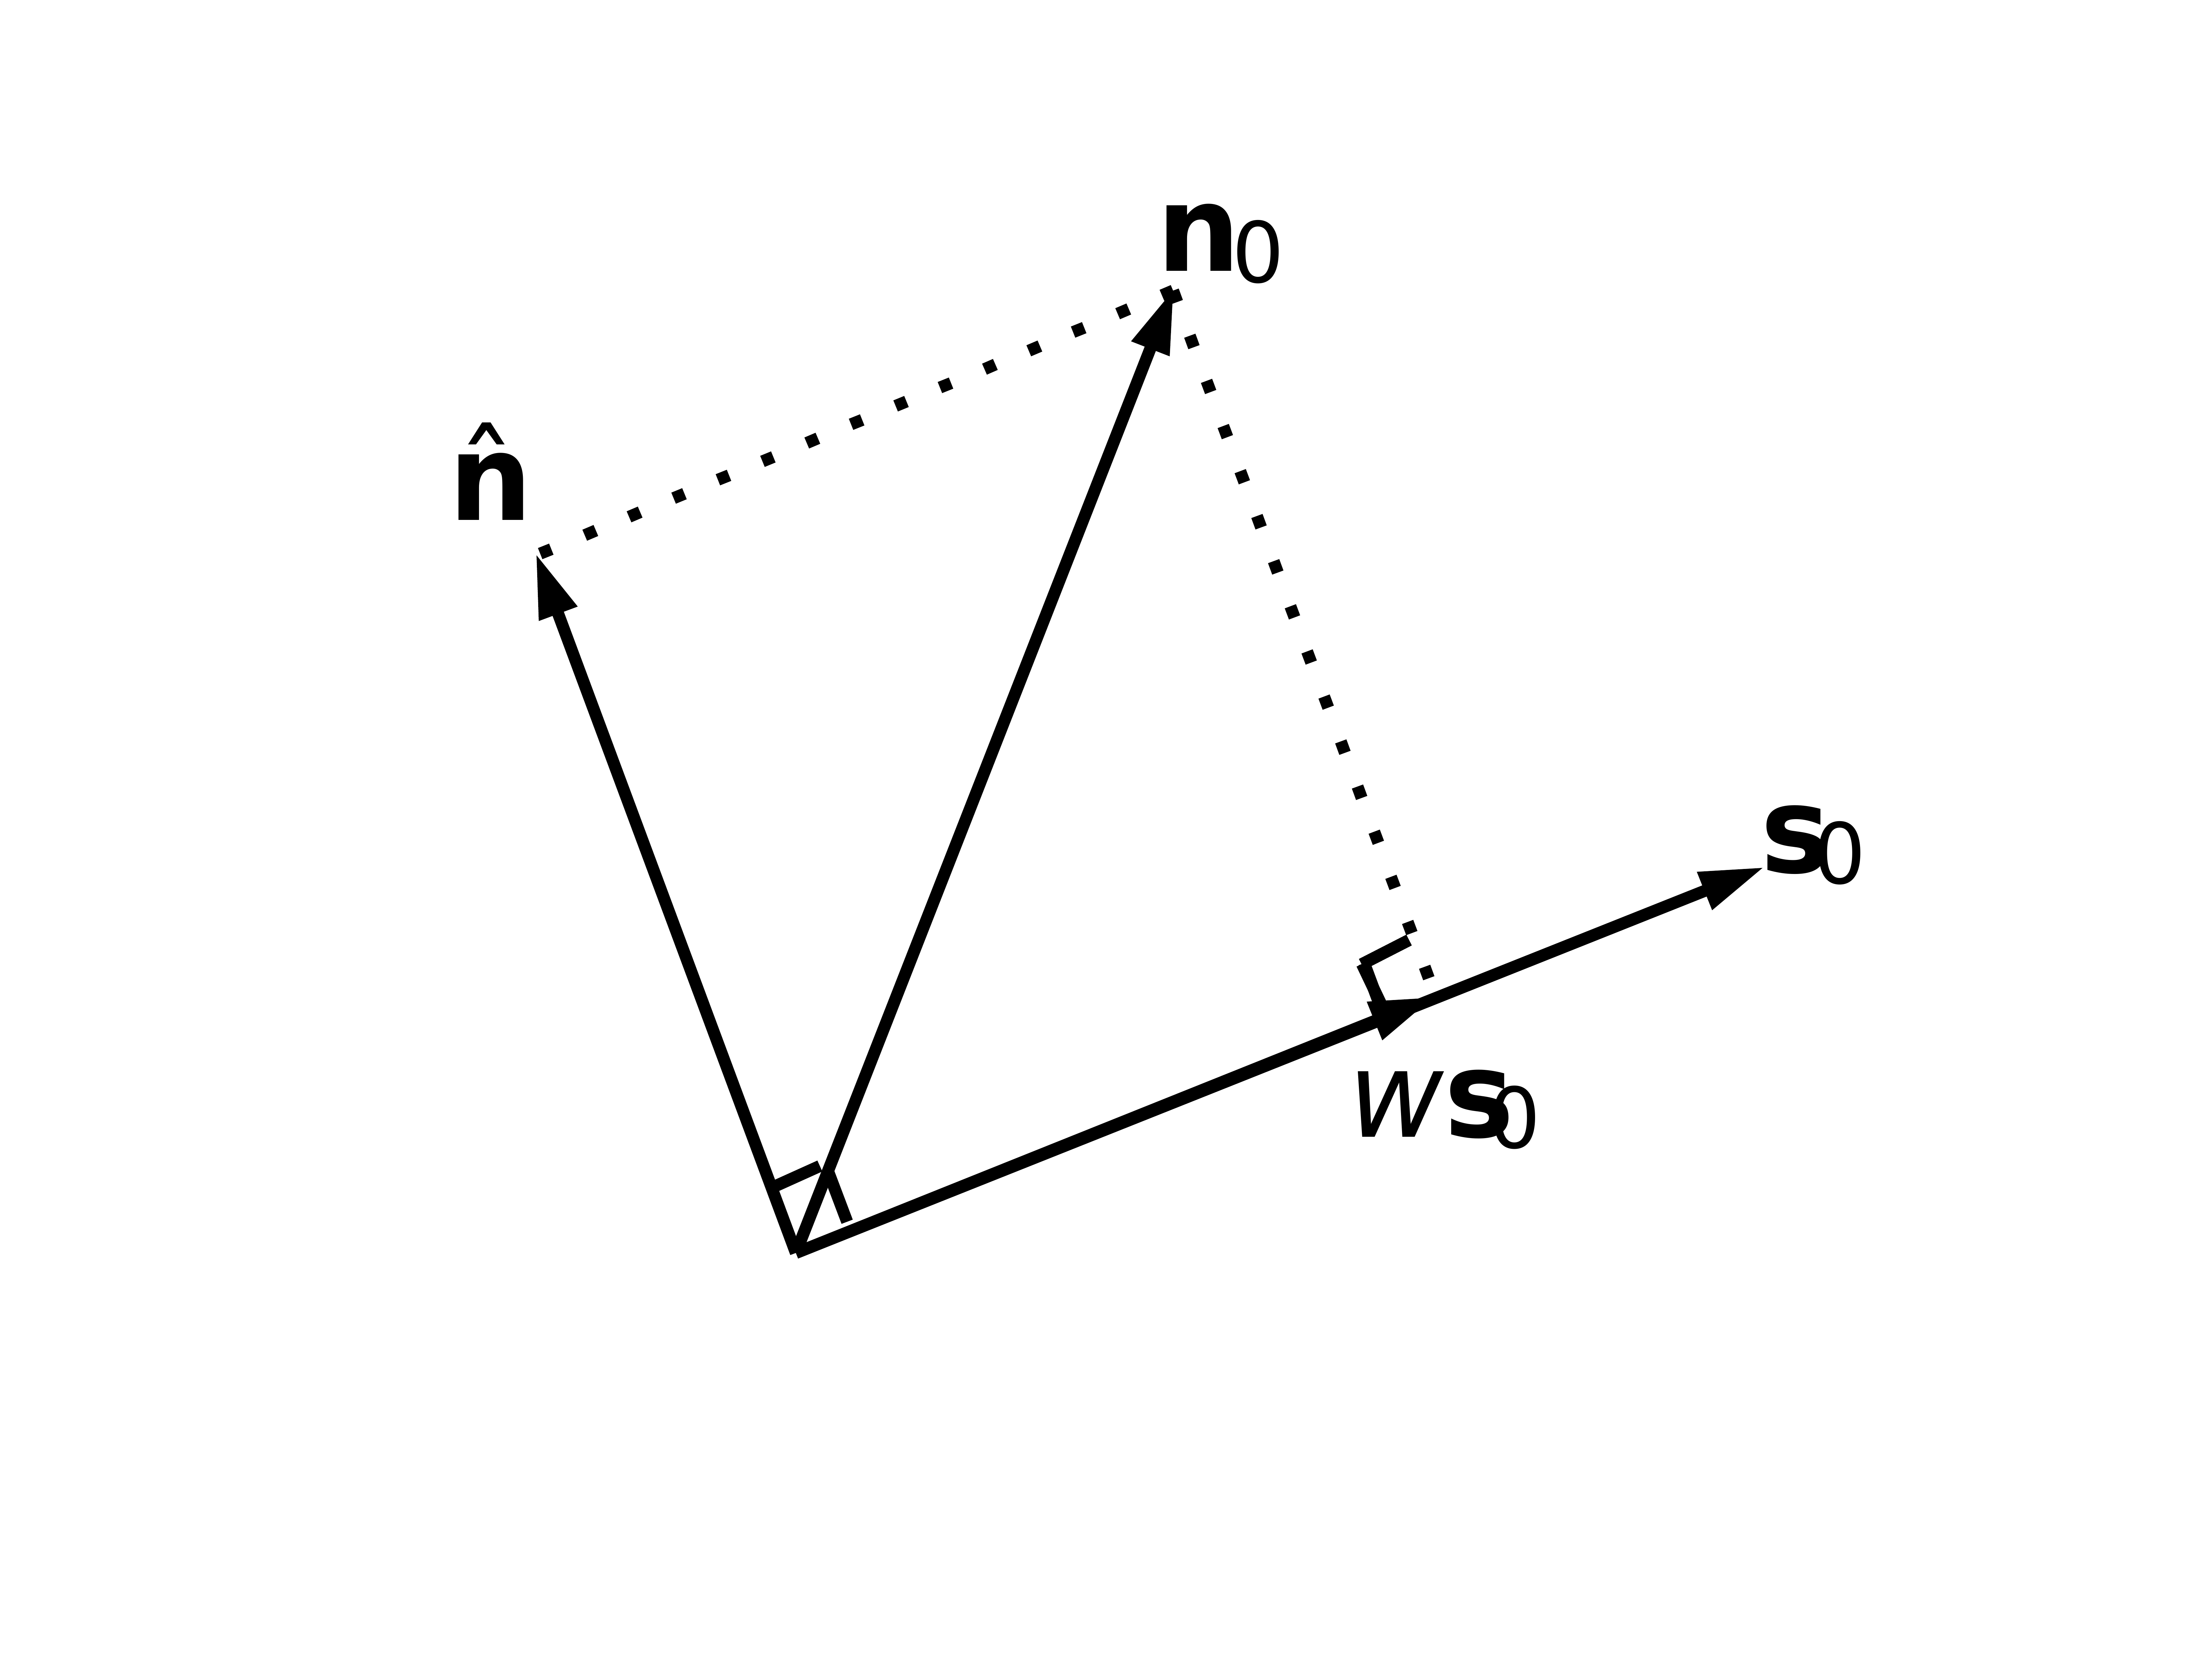

<p id="fig:demo" style="color:navy">Figure A-1. Demonstration of signal-and-noise orthogonalization.</p>

## <p id="eq:AppendixB" style="color:navy">APPENDIX B: REVIEW OF LOCAL SIMILARITY</p>

[Fomel (2007a)][fomel2007localattr] defined local similarity between vectors $\mathbf{a}$ and $\mathbf{b}$ as:
<p id="eq:local" style="color:navy">(B-1)</p>
\begin{equation}
\label{eq:local}
\mathbf{c}=\sqrt{\mathbf{c}_1^T\mathbf{c}_2}
\end{equation}
where $\mathbf{c}_1$ and $\mathbf{c}_2$ come from two least-squares minimization problems:
<p id="eq:local1" style="color:navy">(B-2)</p>
\begin{align}
\label{eq:local1}
\mathbf{c}_1 &=\arg\min_{\mathbf{c}_1}\Arrowvert \mathbf{a}-\mathbf{B}\mathbf{c}_1 \Arrowvert_2^2, \\
\label{eq:local2}
\mathbf{c}_2 &=\arg\min_{\mathbf{c}_2}\Arrowvert \mathbf{b}-\mathbf{A}\mathbf{c}_2 \Arrowvert_2^2,
\end{align}
<p id="eq:local2" style="color:navy">(B-3)</p>

where $\mathbf{A}$ is a diagonal operator composed from the elements of $\mathbf{a}$: $\mathbf{A}=diag(\mathbf{a})$ and $\mathbf{B}$ is a diagonal operator composed from the elements of $\mathbf{b}$: $\mathbf{B}=diag(\mathbf{b})$. Least-squares problems <a href="#eq:local1" data-reference-type="ref" data-reference="eq:local1">B-2</a> and <a href="#eq:local2" data-reference-type="ref" data-reference="eq:local2">B-3</a> can be solved with the help of shaping regularization with a smoothness constraint:
<p id="eq:local3" style="color:navy">(B-4)</p>
\begin{align}
\label{eq:local3}
\mathbf{c}_1 &= [\lambda_1^2\mathbf{I} + \mathcal{T}(\mathbf{B}^T\mathbf{B}-\lambda_1^2\mathbf{I})]^{-1}\mathcal{T}\mathbf{B}^T\mathbf{a},\\
\label{eq:local4}
\mathbf{c}_2 &= [\lambda_2^2\mathbf{I} + \mathcal{T}(\mathbf{A}^T\mathbf{A}-\lambda_2^2\mathbf{I})]^{-1}\mathcal{T}\mathbf{A}^T\mathbf{b},
\end{align}
<p id="eq:local4" style="color:navy">(B-5)</p>

where $\mathbf{\mathcal{T}}$ is a smoothing operator, and $\lambda_1$ and $\lambda_2$ are two parameters controlling the physical dimensionality and enabling fast convergence when inversion is implemented iteratively. These two parameters can be chosen as $\lambda_1  = \Arrowvert\mathbf{B}^T\mathbf{B}\Arrowvert_2$ and $\lambda_2  = \Arrowvert\mathbf{A}^T\mathbf{A}\Arrowvert_2$ ([Fomel, 2007a][fomel2007localattr]). The definition of $\mathbf{c}_1$ and $\mathbf{c}_2$ are equivalent to the definition of LOW in this paper.

[fomel2007localattr]:https://doi.org/10.1190/1.2437573

## REFERENCES

[Abma, R. L., T. Manning, M. Tanis, J. Yu, and M. Foster, 2010, High quality separation of simultaneous sources by sparse inversion: 72nd Annual International Conference and Exhibition, EAGE, Extended Abstracts, B003.][abma2010]

[Beasley, C. J., R. E. Chambers, and Z. Jiang, 1998, A new look at simultaneous sources: 68th Annual International Meeting, SEG, Expanded Abstracts, 133–135.][beasleycj1998]

[Bekara, M., and M. van der Baan, 2009, Random and coherent noise attenuation by empirical mode decomposition: Geophysics, 74, no. 5, V89– V98, doi: 10.1190/1.3157244.][bekara]

[Berkhout, A. J., 2008, Changing the mindset in seismic data acquisition: The Leading Edge, 27, 924–938, doi: 10.1190/1.2954035.][berkhout2008]

[Canales, L., 1984, Random noise reduction: 54th Annual International
Meeting, SEG, Expanded Abstracts, 525–527.][canales]

[Chen, Y., 2014, Deblending using a space-varying median filter: Exploration Geophysics, doi: 10.1071/EG14051.][yangkang2014svmf]

[Chen, Y., and J. Ma, 2014, Random noise attenuation by f-x empirical mode decomposition predictive filtering: Geophysics, 79, no. 3, V81–V91, doi: 10.1190/geo2013-0080.1.][yangkang2014]

[Chen, Y., S. Fomel, and J. Hu, 2014a, Iterative deblending of simultaneous source seismic data using seislet-domain shaping regularization: Geophysics, 79, no. 5, V179–V189, doi: 10.1190/geo2013-0449.1.][yangkang20142]

[Chen, Y., J. Yuan, Z. Jin, K. Chen, and L. Zhang, 2014b, Deblending using normal moveout and median filtering in common-midpoint gathers: Journal of Geophysics and Engineering, 11, 045012, doi: 10.1088/1742-2132/11/4/045012.][yangkang2014nmo]

[Fomel, S., 2007a, Local seismic attributes: Geophysics, 72, no. 3A29–A33, doi: 10.1190/1.2437573.][fomel2007localattr]

[Fomel, S., 2007b, Shaping regularization in geophysical-estimation problems: Geophysics, 72, no. 2, R29–R36, doi: 10.1190/1.2433716.][fomel2007shape]

[Fomel, S., 2009, Adaptive multiple subtraction using regularized nonstationary regression: Geophysics, 74, no. 1, V25–V33, doi: 10.1190/1.3043447.][fomel20095]

[Fomel, S., 2013, Seismic data decomposition into spectral components using regularized non-stationary autoregression: Geophysics, 78, no. 6, O69–O76, doi: 10.1190/geo2013-0221.1.][fomel20132]

[Fomel, S., M. Backus, K. Fouad, B. Hardage, and G. Winters, 2005, A multistep approach to multicomponent seismic image registration with application to a west Texas carbonate reservoir study: 75th Annual
International Meeting, SEG, Expanded Abstracts, 1018–1021.][fomel20052]

[Fomel, S., and L. Jin, 2009, Time-lapse image registration using the local similarity attribute: Geophysics, 74, no. 2, A7–A11, doi: 10.1190/1.3054136.][fomel20094]

[Fomel, S., P. Sava, I. Vlad, Y. Liu, and V. Bashkardin, 2013, Madagascar open-source software project: Journal of Open Research Software, 1, e8, doi: 10.5334/jors.ag.][mada2013]

[Fomel, S., and M. van der Baan, 2014, Local skewness attribute as a seismic phase detector: Interpretation, 2, no. 1, SA49–SA56, doi: 10.1190/INT2013-0080.1.][fomel20142]

[Hazewinkel, M., 2001, Encyclopedia of mathematics (set): Springer.][gram]

[Huo, S., Y. Luo, and P. G. Kelamis, 2012, Simultaneous sources separation via multidirectional vector-median filtering: Geophysics, 77, no. 4, V123–V131, doi: 10.1190/geo2011-0254.1.][mediandeblend]

[Liu, G., X. Chen, J. Du, and K. Wu, 2012, Random noise attenuation using f-x regularized nonstationary autoregression: Geophysics, 77, no. 2, V61–V69, doi: 10.1190/geo2011-0117.1.][guochang2012]

[Liu, G., S. Fomel, and X. Chen, 2011a, Stacking angle-domain common image gathers for normalization of illumination: Geophysical Prospecting, 59, 244–255, doi: 10.1111/j.1365-2478.2010.00916.x.][guochang20111]

[Liu, G., S. Fomel, and X. Chen, 2011b, Time-frequency analysis of seismic data using local attributes: Geophysics, 76, no. 6, P23–P34, doi: 10.1190/geo2010-0185.1.][guochang20113]

[Liu, G., S. Fomel, L. Jin, and X. Chen, 2009, Stacking seismic data using local correlation: Geophysics, 74, no. 3, V43–V48, doi: 10.1190/1.3085643.][guochang]

[Liu, Y., and S. Fomel, 2012, Seismic data analysis using local time frequency decomposition: Geophysical Prospecting, 60, 1–17., doi: 10.1111/j.1365-2478.2011.00957.x.][liuyang2012]

[Liu, Y., S. Fomel, and G. Liu, 2010, Nonlinear structure-enhancing filtering using plane-wave prediction: Geophysical Prospecting, 58, 415–427, doi: 10.1111/j.1365-2478.2009.00840.x.][liuyang2010]

[Soubaras, R., 1995, Prestack random and impulsive noise attenuation by f-x projection filtering: 65th Annual International Meeting, SEG, Expanded Abstracts, 711–714.][soubaras1995]

[Zhang, R., X. Song, S. Fomel, M. K. Sen, and S. Srinivasan, 2013, Time lapse seismic data registration and inversion for CO<sub>2</sub> sequestration study at Cranfield: Geophysics, 78, no. 6, B329–B338, doi: 10.1190/geo2012-0386.1.][zhangrui2013]

[canales]:https://doi.org/10.1190/1.1894168
[fomel20142]:https://doi.org/10.1190/INT-2013-0080.1
[mediandeblend]:https://doi.org/10.1190/geo2011-0254.1
[yangkang20142]:https://doi.org/10.1190/geo2013-0449.1
[gram]:https://cds.cern.ch/record/1319974
[abma2010]:https://doi.org/10.3997/2214-4609.201400611
[beasleycj1998]:https://doi.org/10.1190/1.1820149
[mada2013]:https://doi.org/10.5334/jors.ag
[berkhout2008]:https://doi.org/10.1190/1.2954035
[yangkang2014svmf]:https://doi.org/10.1071/EG14051
[liuyang2012]:https://doi.org/10.1111/j.1365-2478.2012.01062.x
[liuyang2010]:https://doi.org/10.1111/j.1365-2478.2009.00840.x
[fomel20095]:https://doi.org/10.1190/1.3043447
[zhangrui2013]:https://doi.org/10.1190/geo2012-0386.1
[yangkang20131]:https://doi.org/10.1190/geo2013-0449.1
[yangkang2014nmo]:https://doi.org/10.1088/1742-2132/11/4/045012
[soubaras1995]:https://doi.org/10.1190/1.1887383
[fomel20052]:https://doi.org/10.1190/1.2147852
[fomel2007localattr]:https://doi.org/10.1190/1.2437573
[fomel2007shape]:https://doi.org/10.1190/1.2433716
[fomel20094]:https://doi.org/10.1190/1.3054136
[guochang2009]:https://doi.org/10.1190/1.3085643
[guochang20111]:https://doi.org/10.1111/j.1365-2478.2010.00916.x
[guochang20113]:https://doi.org/10.1190/geo2010-0185.1
[bekara]:https://doi.org/10.1190/1.3157244
[guochang]:https://doi.org/10.1190/1.3085643
[yangkang2014]:https://doi.org/10.1190/geo2013-0080.1
[fomel20132]:https://doi.org/10.1190/geo2013-0221.1
[guochang2012]:https://doi.org/10.1190/geo2011-0117.1
[Fomel07a]:https://doi.org/10.1190/1.2433716
[Fomel07b]:https://doi.org/10.1190/1.2437573
[Fomel05]:https://doi.org/10.1190/1.2147852
